IMPORT LIBRARIES

In [ ]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('telecom_churn_data_eval.csv')
df.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61903 entries, 0 to 61902
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 106.7+ MB


In [5]:
print(df['circle_id'].unique())

[109]


In [6]:
print(df['mobile_number'].count())

61903


In [7]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


In [8]:
pd.set_option('display.max_rows', 500)

In [9]:
quality_report(df)

Total NaN  Percent of NaN  Nunique    Dtype
count_rech_2g_6               46300       74.794436       28  float64
date_of_last_rech_data_6      46300       74.794436       30   object
count_rech_3g_6               46300       74.794436       24  float64
av_rech_amt_data_6            46300       74.794436      736  float64
max_rech_data_6               46300       74.794436       46  float64
total_rech_data_6             46300       74.794436       35  float64
arpu_3g_6                     46300       74.794436     4935  float64
arpu_2g_6                     46300       74.794436     4912  float64
night_pck_user_6              46300       74.794436        2  float64
fb_user_6                     46300       74.794436        2  float64
arpu_3g_7                     46037       74.369578     4843  float64
count_rech_2g_7               46037       74.369578       30  float64
fb_user_7                     46037       74.369578        2  float64
count_rech_3g_7               46037       74.369578       27  float64
arpu_2g_7                     46037       74.369578     4625  float64
av_rech_amt_data_7            46037       74.369578      804  float64
max_rech_data_7               46037       74.369578       48  float64
night_pck_user_7              46037       74.369578        2  float64
total_rech_data_7             46037       74.369578       38  float64
date_of_last_rech_data_7      46037       74.369578       31   object
night_pck_user_9              45840       74.051338        2  float64
date_of_last_rech_data_9      45840       74.051338       30   object
fb_user_9                     45840       74.051338        2  float64
arpu_2g_9                     45840       74.051338     4705  float64
max_rech_data_9               45840       74.051338       48  float64
arpu_3g_9                     45840       74.051338     5326  float64
total_rech_data_9             45840       74.051338       34  float64
av_rech_amt_data_9            45840       74.051338      796  float64
count_rech_3g_9               45840       74.051338       27  float64
count_rech_2g_9               45840       74.051338       27  float64
fb_user_8                     45573       73.620018        2  float64
av_rech_amt_data_8            45573       73.620018      818  float64
count_rech_3g_8               45573       73.620018       27  float64
count_rech_2g_8               45573       73.620018       32  float64
date_of_last_rech_data_8      45573       73.620018       31   object
total_rech_data_8             45573       73.620018       43  float64
max_rech_data_8               45573       73.620018       49  float64
arpu_3g_8                     45573       73.620018     5229  float64
arpu_2g_8                     45573       73.620018     4672  float64
night_pck_user_8              45573       73.620018        2  float64
std_ic_t2m_mou_9               4787        7.733066     7160  float64
spl_ic_mou_9                   4787        7.733066      344  float64
loc_ic_mou_9                   4787        7.733066    22405  float64
isd_ic_mou_9                   4787        7.733066     4169  float64
std_ic_t2o_mou_9               4787        7.733066        1  float64
loc_ic_t2f_mou_9               4787        7.733066     5732  float64
ic_others_9                    4787        7.733066     1499  float64
loc_og_t2f_mou_9               4787        7.733066     3124  float64
loc_ic_t2m_mou_9               4787        7.733066    17664  float64
loc_og_t2c_mou_9               4787        7.733066     1950  float64
loc_og_t2m_mou_9               4787        7.733066    16380  float64
loc_ic_t2t_mou_9               4787        7.733066    10674  float64
loc_og_t2t_mou_9               4787        7.733066    10424  float64
std_ic_mou_9                   4787        7.733066     9031  float64
std_og_t2t_mou_9               4787        7.733066    12964  float64
roam_og_mou_9                  4787        7.733066     4327  float64
std_ic_t2t_mou_9               4787 

In [10]:
# 'last_day_rch_amt_9','max_rech_amt_9','total_rech_amt_9','total_rech_num_9','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','sachet_3g_9','monthly_3g_9','sachet_2g_9','monthly_2g_9,vol_3g_mb_9','arpu_9','last_date_of_month_9','date_of_last_rech_9','roam_ic_mou_9','og_others_9','spl_og_mou_9','std_og_mou_9','onnet_mou_9','isd_og_mou_9','std_og_t2c_mou_9','std_og_t2f_mou_9','std_og_t2m_mou_9','offnet_mou_9','loc_og_mou_9,std_ic_t2f_mou_9','std_ic_t2t_mou_9','roam_og_mou_9','std_og_t2t_mou_9','std_ic_mou_9','loc_og_t2t_mou_9','loc_ic_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2c_mou_9','loc_ic_t2m_mou_9','loc_og_t2f_mou_9','ic_others_9','loc_ic_t2f_mou_9','std_ic_t2o_mou_9','isd_ic_mou_9','loc_ic_mou_9','spl_ic_mou_9','std_ic_t2m_mou_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','total_rech_data_9','arpu_3g_9','max_rech_data_9','arpu_2g_9','fb_user_9','date_of_last_rech_data_9','night_pck_user_9']   

In [11]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

In [12]:
# numeric_distribution_plot(df)

##  Tagging churners and remove attributes of the churn phase 

In [13]:
df_churn = df[['mobile_number','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

In [14]:
df_churn.head()

mobile_number  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0     7000842753            0.00            0.00          0.0         0.00
1     7001865778          188.04           72.11          0.0         0.00
2     7001625959          517.74          124.94          0.0         8.42
3     7001204172          305.38          362.54          0.0         0.00
4     7000142493          205.31          104.59          0.0         0.00

In [15]:
#New

for i, row in df_churn.iterrows():

    if i != 0:

        row['label'] = 0

    else:

        row['label'] = 1

# # #     df_churn.at[i]['label'] = 1
    df_churn.at[i,'label'] = 1
# #     df_churn.at[i,'label'] = 1
   

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
df_churn.head()

mobile_number  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  \
0     7000842753            0.00            0.00          0.0         0.00   
1     7001865778          188.04           72.11          0.0         0.00   
2     7001625959          517.74          124.94          0.0         8.42   
3     7001204172          305.38          362.54          0.0         0.00   
4     7000142493          205.31          104.59          0.0         0.00   

   label  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0

In [17]:
mask = (df_churn['total_ic_mou_9']!=0) & (df_churn['total_og_mou_9']!=0) & (df_churn['vol_2g_mb_9']!=0) & (df_churn['vol_3g_mb_9']!=0)  

In [18]:
df_churn['label'][mask]=0

<ipython-input-18-ebbba0ae6861>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['label'][mask]=0
C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
df_churn.head()

mobile_number  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  \
0     7000842753            0.00            0.00          0.0         0.00   
1     7001865778          188.04           72.11          0.0         0.00   
2     7001625959          517.74          124.94          0.0         8.42   
3     7001204172          305.38          362.54          0.0         0.00   
4     7000142493          205.31          104.59          0.0         0.00   

   label  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0

In [20]:
df_churn.tail(20)

mobile_number  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  \
61883     7000660020          166.43          397.14         0.00   
61884     7001644198          660.88         1071.23         0.00   
61885     7002145381            0.00            0.00         0.00   
61886     7001495189          149.83          424.28         0.00   
61887     7000429956            1.06           15.39         0.00   
61888     7002071116          474.58          220.84         0.00   
61889     7000123405           81.54          126.43         0.00   
61890     7001141876          158.06          176.54         0.00   
61891     7001637576          171.73          321.34         0.00   
61892     7000593186           58.53           16.08         0.00   
61893     7000532118          690.46            2.83         0.00   
61894     7001582177          122.63           34.96         0.00   
61895     7000244283            0.00            0.00         0.00   
61896     7002300921          119.19          410.88         0.00   
61897     7000019931          109.48          416.68         0.00   
61898     7001541248           41.58          228.76         0.00   
61899     7001446894          686.74          271.51        36.65   
61900     7000190618          680.16          873.89         0.00   
61901     7000163204           62.19          269.99         0.00   
61902     7001263574          395.29          135.64         2.73   

       vol_3g_mb_9  label  
61883         0.00    1.0  
61884         0.00    1.0  
61885         0.00    1.0  
61886         0.00    1.0  
61887         0.00    1.0  
61888         0.00    1.0  
61889         0.00    1.0  
61890         0.00    1.0  
61891         0.00    1.0  
61892         0.00    1.0  
61893         0.00    1.0  
61894         0.00    1.0  
61895         0.00    1.0  
61896         0.00    1.0  
61897         0.00    1.0  
61898         0.00    1.0  
61899       709.01    0.0  
61900         0.00    1.0  
61901         0.00    1.0  
61902       294.82    0.0

In [21]:
def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features 
    present in the dataframe passed
    
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()

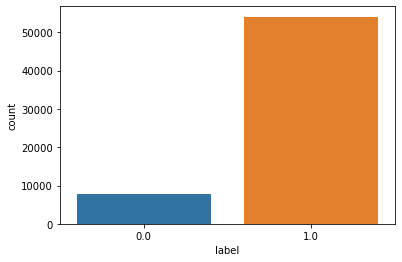

In [22]:
sns.countplot(df_churn['label'])

In [23]:
df_churn['label'].unique()

array([1., 0.])

In [24]:
df_churn['label'].value_counts()

1.0    54086
0.0     7817
Name: label, dtype: int64

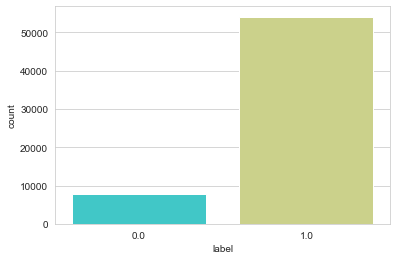

In [25]:
#The code returns the count of the target column

sns.set_style('whitegrid')
sns.countplot(x='label',data=df_churn,palette='rainbow')

In [26]:
churn = len(df_churn[df_churn["label"] == 1])
not_churn = len(df_churn[df_churn["label"] == 0])
total_label = churn + not_churn
print(f'The number of churn customer is {churn}')
print(f'The number of churn customer is {not_churn}')
print(f'The number of churn customer is {total_label}')

The number of churn customer is 54086
The number of churn customer is 7817
The number of churn customer is 61903


In [27]:
#calculating percentage
p_churn = (churn / total_label) * 100
p_not_churn = (not_churn / total_label) * 100
print('The percentage of churn customers is {}'.format(p_churn))
print('The percentage of not churn customers is {}'.format(p_not_churn))
# print("If there was a birth every 7 seconds, there would be: {} births".format(births))

The percentage of churn customers is 87.37217905432692
The percentage of not churn customers is 12.627820945673069


In [28]:
df_churn.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'], axis = 1, inplace= True) 

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
df_churn.head(4)

mobile_number  label
0     7000842753    1.0
1     7001865778    1.0
2     7001625959    1.0
3     7001204172    1.0

## EDTA

In [30]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   6.190300e+04    61903.0         61258.0         61258.0   
mean    7.001206e+09      109.0             0.0             0.0   
std     6.955908e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000604e+09      109.0             0.0             0.0   
50%     7.001201e+09      109.0             0.0             0.0   
75%     7.001810e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         61258.0  61903.000000  61903.000000  61903.000000  61903.000000   
mean              0.0    282.565653    277.348171    278.744122    261.220715   
std               0.0    333.245489    340.598847    346.639595    347.622845   
min               0.0  -2041.228000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.553000     87.460000     84.344000     63.029500   
50%               0.0    197.410000    191.176000    192.375000    177.021000   
75%               0.0    371.326500    364.115000    368.489000    352.409500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  59475.000000  59484.000000  58594.000000  57116.000000  59475.000000   
mean     130.854932    132.277750    131.898821    129.062858    197.842265   
std      292.307975    306.300692    309.070823    303.743515    320.219319   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.515000      5.310000     34.730000   
50%       34.280000     32.380000     32.590000     29.990000     95.880000   
75%      118.300000    115.032500    115.737500    112.290000    231.710000   
max     6504.340000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  59484.000000  58594.000000  57116.000000   59475.000000   59484.000000   
mean     197.010004    197.172004    190.094230       9.876021       7.242710   
std      328.604086    329.913446    319.723458      58.324281      56.625303   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.187500     31.580000     26.990000       0.000000       0.000000   
50%       91.910000     91.730000     87.670000       0.000000       0.000000   
75%      227.002500    228.570000    219.415000       0.000000       0.000000   
max     9667.130000  13547.840000   6959.730000    2850.980000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   58594.000000   57116.000000   59475.000000   59484.000000   
mean        7.257751       6.422968      13.898335       9.818856   
std        54.937141      52.398006      68.863696      57.545510   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    2165.440000    1878.860000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   58594.000000   57116.000000      59475.000000      59484.000000   
mean       10.072529       8.566252         46.850321         46.282285   
std        65.078876      57.661290        149.349212        153.885150   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.680000          1.650000   
50%         0.000000       0.000000         11.930000         11.710000   
75%         0.000000       0.000000         41.180000         40.260000   
max      

In [31]:
# onSP = df[(df['rech'] == 'ONA') | (anime['type'] == 'Special')]

In [32]:
# m = df_churn['RECH'].percentile(0.70)

In [33]:
# df = df[(anime['members'] >= m)]
# anime.shape

In [34]:
df['average_rech_amt']= (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [35]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [36]:
df.shape

(61903, 227)

In [37]:
percent_tile = df['average_rech_amt'].quantile(0.70)

In [38]:
percent_tile

368.0

In [39]:
df_70 = df[df['average_rech_amt'] >= percent_tile]
# anime.shape

In [40]:
df_70.shape

(18584, 227)

In [41]:
# df_70.head()

In [42]:
df_70['average_rech_amt'].max()

37762.5

In [43]:
df_70['average_rech_amt'].min()

368.0

In [44]:
df_70.drop(['last_day_rch_amt_9','max_rech_amt_9','total_rech_amt_9','total_rech_num_9','total_ic_mou_9',
            'total_og_mou_9','vol_2g_mb_9','sachet_3g_9','monthly_3g_9','sachet_2g_9','monthly_2g_9','vol_3g_mb_9',
            'arpu_9','last_date_of_month_9','date_of_last_rech_9','roam_ic_mou_9','og_others_9','spl_og_mou_9',
            'std_og_mou_9','onnet_mou_9','isd_og_mou_9','std_og_t2c_mou_9','std_og_t2f_mou_9','std_og_t2m_mou_9',
            'offnet_mou_9','loc_og_mou_9','std_ic_t2f_mou_9','std_ic_t2t_mou_9','roam_og_mou_9','std_og_t2t_mou_9',
            'std_ic_mou_9','loc_og_t2t_mou_9','loc_ic_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2c_mou_9','loc_ic_t2m_mou_9',
            'loc_og_t2f_mou_9','ic_others_9','loc_ic_t2f_mou_9','std_ic_t2o_mou_9','isd_ic_mou_9','loc_ic_mou_9','spl_ic_mou_9',
            'std_ic_t2m_mou_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','total_rech_data_9','arpu_3g_9',
            'max_rech_data_9','arpu_2g_9','fb_user_9','date_of_last_rech_data_9','night_pck_user_9'], axis = 1, inplace= True) 

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
df_70.shape

(18584, 173)

## Removing Columns with a null value of 70% upward 

In [46]:
df_70.drop(['count_rech_2g_6','date_of_last_rech_data_6','count_rech_3g_6',
            'av_rech_amt_data_6','max_rech_data_6',	'total_rech_data_6','arpu_3g_6','arpu_2g_6',
            'night_pck_user_6','fb_user_6','arpu_3g_7','count_rech_2g_7','fb_user_7','count_rech_3g_7',
            'arpu_2g_7','av_rech_amt_data_7','max_rech_data_7','night_pck_user_7','total_rech_data_7',
            'date_of_last_rech_data_7','fb_user_8','av_rech_amt_data_8','count_rech_3g_8','count_rech_2g_8',
            'date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8'], axis =1, inplace=True)

In [47]:
df_70.shape

(18584, 143)

In [48]:
quality_report(df_70)

Total NaN  Percent of NaN  Nunique    Dtype
loc_og_mou_8                593        3.190917    13300  float64
loc_og_t2t_mou_8            593        3.190917     8260  float64
loc_og_t2f_mou_8            593        3.190917     2511  float64
loc_og_t2c_mou_8            593        3.190917     1410  float64
ic_others_8                 593        3.190917      965  float64
isd_ic_mou_8                593        3.190917     2500  float64
spl_ic_mou_8                593        3.190917       82  float64
std_ic_mou_8                593        3.190917     6211  float64
std_ic_t2o_mou_8            593        3.190917        1  float64
std_ic_t2f_mou_8            593        3.190917     1486  float64
std_ic_t2m_mou_8            593        3.190917     5028  float64
std_ic_t2t_mou_8            593        3.190917     3456  float64
loc_ic_mou_8                593        3.190917    13218  float64
loc_ic_t2f_mou_8            593        3.190917     3703  float64
loc_ic_t2m_mou_8            593        3.190917    11516  float64
loc_ic_t2t_mou_8            593        3.190917     7604  float64
std_og_t2t_mou_8            593        3.190917     8024  float64
og_others_8                 593        3.190917       92  float64
spl_og_mou_8                593        3.190917     2635  float64
isd_og_mou_8                593        3.190917      685  float64
std_og_mou_8                593        3.190917    11315  float64
std_og_t2c_mou_8            593        3.190917        1  float64
std_og_t2f_mou_8            593        3.190917     1208  float64
loc_og_t2m_mou_8            593        3.190917    11803  float64
std_og_t2m_mou_8            593        3.190917     9317  float64
onnet_mou_8                 593        3.190917    12446  float64
roam_ic_mou_8               593        3.190917     2570  float64
roam_og_mou_8               593        3.190917     2996  float64
offnet_mou_8                593        3.190917    14693  float64
date_of_last_rech_8         373        2.007103       31   object
loc_og_t2t_mou_7            193        1.038528     8574  float64
loc_ic_mou_6                193        1.038528    13690  float64
loc_ic_t2m_mou_6            193        1.038528    11891  float64
loc_ic_t2m_mou_7            193        1.038528    11942  float64
std_og_t2t_mou_6            193        1.038528     8663  float64
loc_ic_t2f_mou_7            193        1.038528     3834  float64
loc_ic_mou_7                193        1.038528    13590  float64
loc_ic_t2t_mou_6            193        1.038528     7793  float64
onnet_mou_6                 193        1.038528    13272  float64
std_ic_t2t_mou_6            193        1.038528     3592  float64
std_ic_t2t_mou_7            193        1.038528     3677  float64
onnet_mou_7                 193        1.038528    13402  float64
loc_og_t2t_mou_6            193        1.038528     8593  float64
loc_ic_t2t_mou_7            193        1.038528     7859  float64
std_og_t2m_mou_6            193        1.038528    10062  float64
std_og_t2t_mou_7            193        1.038528     8825  float64
og_others_7                 193        1.038528       83  float64
og_others_6                 193        1.038528      733  float64
spl_og_mou_7                193        1.038528     2753  float64
spl_og_mou_6                193        1.038528     2499  float64
isd_og_mou_7                193        1.038528      813  float64
isd_og_mou_6                193        1.038528      800  float64
std_og_mou_7                193        1.038528    12343  float64
std_og_mou_6                193        1.038528    12239  float64
std_og_t2c_mou_7            193        1.038528        1  float64
std_og_t2c_mou_6            193        1.038528        1  float64
std_og_t2f_mou_7            193        1.038528     1268  float64
std_og_t2f_mou_6            193        1.038528     1301  float64
std_ic_t2m_mou_7            193        1.038528     5245  float64
std_ic_t2m_mou_6            193        1.038528     5170  floa

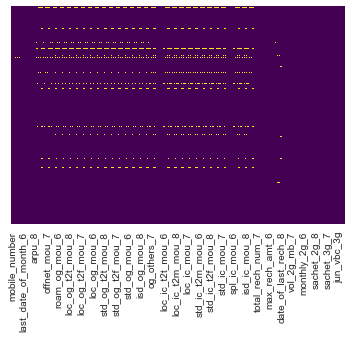

In [49]:
import seaborn as sns
sns.heatmap(df_70.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
df_70.head(4)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
13            6/30/2014            7/31/2014            8/31/2014   492.846   
16            6/30/2014            7/31/2014            8/31/2014   430.975   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
13   205.671   593.260       501.76       108.39       534.24        413.31   
16   299.869   187.894        50.51        74.01        70.61        296.29   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
7               6.66             20.08             16.68               0.0   
8               0.

In [51]:
df_70['loc_og_t2c_mou_6'].unique()

array([ 0.  ,  3.53,  0.06, ..., 12.96, 34.13, 12.89])

In [52]:
df_70['loc_og_t2c_mou_7'].unique()

array([ 0.  ,  2.4 ,  3.73, ..., 11.18, 19.73, 20.81])

In [53]:
df_70['std_og_t2c_mou_6'].unique()

array([ 0., nan])

In [54]:
df_70['std_og_t2c_mou_7'].unique()

array([ 0., nan])

In [55]:
df_70['std_og_t2c_mou_8'].unique()

array([ 0., nan])

In [56]:
df_70['std_ic_t2o_mou_6'].unique()

array([ 0., nan])

In [57]:
df_70['std_ic_t2o_mou_7'].unique()

array([ 0., nan])

In [58]:
df_70['std_ic_t2o_mou_8'].unique()

array([ 0., nan])

In [59]:
# df_70['spl_ic_mou_7'].unique()

In [60]:
df_70['date_of_last_rech_6'].dtypes

dtype('O')

In [61]:
df_70['monthly_2g_6'].unique()


array([0, 2, 1, 3, 4], dtype=int64)

In [62]:
df_70['monthly_3g_7'].unique()

array([ 0,  5,  1,  2,  3,  8,  4,  7,  6,  9, 11, 12], dtype=int64)

In [63]:
df_70['sachet_3g_7'].unique()


array([ 0,  3,  1,  4,  5,  2, 20,  6,  9, 11,  8, 10, 12, 17, 22,  7, 18,
       13, 21, 24, 15, 35, 19, 33, 14], dtype=int64)

In [64]:
df_70.drop(['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
'std_ic_t2o_mou_7','std_ic_t2o_mou_8','date_of_last_rech_6','date_of_last_rech_7',
'date_of_last_rech_8'], axis = 1, inplace =True)

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
df_70.shape

(18584, 130)

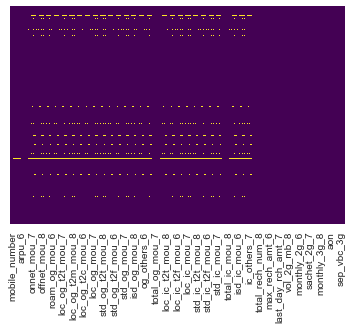

In [66]:
import seaborn as sns
sns.heatmap(df_70.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
 quality_report(df_70)

Total NaN  Percent of NaN  Nunique    Dtype
loc_og_t2m_mou_8          593        3.190917    11803  float64
spl_ic_mou_8              593        3.190917       82  float64
loc_og_t2c_mou_8          593        3.190917     1410  float64
ic_others_8               593        3.190917      965  float64
loc_og_t2f_mou_8          593        3.190917     2511  float64
loc_ic_t2m_mou_8          593        3.190917    11516  float64
loc_ic_mou_8              593        3.190917    13218  float64
std_ic_t2f_mou_8          593        3.190917     1486  float64
loc_ic_t2t_mou_8          593        3.190917     7604  float64
loc_og_t2t_mou_8          593        3.190917     8260  float64
isd_ic_mou_8              593        3.190917     2500  float64
roam_og_mou_8             593        3.190917     2996  float64
std_og_t2m_mou_8          593        3.190917     9317  float64
std_ic_t2t_mou_8          593        3.190917     3456  float64
loc_og_mou_8              593        3.190917    13300  float64
roam_ic_mou_8             593        3.190917     2570  float64
og_others_8               593        3.190917       92  float64
offnet_mou_8              593        3.190917    14693  float64
std_og_mou_8              593        3.190917    11315  float64
std_ic_mou_8              593        3.190917     6211  float64
std_ic_t2m_mou_8          593        3.190917     5028  float64
isd_og_mou_8              593        3.190917      685  float64
std_og_t2t_mou_8          593        3.190917     8024  float64
loc_ic_t2f_mou_8          593        3.190917     3703  float64
spl_og_mou_8              593        3.190917     2635  float64
onnet_mou_8               593        3.190917    12446  float64
std_og_t2f_mou_8          593        3.190917     1208  float64
std_ic_t2m_mou_7          193        1.038528     5245  float64
std_ic_t2t_mou_7          193        1.038528     3677  float64
std_ic_t2m_mou_6          193        1.038528     5170  float64
loc_ic_mou_7              193        1.038528    13590  float64
std_ic_t2f_mou_6          193        1.038528     1562  float64
std_ic_t2t_mou_6          193        1.038528     3592  float64
loc_ic_t2f_mou_6          193        1.038528     3768  float64
loc_ic_mou_6              193        1.038528    13690  float64
og_others_7               193        1.038528       83  float64
std_og_mou_7              193        1.038528    12343  float64
isd_og_mou_6              193        1.038528      800  float64
isd_og_mou_7              193        1.038528      813  float64
spl_og_mou_6              193        1.038528     2499  float64
spl_og_mou_7              193        1.038528     2753  float64
og_others_6               193        1.038528      733  float64
std_og_t2f_mou_7          193        1.038528     1268  float64
loc_ic_t2f_mou_7          193        1.038528     3834  float64
std_og_t2f_mou_6          193        1.038528     1301  float64
loc_ic_t2t_mou_6          193        1.038528     7793  float64
loc_ic_t2t_mou_7          193        1.038528     7859  float64
loc_ic_t2m_mou_6          193        1.038528    11891  float64
loc_ic_t2m_mou_7          193        1.038528    11942  float64
std_og_t2m_mou_7          193        1.038528    10190  float64
std_ic_t2f_mou_7          193        1.038528     1575  float64
spl_ic_mou_7              193        1.038528       86  float64
std_ic_mou_6              193        1.038528     6481  float64
loc_og_t2f_mou_6          193        1.038528     2601  float64
onnet_mou_6               193        1.038528    13272  float64
onnet_mou_7               193        1.038528    13402  float64
offnet_mou_6              193        1.038528    15307  float64
offnet_mou_7              193        1.038528    15447  float64
roam_ic_mou_6             193        1.038528     3060  float64
roam_ic_mou_7             193        1.038528     2611  float64
roam_og_mou_6             193        1.038528     3525  float64
roam_og_mou_7             193        1.038528     29

## FILLING MISING VALUE

In [69]:
df_70.loc_og_t2m_mou_8.fillna(df_70.loc_og_t2m_mou_8.median(), inplace=True)
df_70.spl_ic_mou_8.fillna(df_70.spl_ic_mou_8.median(), inplace=True)
df_70.loc_og_t2c_mou_8.fillna(df_70.loc_og_t2c_mou_8.median(), inplace=True)
df_70.ic_others_8.fillna(df_70.ic_others_8.median(), inplace=True)
df_70.loc_og_t2f_mou_8.fillna(df_70.loc_og_t2f_mou_8.median(), inplace=True)
df_70.loc_ic_t2m_mou_8.fillna(df_70.loc_ic_t2m_mou_8.median(), inplace=True)

df_70.loc_ic_mou_8.fillna(df_70.loc_ic_mou_8.median(), inplace=True)
df_70.std_ic_t2f_mou_8.fillna(df_70.std_ic_t2f_mou_8.median(), inplace=True)
df_70.loc_ic_t2t_mou_8.fillna(df_70.loc_ic_t2t_mou_8.median(), inplace=True)

df_70.loc_og_t2t_mou_8.fillna(df_70.loc_og_t2t_mou_8.median(), inplace=True)

df_70.isd_ic_mou_8.fillna(df_70.isd_ic_mou_8.median(), inplace =True)
df_70.roam_og_mou_8.fillna(df_70.roam_og_mou_8.median(), inplace =True)
df_70.std_og_t2m_mou_8.fillna(df_70.std_og_t2m_mou_8.median(), inplace = True)	


df_70.std_ic_t2t_mou_8.fillna(df_70.std_ic_t2t_mou_8.median(), inplace=True)

df_70.loc_og_mou_8.fillna(df_70.loc_og_mou_8.median(), inplace=True)

df_70.roam_ic_mou_8.fillna(df_70.roam_ic_mou_8.median(), inplace=True)

df_70.og_others_8.fillna(df_70.og_others_8.median(), inplace=True)
df_70.offnet_mou_8.fillna(df_70.offnet_mou_8.median(), inplace=True)
df_70.std_og_mou_8.fillna(df_70.std_og_mou_8.median(), inplace=True)
df_70.std_ic_mou_8.fillna(df_70.std_ic_mou_8.median(), inplace=True)
df_70.std_ic_t2m_mou_8.fillna(df_70.std_ic_t2m_mou_8.median(), inplace=True)
df_70.isd_og_mou_8.fillna(df_70.isd_og_mou_8.median(), inplace=True)

df_70.std_og_t2t_mou_8.fillna(df_70.std_og_t2t_mou_8.median(), inplace=True)
df_70.loc_ic_t2f_mou_8.fillna(df_70.loc_ic_t2f_mou_8.median(), inplace=True)
df_70.spl_og_mou_8.fillna(df_70.spl_og_mou_8.median(), inplace=True)


df_70.onnet_mou_8.fillna(df_70.onnet_mou_8.median(), inplace=True)
df_70.std_og_t2f_mou_8.fillna(df_70.std_og_t2f_mou_8.median(), inplace=True)
df_70.std_ic_t2m_mou_7.fillna(df_70.std_ic_t2m_mou_7.median(), inplace=True)
df_70.std_ic_t2t_mou_7.fillna(df_70.std_ic_t2t_mou_7.median(), inplace=True)
df_70.std_ic_t2m_mou_6.fillna(df_70.std_ic_t2m_mou_6.median(), inplace=True)


df_70.loc_ic_mou_7.fillna(df_70.loc_ic_mou_7.median(), inplace=True)
df_70.std_ic_t2f_mou_6.fillna(df_70.std_ic_t2f_mou_6.median(), inplace=True)
df_70.std_ic_t2t_mou_6.fillna(df_70.std_ic_t2t_mou_6.median(), inplace=True)
df_70.loc_ic_t2f_mou_6.fillna(df_70.loc_ic_t2f_mou_6.median(), inplace=True)
df_70.loc_ic_mou_6.fillna(df_70.loc_ic_mou_6.median(), inplace=True)

df_70.og_others_7.fillna(df_70.og_others_7.median(), inplace=True)
df_70.std_og_mou_7.fillna(df_70.std_og_mou_7.median(), inplace=True)

df_70.isd_og_mou_6.fillna(df_70.isd_og_mou_6.median(), inplace=True)
df_70.isd_og_mou_7.fillna(df_70.isd_og_mou_7.median(), inplace=True)
df_70.spl_og_mou_6.fillna(df_70.spl_og_mou_6.median(), inplace=True)
df_70.spl_og_mou_7.fillna(df_70.spl_og_mou_7.median(), inplace=True)


df_70.og_others_6.fillna(df_70.og_others_6.median(), inplace=True)
df_70.std_og_t2f_mou_7.fillna(df_70.std_og_t2f_mou_7.median(), inplace=True)
df_70.loc_ic_t2f_mou_7.fillna(df_70.loc_ic_t2f_mou_7.median(), inplace=True)


df_70.std_og_t2f_mou_6.fillna(df_70.std_og_t2f_mou_6.median(), inplace=True)
df_70.loc_ic_t2t_mou_6.fillna(df_70.loc_ic_t2t_mou_6.median(), inplace=True)
df_70.loc_ic_t2t_mou_7.fillna(df_70.loc_ic_t2t_mou_7.median(), inplace=True)

df_70.loc_ic_t2m_mou_6.fillna(df_70.loc_ic_t2m_mou_6.median(), inplace=True)
df_70.loc_ic_t2m_mou_7.fillna(df_70.loc_ic_t2m_mou_7.median(), inplace=True)


df_70.std_og_t2m_mou_7.fillna(df_70.std_og_t2m_mou_7.median(), inplace=True)
df_70.std_ic_t2f_mou_7.fillna(df_70.std_ic_t2f_mou_7.median(), inplace=True)
df_70.spl_ic_mou_7.fillna(df_70.spl_ic_mou_7.median(), inplace=True)


df_70.std_ic_mou_6.fillna(df_70.std_ic_mou_6.median(), inplace=True)
df_70.loc_og_t2f_mou_6.fillna(df_70.loc_og_t2f_mou_6.median(), inplace=True)

df_70.loc_og_t2f_mou_6.fillna(df_70.loc_og_t2f_mou_6.median(), inplace=True)
df_70.onnet_mou_6.fillna(df_70.onnet_mou_6.median(), inplace=True)

df_70.onnet_mou_7.fillna(df_70.onnet_mou_7.median(), inplace=True)
df_70.offnet_mou_6.fillna(df_70.offnet_mou_6.median(), inplace=True)

df_70.offnet_mou_7.fillna(df_70.offnet_mou_7.median(), inplace=True)
df_70.roam_ic_mou_6.fillna(df_70.roam_ic_mou_6.median(), inplace=True)


df_70.roam_ic_mou_7.fillna(df_70.roam_ic_mou_7.median(), inplace=True)
df_70.roam_og_mou_6.fillna(df_70.roam_og_mou_6.median(), inplace=True)

df_70.roam_og_mou_7.fillna(df_70.roam_og_mou_7.median(), inplace=True)

df_70.loc_og_t2t_mou_6.fillna(df_70.loc_og_t2t_mou_6.median(), inplace=True)
df_70.loc_og_t2t_mou_7.fillna(df_70.loc_og_t2t_mou_7.median(), inplace=True)
df_70.std_ic_mou_7.fillna(df_70.std_ic_mou_7.median(), inplace=True)


df_70.loc_og_t2m_mou_7.fillna(df_70.loc_og_t2m_mou_7.median(), inplace=True)

df_70.loc_og_t2m_mou_6.fillna(df_70.loc_og_t2m_mou_6.median(), inplace=True) ##############
df_70.loc_og_t2f_mou_7.fillna(df_70.loc_og_t2f_mou_7.median(), inplace=True)


df_70.ic_others_6.fillna(df_70.ic_others_6.median(), inplace=True)


df_70.std_og_t2m_mou_6.fillna(df_70.std_og_t2m_mou_6.median(), inplace=True)


df_70.std_og_t2t_mou_7.fillna(df_70.std_og_t2t_mou_7.median(), inplace=True)



df_70.loc_og_t2c_mou_6.fillna(df_70.loc_og_t2c_mou_6.median(), inplace=True)
df_70.isd_ic_mou_6.fillna(df_70.isd_ic_mou_6.median(), inplace=True)


df_70.isd_ic_mou_7.fillna(df_70.isd_ic_mou_7.median(), inplace=True)

df_70.spl_ic_mou_6.fillna(df_70.spl_ic_mou_6.median(), inplace=True)

df_70.ic_others_7.fillna(df_70.ic_others_7.median(), inplace=True)
df_70.std_og_t2t_mou_6.fillna(df_70.std_og_t2t_mou_6.median(), inplace=True)


df_70.loc_og_mou_7.fillna(df_70.loc_og_mou_7.median(), inplace=True)



df_70.loc_og_mou_6.fillna(df_70.loc_og_mou_6.median(), inplace=True)


# df_70.loc_og_t2m_mou_8.fillna(df_70.loc_og_t2m_mou_8.median(), inplace=True)

df_70.loc_og_t2c_mou_7.fillna(df_70.loc_og_t2c_mou_7.median(), inplace=True)
df_70.std_og_mou_6.fillna(df_70.std_og_mou_6.median(), inplace=True)


df_70.std_og_mou_6.fillna(df_70.std_og_mou_6.median(), inplace=True)

df_70.loc_ic_t2o_mou.fillna(df_70.loc_ic_t2o_mou.median(), inplace=True)


df_70.std_og_mou_6.fillna(df_70.std_og_mou_6.median(), inplace=True)

df_70.loc_ic_t2o_mou.fillna(df_70.loc_ic_t2o_mou.median(), inplace=True)

df_70.std_og_t2o_mou.fillna(df_70.std_og_t2o_mou.median(), inplace=True)

df_70.loc_og_t2o_mou.fillna(df_70.loc_og_t2o_mou.median(), inplace=True)
# df_70.loc_ic_t2o_mou.fillna(df_70.loc_ic_t2o_mou.median(), inplace=True)





C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


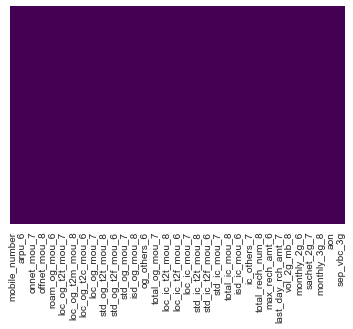

In [70]:
import seaborn as sns
sns.heatmap(df_70.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
 quality_report(df_70)

Total NaN  Percent of NaN  Nunique    Dtype
average_rech_amt            0             0.0     2612  float64
loc_og_mou_7                0             0.0    14030  float64
std_og_t2t_mou_6            0             0.0     8663  float64
std_og_t2t_mou_7            0             0.0     8825  float64
std_og_t2t_mou_8            0             0.0     8024  float64
std_og_t2m_mou_6            0             0.0    10062  float64
std_og_t2m_mou_7            0             0.0    10190  float64
std_og_t2m_mou_8            0             0.0     9317  float64
std_og_t2f_mou_6            0             0.0     1301  float64
std_og_t2f_mou_7            0             0.0     1268  float64
std_og_t2f_mou_8            0             0.0     1208  float64
std_og_mou_6                0             0.0    12239  float64
std_og_mou_7                0             0.0    12343  float64
std_og_mou_8                0             0.0    11315  float64
isd_og_mou_6                0             0.0      800  float64
isd_og_mou_7                0             0.0      813  float64
isd_og_mou_8                0             0.0      685  float64
spl_og_mou_6                0             0.0     2499  float64
spl_og_mou_7                0             0.0     2753  float64
spl_og_mou_8                0             0.0     2635  float64
og_others_6                 0             0.0      733  float64
og_others_7                 0             0.0       83  float64
og_others_8                 0             0.0       92  float64
total_og_mou_6              0             0.0    16194  float64
total_og_mou_7              0             0.0    16303  float64
total_og_mou_8              0             0.0    15544  float64
loc_ic_t2t_mou_6            0             0.0     7793  float64
loc_ic_t2t_mou_7            0             0.0     7859  float64
loc_ic_t2t_mou_8            0             0.0     7604  float64
loc_ic_t2m_mou_6            0             0.0    11891  float64
loc_ic_t2m_mou_7            0             0.0    11942  float64
loc_og_mou_8                0             0.0    13300  float64
loc_og_mou_6                0             0.0    13834  float64
sep_vbc_3g                  0             0.0     1422  float64
loc_og_t2c_mou_8            0             0.0     1410  float64
loc_og_t2o_mou              0             0.0        1  float64
std_og_t2o_mou              0             0.0        1  float64
loc_ic_t2o_mou              0             0.0        1  float64
arpu_6                      0             0.0    18226  float64
arpu_7                      0             0.0    18245  float64
arpu_8                      0             0.0    17705  float64
onnet_mou_6                 0             0.0    13272  float64
onnet_mou_7                 0             0.0    13402  float64
onnet_mou_8                 0             0.0    12446  float64
offnet_mou_6                0             0.0    15307  float64
offnet_mou_7                0             0.0    15447  float64
offnet_mou_8                0             0.0    14693  float64
roam_ic_mou_6               0             0.0     3060  float64
roam_ic_mou_7               0             0.0     2611  float64
roam_ic_mou_8               0             0.0     2570  float64
roam_og_mou_6               0             0.0     3525  float64
roam_og_mou_7               0             0.0     2998  float64
roam_og_mou_8               0             0.0     2996  float64
loc_og_t2t_mou_6            0             0.0     8593  float64
loc_og_t2t_mou_7            0             0.0     8574  float64
loc_og_t2t_mou_8            0             0.0     8260  float64
loc_og_t2m_mou_6            0             0.0    12288  float64
loc_og_t2m_mou_7            0             0.0    12406  float64
loc_og_t2m_mou_8            0             0.0    11803  float64
loc_og_t2f_mou_6            0             0.0     2601  float64
loc_og_t2f_mou_7            0             0.0     2614  float64
loc_og_t2f_mou_8            0             0.0     25

count    1.858400e+04
mean     7.001221e+09
std      6.858743e+05
min      7.000000e+09
25%      7.000635e+09
50%      7.001231e+09
75%      7.001812e+09
max      7.002411e+09
Name: mobile_number, dtype: float64


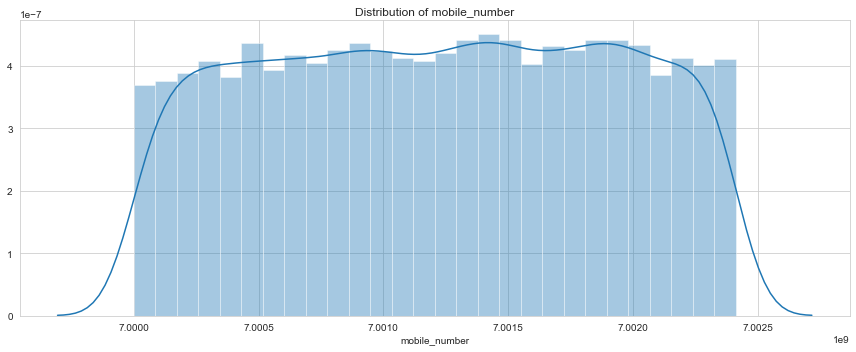

count    18584.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


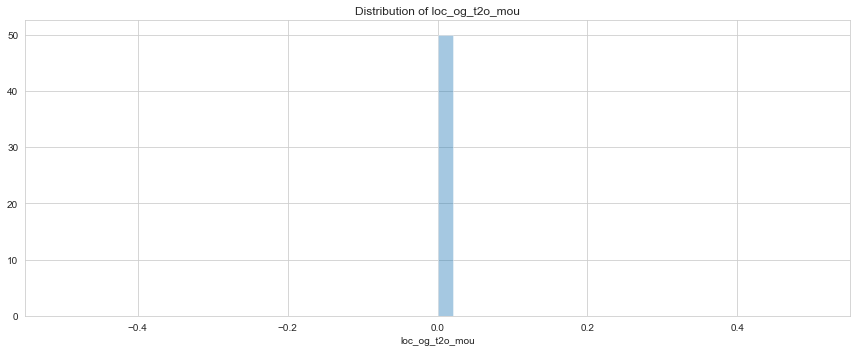

count    18584.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


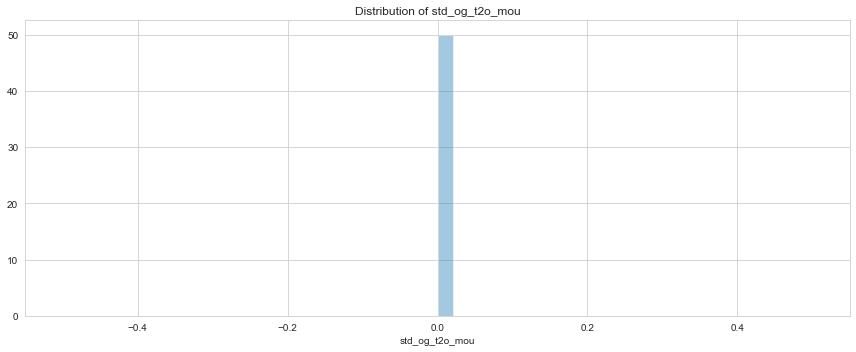

count    18584.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


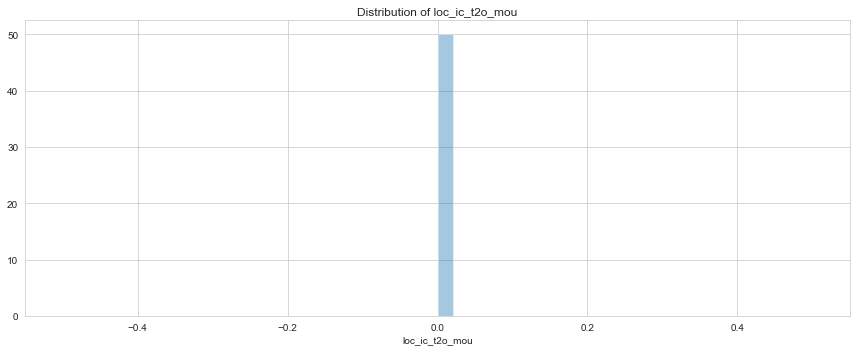

count    18584.000000
mean       585.865119
std        454.976718
min      -2041.228000
25%        364.306000
50%        493.420500
75%        700.223500
max      27731.088000
Name: arpu_6, dtype: float64


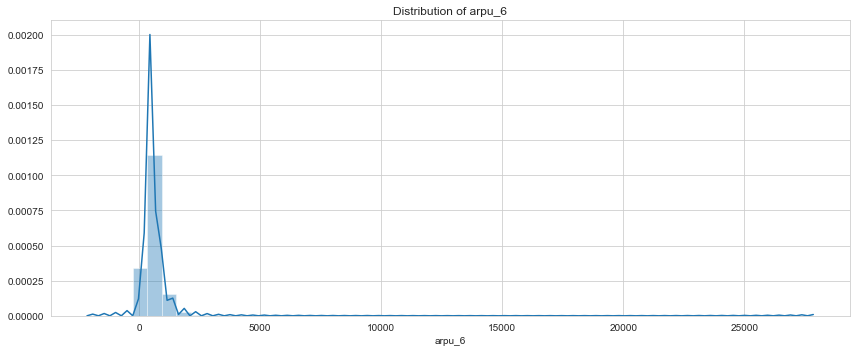

count    18584.00000
mean       585.16281
std        472.40926
min      -2014.04500
25%        363.28475
50%        491.94250
75%        696.04400
max      35145.83400
Name: arpu_7, dtype: float64


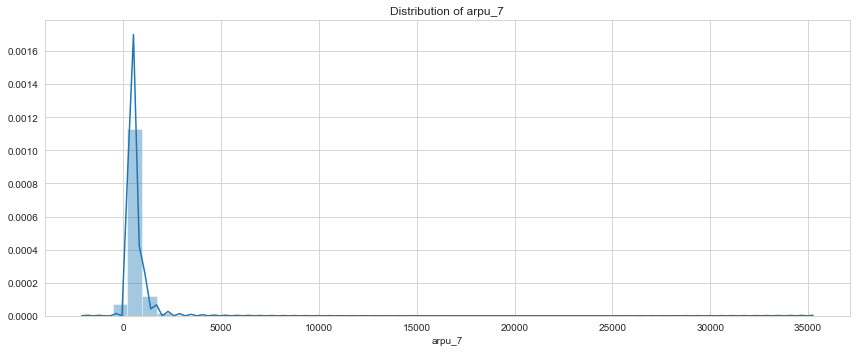

count    18584.000000
mean       532.705046
std        499.047339
min       -945.808000
25%        289.311750
50%        452.051000
75%        671.284000
max      33543.624000
Name: arpu_8, dtype: float64


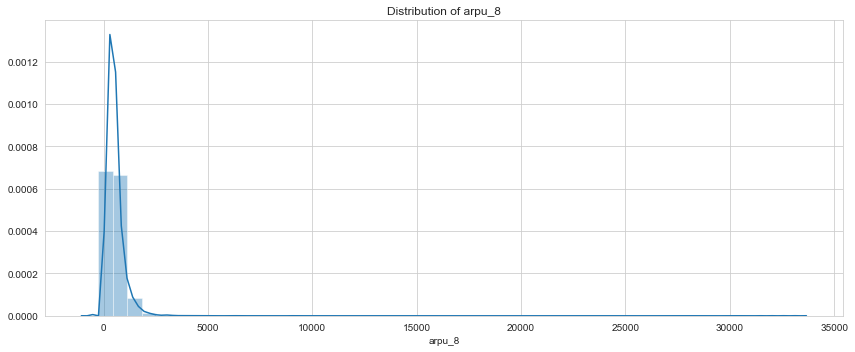

count    18584.000000
mean       294.020278
std        451.938343
min          0.000000
25%         43.410000
50%        127.830000
75%        350.152500
max       6504.340000
Name: onnet_mou_6, dtype: float64


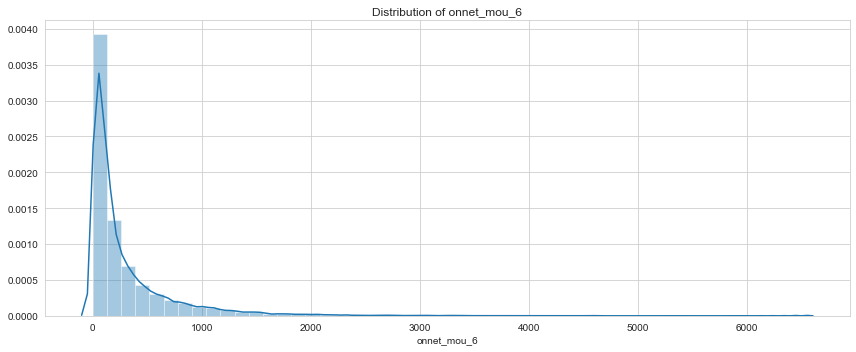

count    18584.000000
mean       302.083024
std        477.310771
min          0.000000
25%         43.582500
50%        127.760000
75%        354.865000
max       8157.780000
Name: onnet_mou_7, dtype: float64


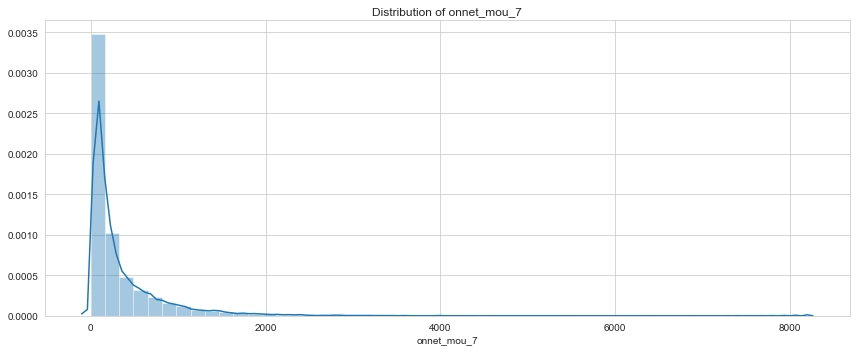

count    18584.000000
mean       267.822546
std        464.259778
min          0.000000
25%         34.352500
50%        105.810000
75%        293.597500
max      10752.560000
Name: onnet_mou_8, dtype: float64


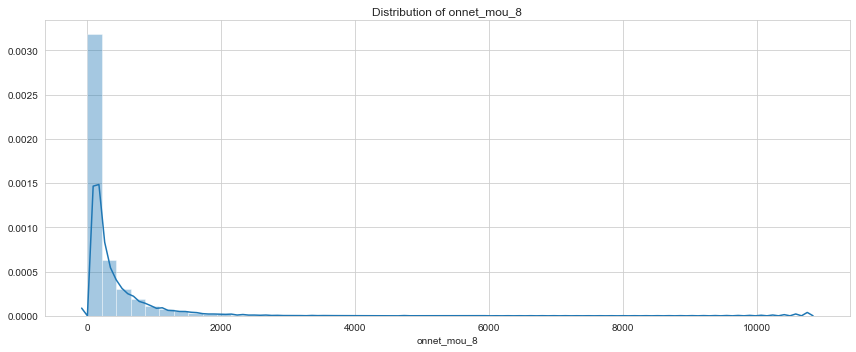

count    18584.000000
mean       421.736141
std        475.942214
min          0.000000
25%        142.720000
50%        286.580000
75%        522.032500
max       8362.360000
Name: offnet_mou_6, dtype: float64


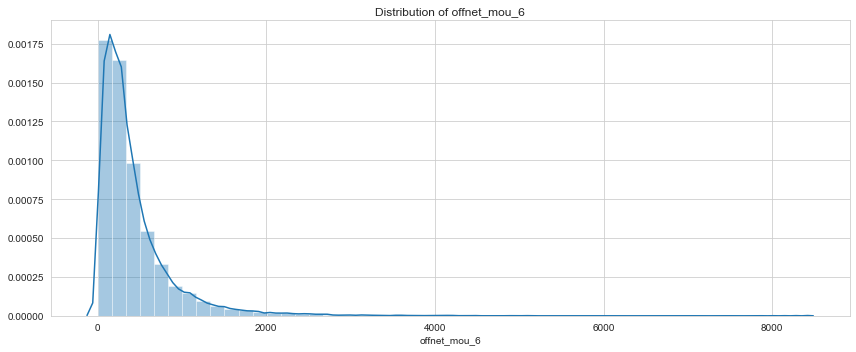

count    18584.000000
mean       426.902264
std        490.661583
min          0.000000
25%        142.870000
50%        286.280000
75%        530.172500
max       9667.130000
Name: offnet_mou_7, dtype: float64


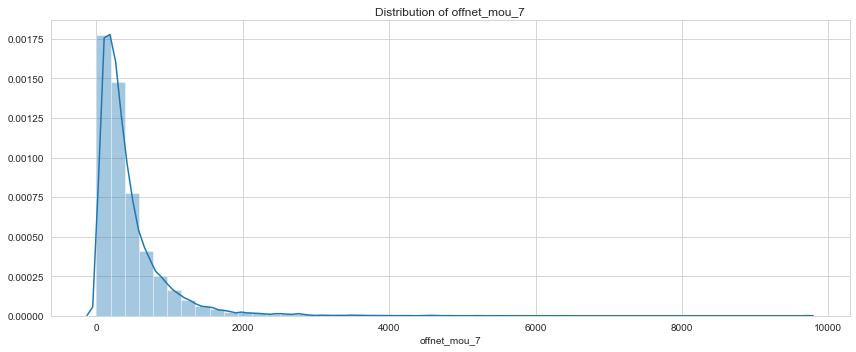

count    18584.000000
mean       385.381479
std        476.525713
min          0.000000
25%        112.717500
50%        252.130000
75%        482.732500
max      13547.840000
Name: offnet_mou_8, dtype: float64


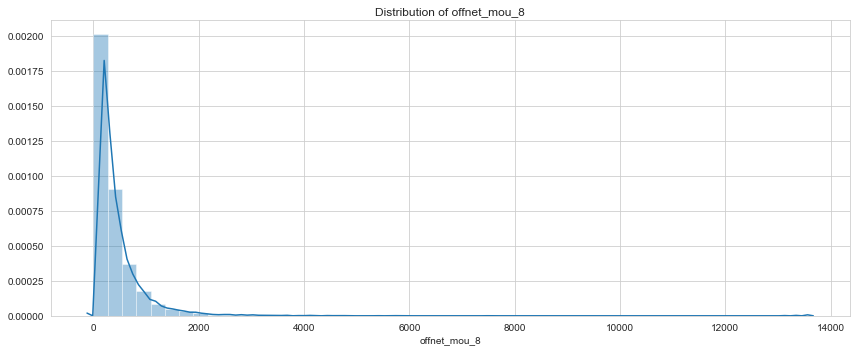

count    18584.000000
mean        17.772575
std         81.534511
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2613.310000
Name: roam_ic_mou_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


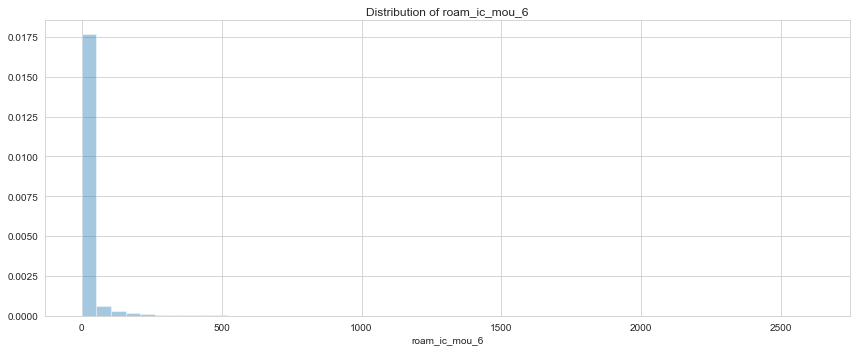

count    18584.000000
mean        14.056731
std         83.015532
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3813.290000
Name: roam_ic_mou_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


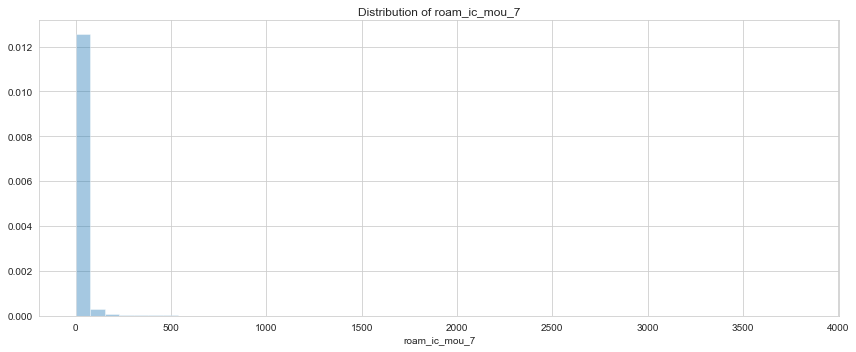

count    18584.000000
mean        13.741537
std         81.156654
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4169.810000
Name: roam_ic_mou_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


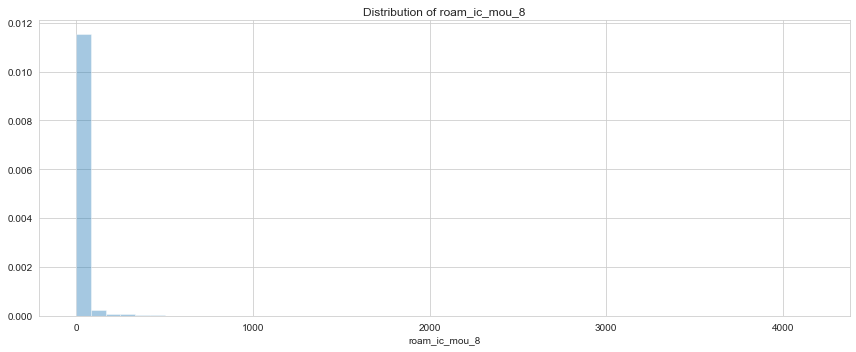

count    18584.000000
mean        29.178674
std        113.469915
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2165.440000
Name: roam_og_mou_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


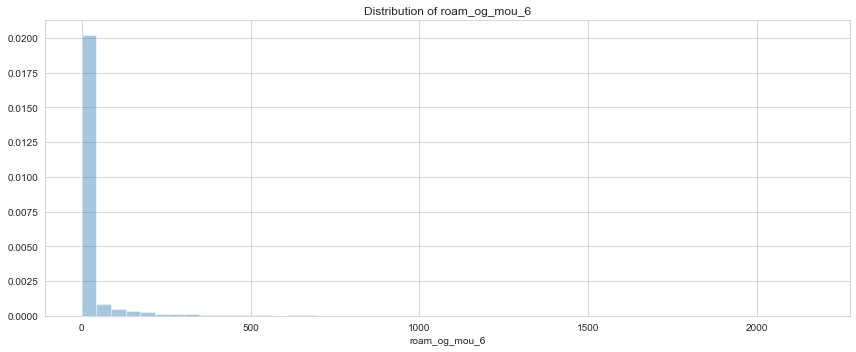

count    18584.000000
mean        22.065538
std         96.148781
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1878.860000
Name: roam_og_mou_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


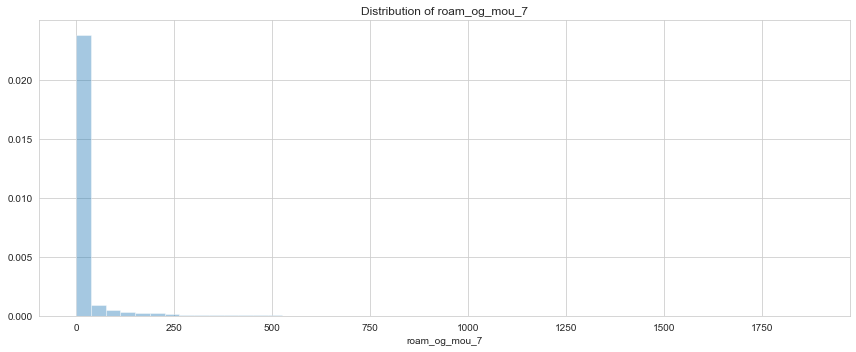

count    18584.000000
mean        21.790694
std        106.298113
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3493.360000
Name: roam_og_mou_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


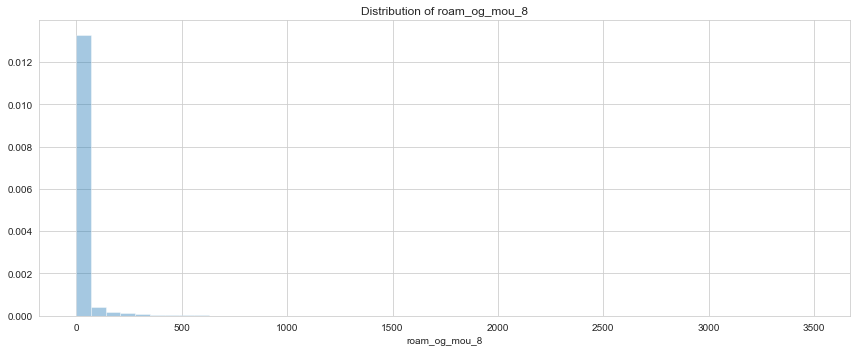

count    18584.000000
mean        95.186197
std        234.708723
min          0.000000
25%          9.075000
50%         33.730000
75%         92.495000
max       6431.330000
Name: loc_og_t2t_mou_6, dtype: float64


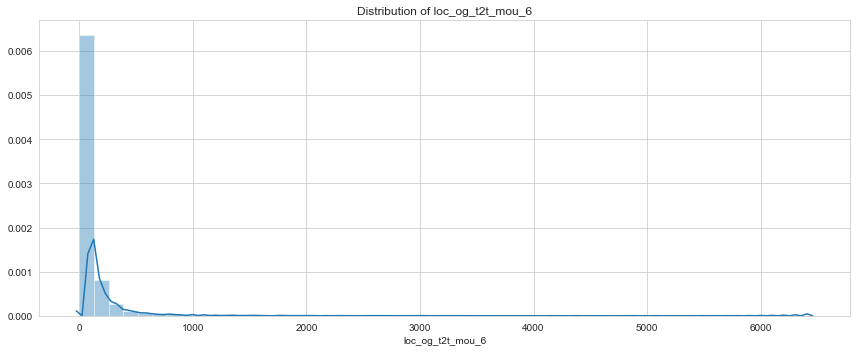

count    18584.000000
mean        95.833235
std        244.611116
min          0.000000
25%         10.180000
50%         34.380000
75%         91.937500
max       7400.660000
Name: loc_og_t2t_mou_7, dtype: float64


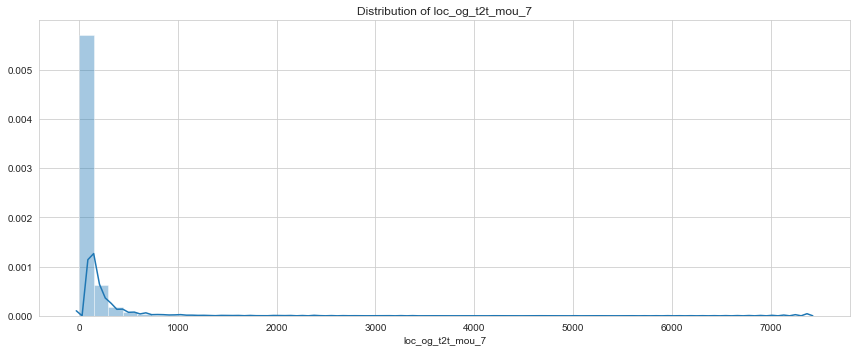

count    18584.000000
mean        88.192524
std        238.378818
min          0.000000
25%          7.840000
50%         31.230000
75%         85.687500
max      10752.560000
Name: loc_og_t2t_mou_8, dtype: float64


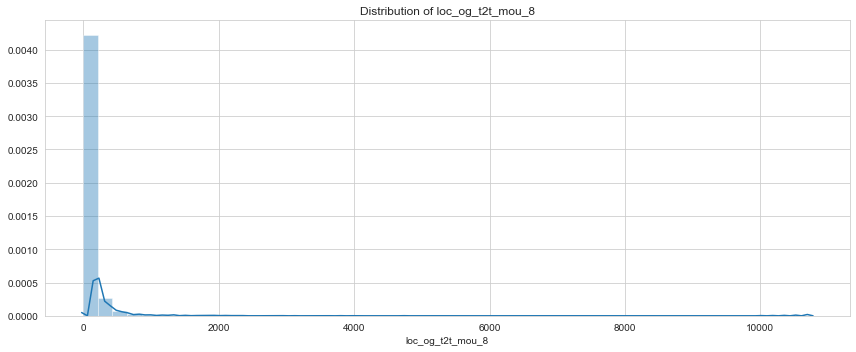

count    18584.000000
mean       184.400218
std        252.141801
min          0.000000
25%         32.860000
50%        104.360000
75%        241.700000
max       4212.040000
Name: loc_og_t2m_mou_6, dtype: float64


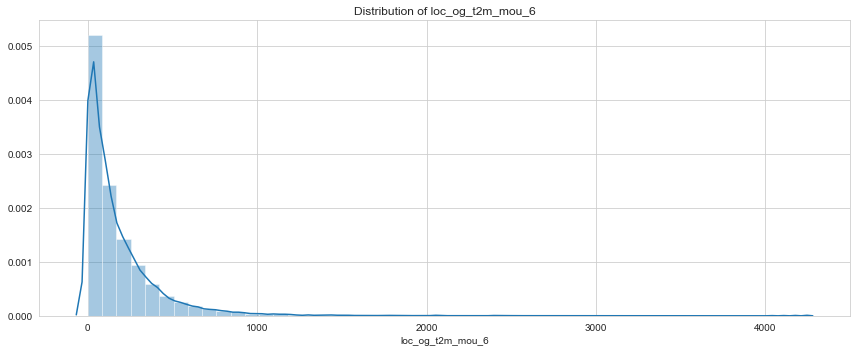

count    18584.000000
mean       183.650784
std        240.097085
min          0.000000
25%         36.255000
50%        107.260000
75%        241.215000
max       4456.740000
Name: loc_og_t2m_mou_7, dtype: float64


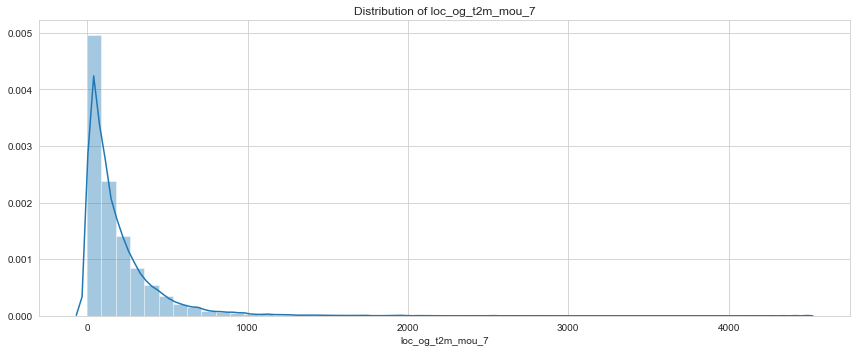

count    18584.000000
mean       172.627229
std        235.254953
min          0.000000
25%         28.930000
50%         97.290000
75%        225.632500
max       4524.590000
Name: loc_og_t2m_mou_8, dtype: float64


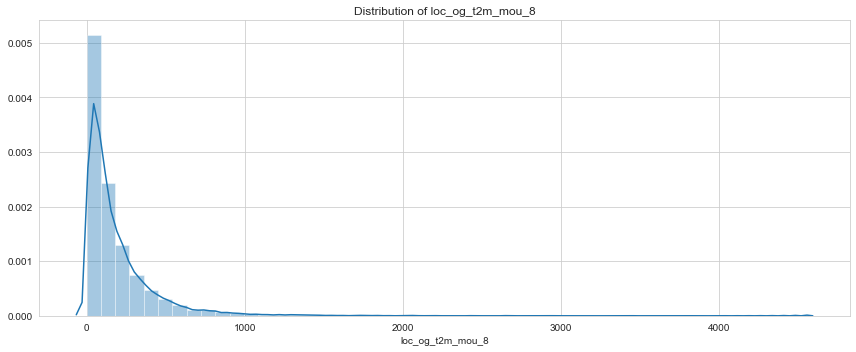

count    18584.000000
mean         6.843709
std         19.730398
min          0.000000
25%          0.000000
50%          0.400000
75%          5.230000
max        617.580000
Name: loc_og_t2f_mou_6, dtype: float64


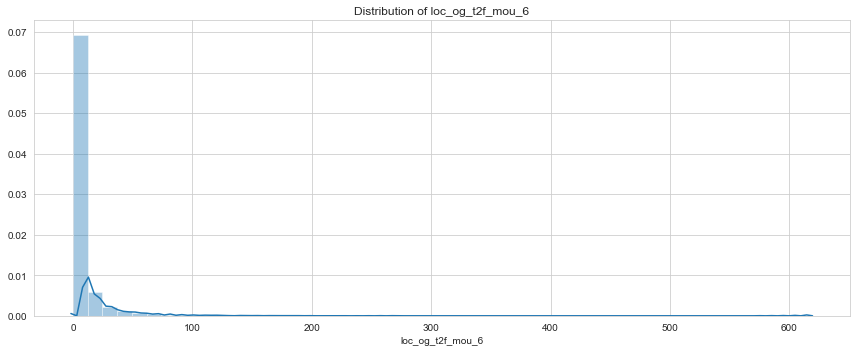

count    18584.000000
mean         6.932276
std         19.269903
min          0.000000
25%          0.000000
50%          0.460000
75%          5.230000
max        481.840000
Name: loc_og_t2f_mou_7, dtype: float64


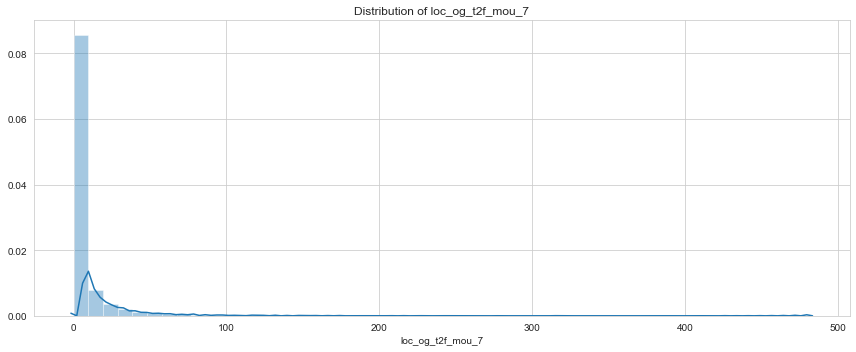

count    18584.000000
mean         6.403163
std         18.531787
min          0.000000
25%          0.000000
50%          0.310000
75%          4.690000
max        539.080000
Name: loc_og_t2f_mou_8, dtype: float64


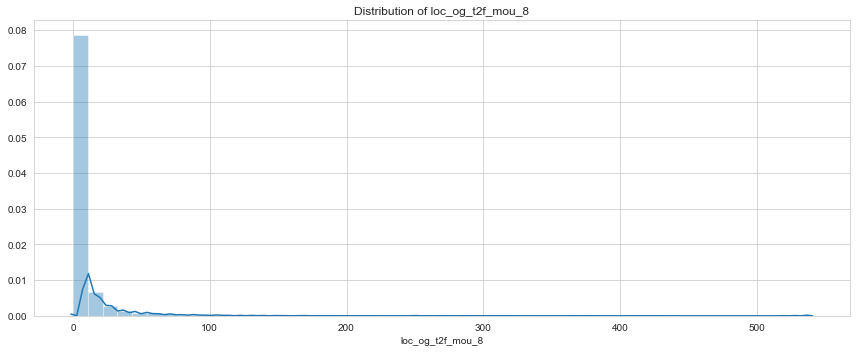

count    18584.000000
mean         1.565863
std          7.067046
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        342.860000
Name: loc_og_t2c_mou_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


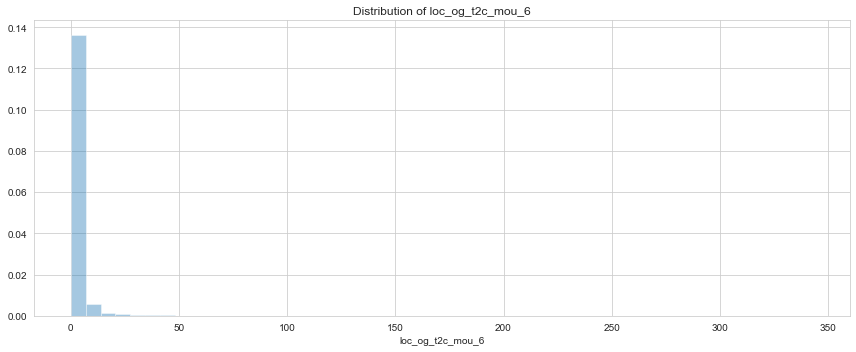

count    18584.000000
mean         1.901642
std         10.247147
min          0.000000
25%          0.000000
50%          0.000000
75%          0.080000
max        569.710000
Name: loc_og_t2c_mou_7, dtype: float64


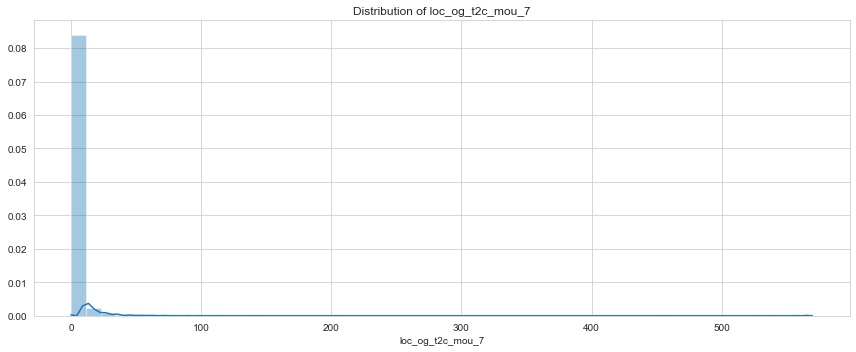

count    18584.000000
mean         1.739092
std          7.731819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.030000
max        351.830000
Name: loc_og_t2c_mou_8, dtype: float64


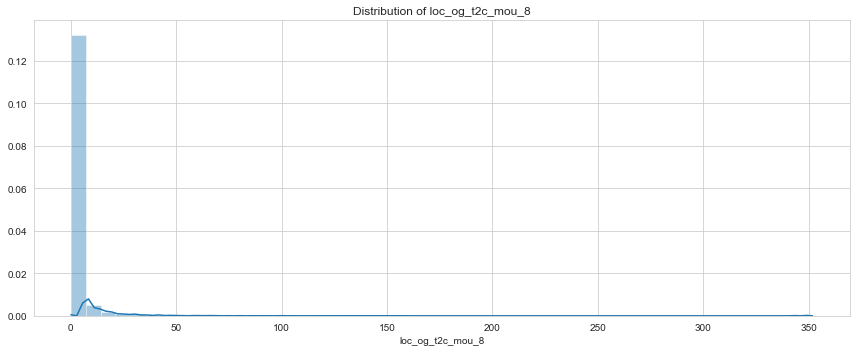

count    18584.000000
mean       286.778447
std        379.899081
min          0.000000
25%         55.337500
50%        171.180000
75%        377.405000
max      10643.380000
Name: loc_og_mou_6, dtype: float64


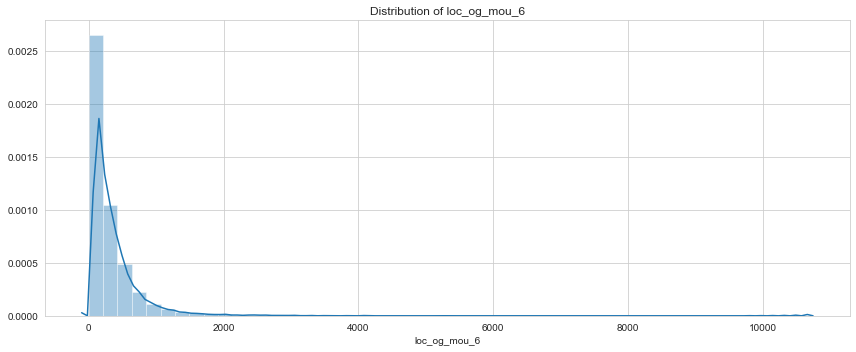

count    18584.00000
mean       286.78317
std        371.59897
min          0.00000
25%         61.58250
50%        176.56000
75%        378.52000
max       7674.78000
Name: loc_og_mou_7, dtype: float64


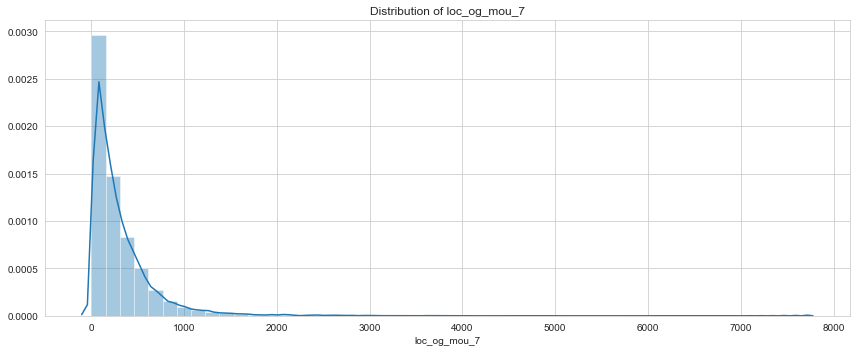

count    18584.000000
mean       268.231663
std        367.052201
min          0.000000
25%         48.920000
50%        160.180000
75%        351.732500
max      11039.910000
Name: loc_og_mou_8, dtype: float64


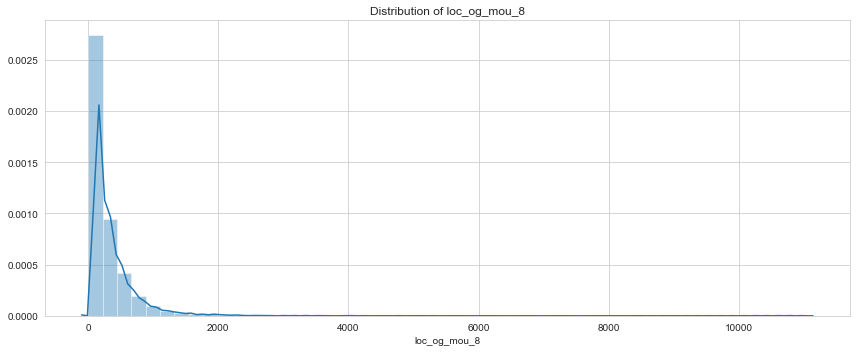

count    18584.000000
mean       186.792527
std        401.407730
min          0.000000
25%          0.000000
50%         12.890000
75%        173.557500
max       6482.440000
Name: std_og_t2t_mou_6, dtype: float64


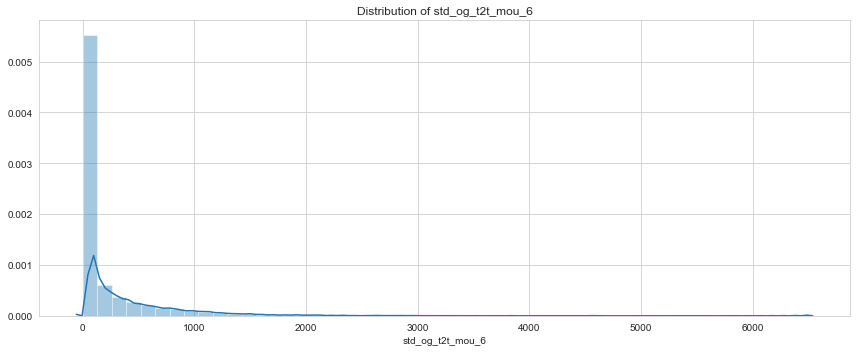

count    18584.000000
mean       196.643087
std        424.687822
min          0.000000
25%          0.000000
50%         13.510000
75%        184.150000
max       8133.660000
Name: std_og_t2t_mou_7, dtype: float64


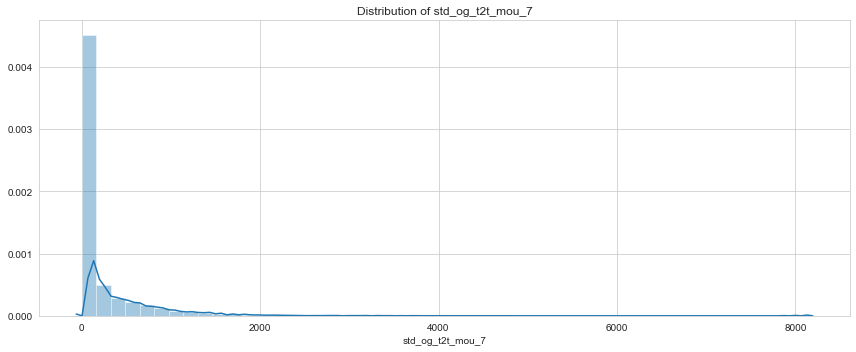

count    18584.000000
mean       169.259011
std        405.750242
min          0.000000
25%          0.000000
50%          7.530000
75%        128.552500
max       6755.040000
Name: std_og_t2t_mou_8, dtype: float64


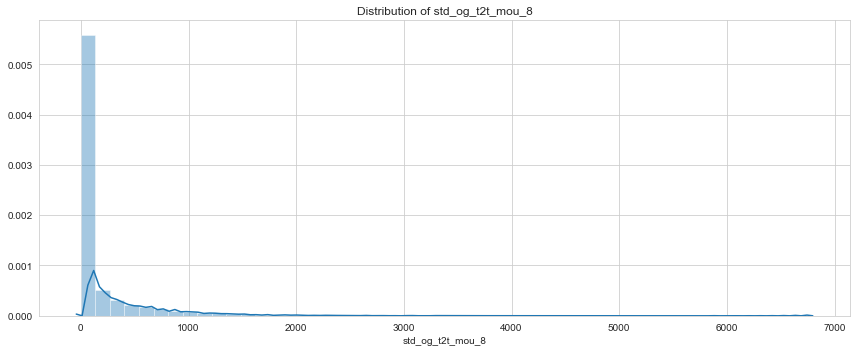

count    18584.000000
mean       202.204171
std        418.655322
min          0.000000
25%          2.030000
50%         38.830000
75%        208.545000
max       8314.760000
Name: std_og_t2m_mou_6, dtype: float64


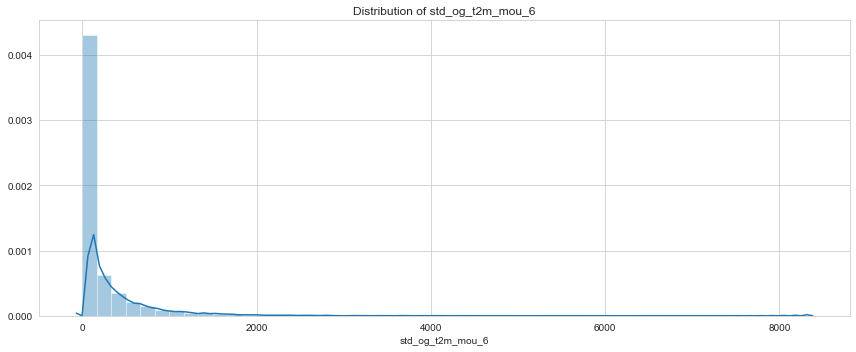

count    18584.000000
mean       212.841225
std        443.638579
min          0.000000
25%          1.810000
50%         38.590000
75%        218.070000
max       9284.740000
Name: std_og_t2m_mou_7, dtype: float64


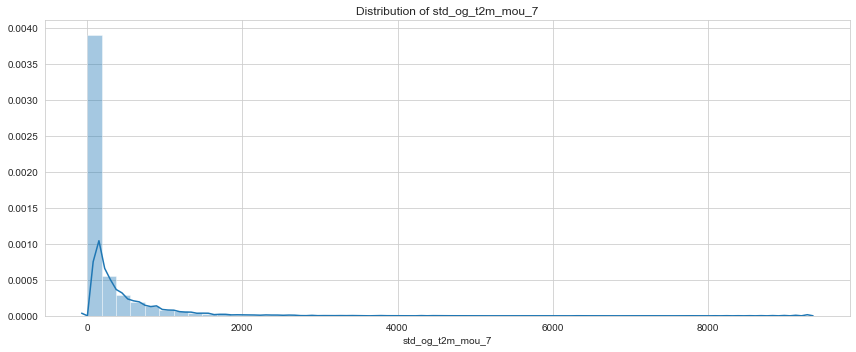

count    18584.000000
mean       180.625503
std        417.593883
min          0.000000
25%          0.680000
50%         26.940000
75%        164.030000
max      13411.210000
Name: std_og_t2m_mou_8, dtype: float64


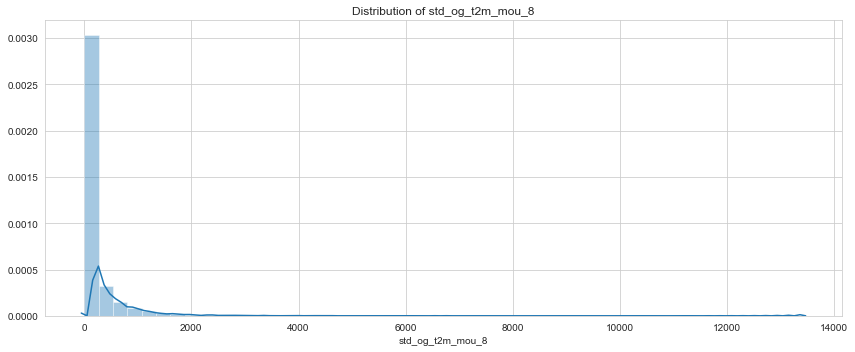

count    18584.000000
mean         1.874738
std         11.460511
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        354.340000
Name: std_og_t2f_mou_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


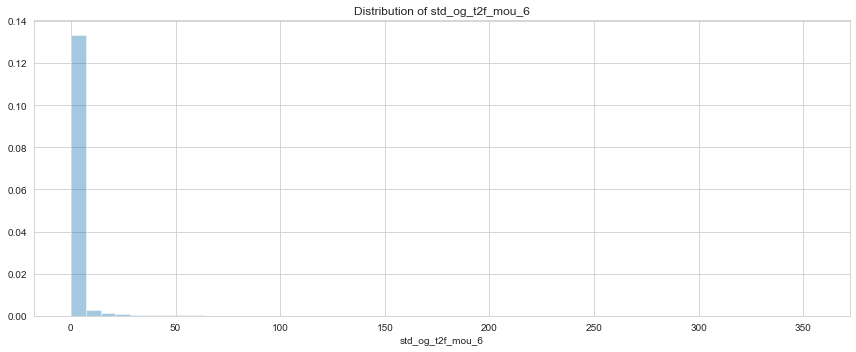

count    18584.000000
mean         1.918806
std         12.544913
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        544.630000
Name: std_og_t2f_mou_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


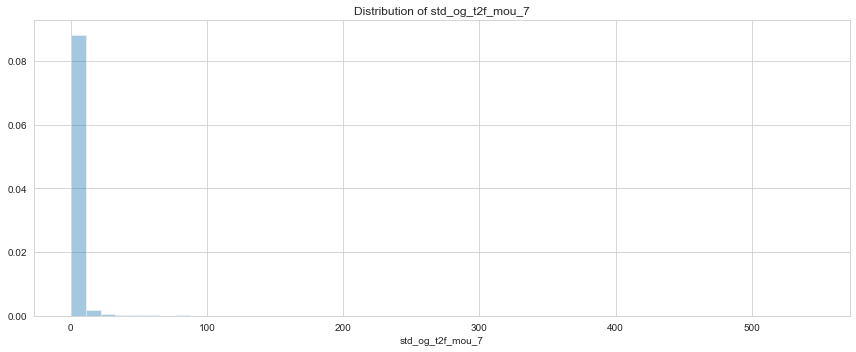

count    18584.000000
mean         1.738267
std         11.663824
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        516.910000
Name: std_og_t2f_mou_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


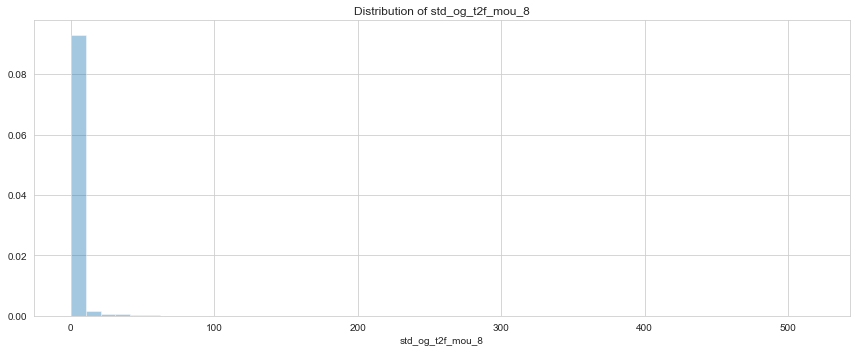

count    18584.000000
mean       391.668042
std        604.030019
min          0.000000
25%          6.630000
50%        128.010000
75%        561.955000
max       8432.990000
Name: std_og_mou_6, dtype: float64


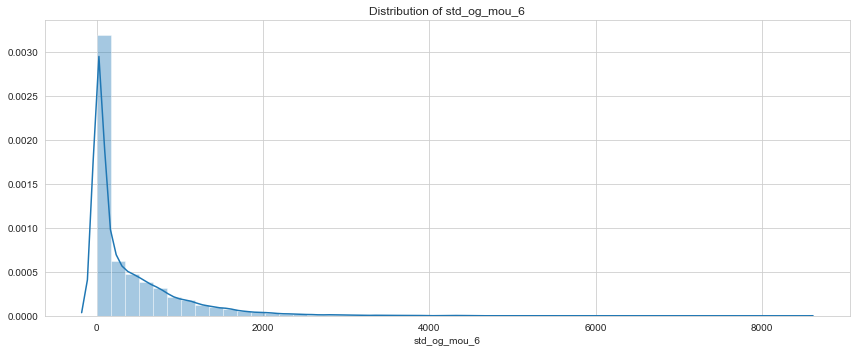

count    18584.000000
mean       412.264791
std        639.250180
min          0.000000
25%          6.557500
50%        134.660000
75%        606.732500
max      10936.730000
Name: std_og_mou_7, dtype: float64


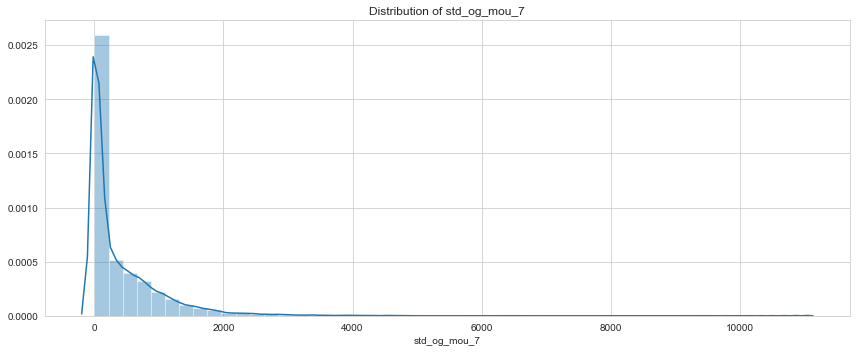

count    18584.000000
mean       353.172307
std        614.762589
min          0.000000
25%          3.760000
50%         82.910000
75%        468.582500
max      13668.780000
Name: std_og_mou_8, dtype: float64


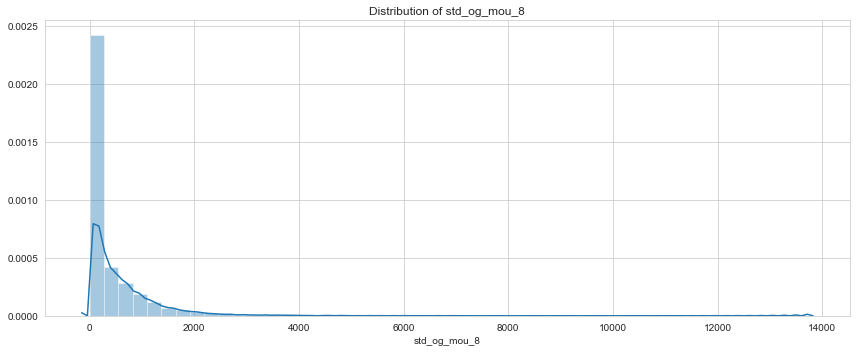

count    18584.000000
mean         2.402644
std         53.581167
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5900.660000
Name: isd_og_mou_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


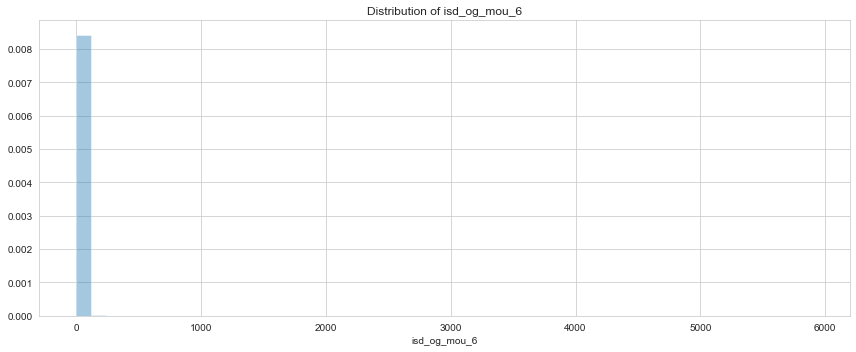

count    18584.000000
mean         2.282968
std         52.781228
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5490.280000
Name: isd_og_mou_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


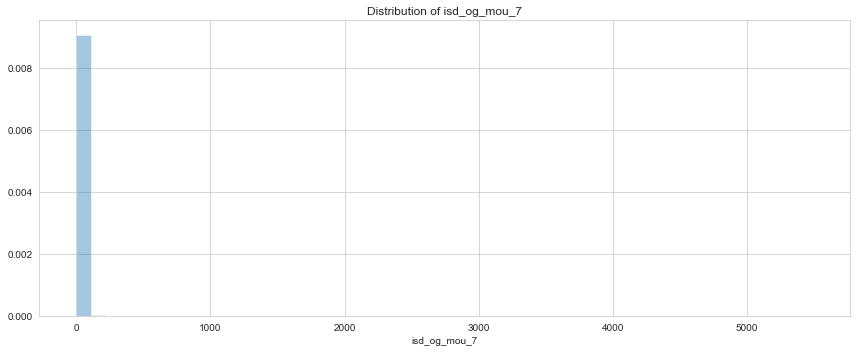

count    18584.000000
mean         2.083753
std         52.783792
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5681.540000
Name: isd_og_mou_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


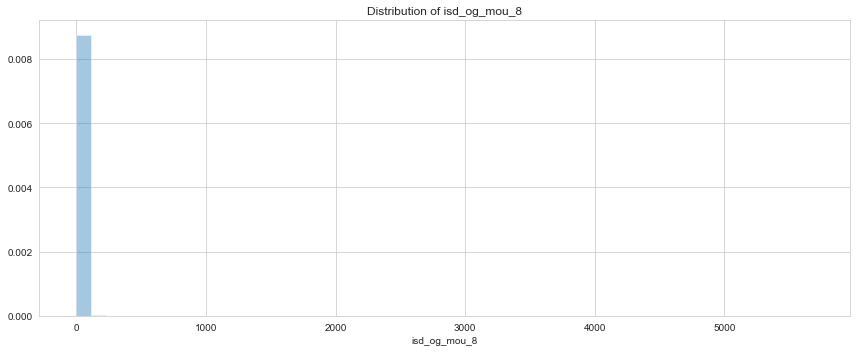

count    18584.000000
mean         5.791520
std         16.705798
min          0.000000
25%          0.000000
50%          0.250000
75%          5.130000
max        537.880000
Name: spl_og_mou_6, dtype: float64


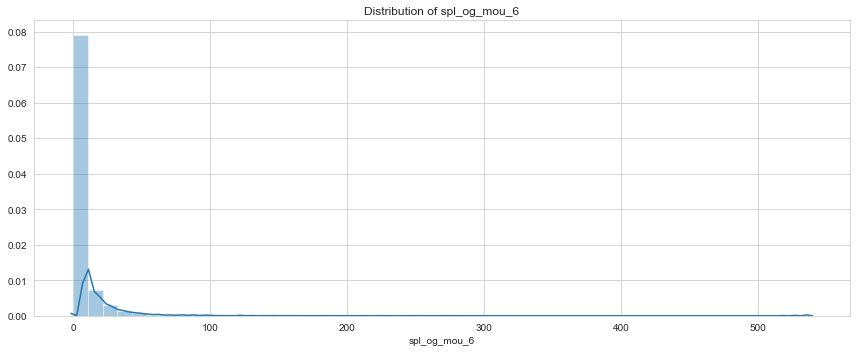

count    18584.000000
mean         7.223203
std         21.118423
min          0.000000
25%          0.000000
50%          0.830000
75%          7.010000
max       1125.310000
Name: spl_og_mou_7, dtype: float64


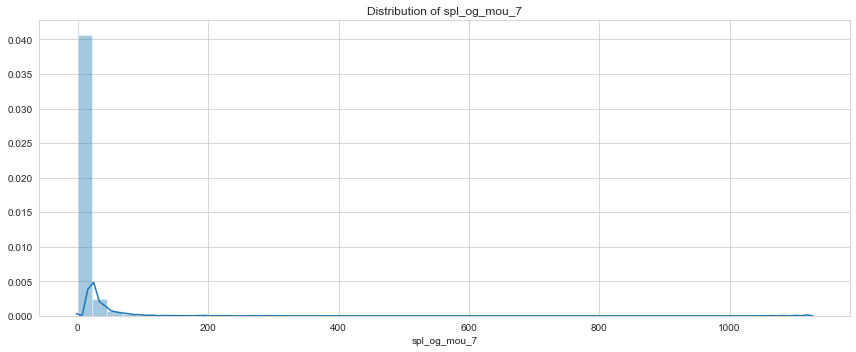

count    18584.000000
mean         6.698585
std         19.637035
min          0.000000
25%          0.000000
50%          0.660000
75%          6.310000
max        531.140000
Name: spl_og_mou_8, dtype: float64


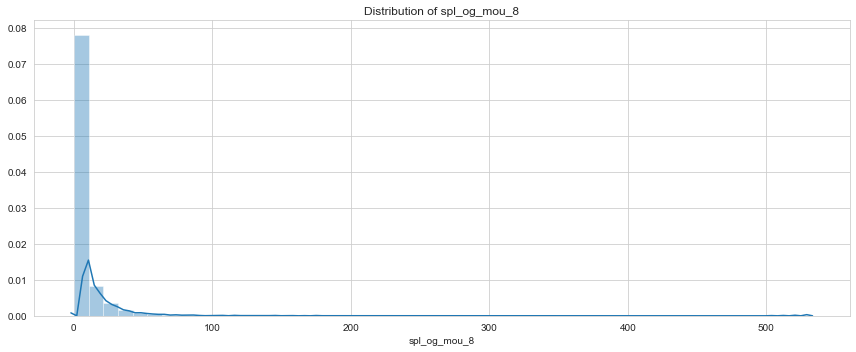

count    18584.000000
mean         0.678082
std          2.290300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.610000
Name: og_others_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


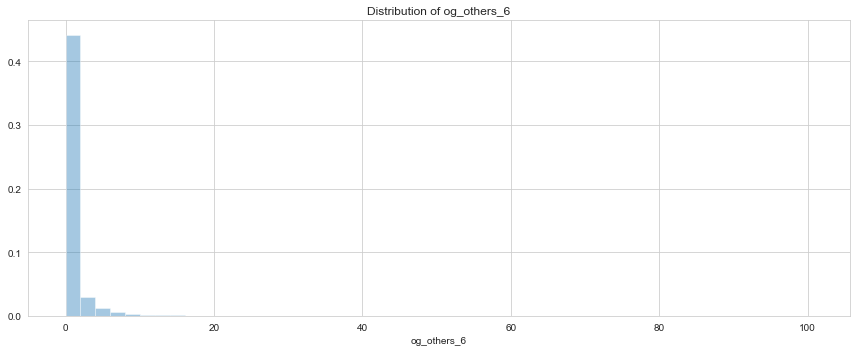

count    18584.000000
mean         0.034396
std          1.409864
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        132.280000
Name: og_others_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


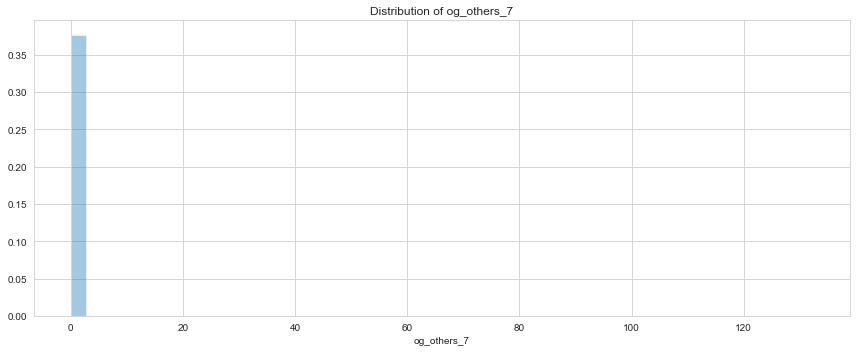

count    18584.000000
mean         0.029954
std          1.020910
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        101.660000
Name: og_others_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


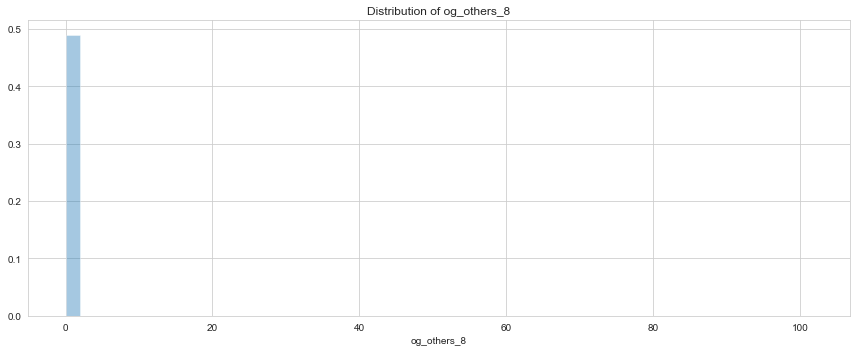

count    18584.000000
mean       684.218781
std        661.300787
min          0.000000
25%        263.720000
50%        509.880000
75%        888.907500
max      10674.030000
Name: total_og_mou_6, dtype: float64


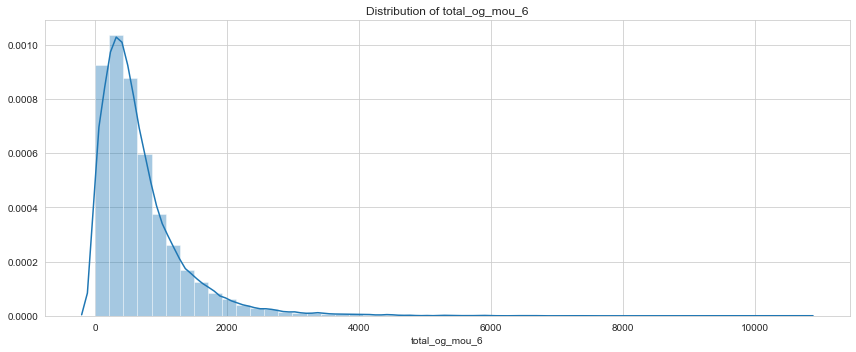

count    18584.000000
mean       705.356562
std        687.752306
min          0.000000
25%        275.182500
50%        521.815000
75%        920.495000
max      11365.310000
Name: total_og_mou_7, dtype: float64


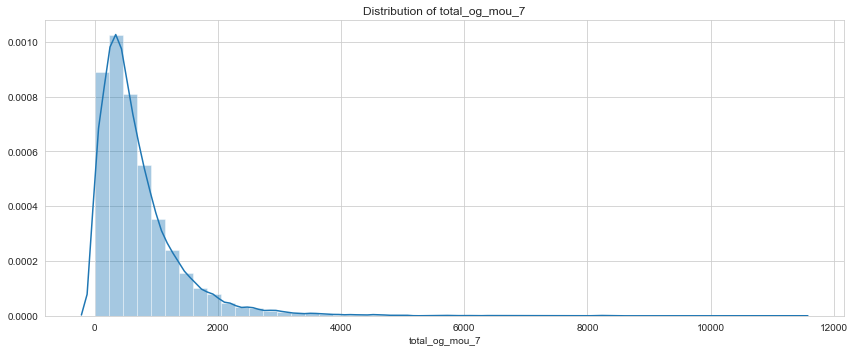

count    18584.000000
mean       622.446691
std        688.766846
min          0.000000
25%        189.070000
50%        436.145000
75%        825.090000
max      13848.260000
Name: total_og_mou_8, dtype: float64


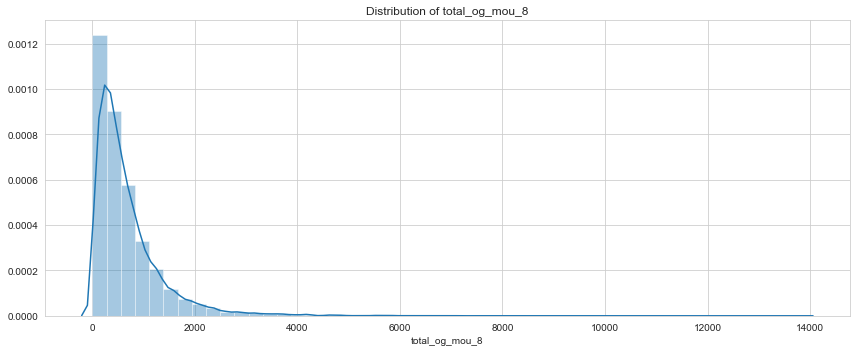

count    18584.000000
mean        69.646166
std        161.505815
min          0.000000
25%          9.030000
50%         29.910000
75%         74.365000
max       6351.440000
Name: loc_ic_t2t_mou_6, dtype: float64


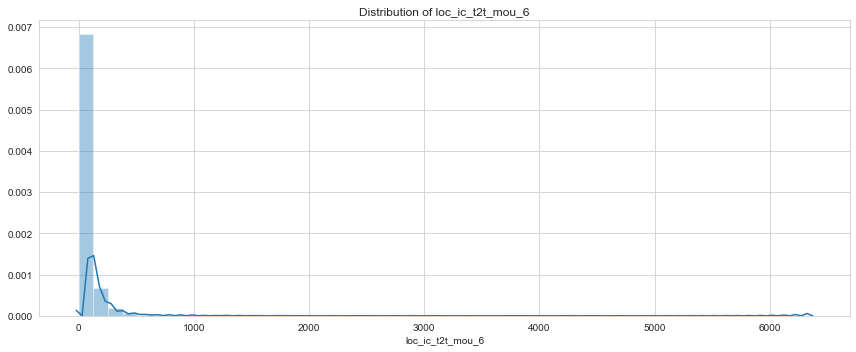

count    18584.000000
mean        71.388569
std        171.093719
min          0.000000
25%         10.210000
50%         31.060000
75%         74.882500
max       5080.880000
Name: loc_ic_t2t_mou_7, dtype: float64


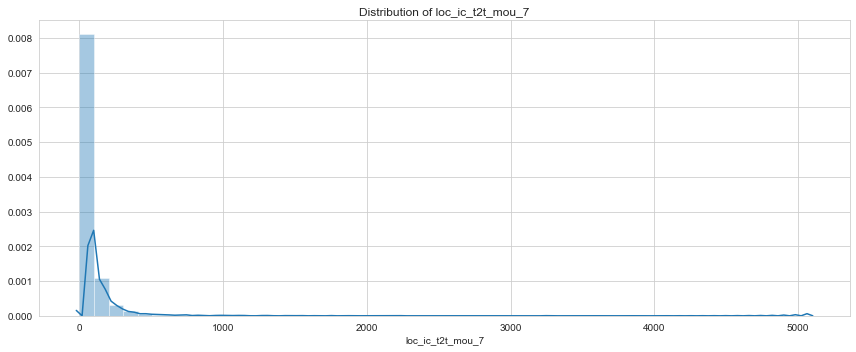

count    18584.000000
mean        66.904077
std        154.518269
min          0.000000
25%          8.690000
50%         28.480000
75%         71.057500
max       3971.940000
Name: loc_ic_t2t_mou_8, dtype: float64


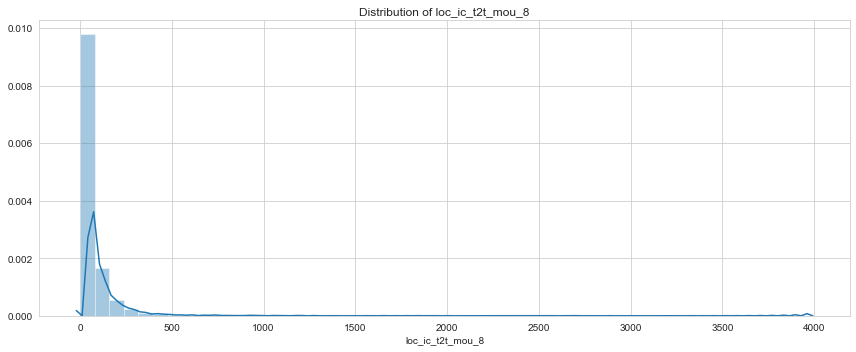

count    18584.000000
mean       161.571311
std        225.447352
min          0.000000
25%         36.252500
50%         95.940000
75%        203.740000
max       4450.740000
Name: loc_ic_t2m_mou_6, dtype: float64


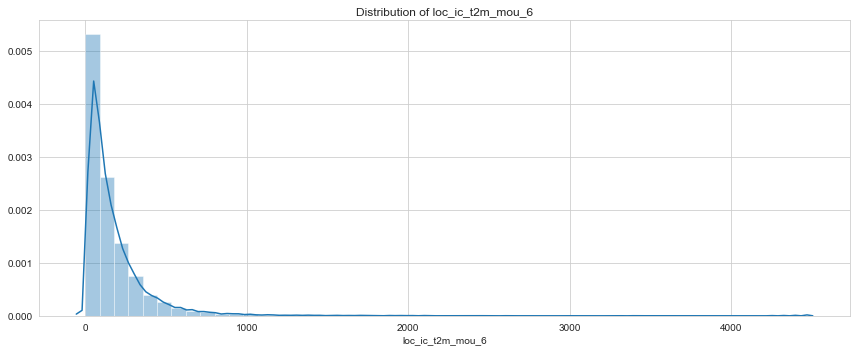

count    18584.000000
mean       161.805574
std        215.278845
min          0.000000
25%         40.160000
50%         99.160000
75%        204.817500
max       4388.730000
Name: loc_ic_t2m_mou_7, dtype: float64


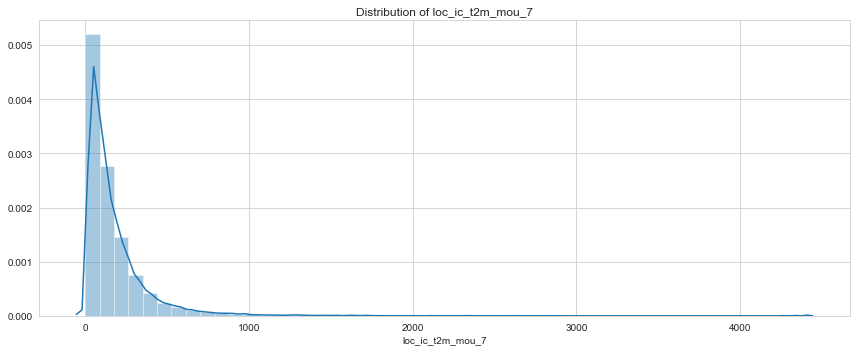

count    18584.000000
mean       157.258301
std        217.839403
min          0.000000
25%         36.430000
50%         94.760000
75%        196.922500
max       5738.460000
Name: loc_ic_t2m_mou_8, dtype: float64


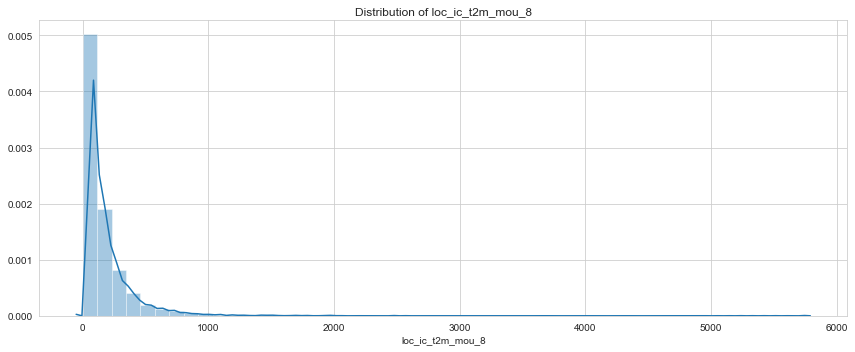

count    18584.000000
mean        15.469462
std         45.517857
min          0.000000
25%          0.000000
50%          2.090000
75%         12.490000
max       1678.410000
Name: loc_ic_t2f_mou_6, dtype: float64


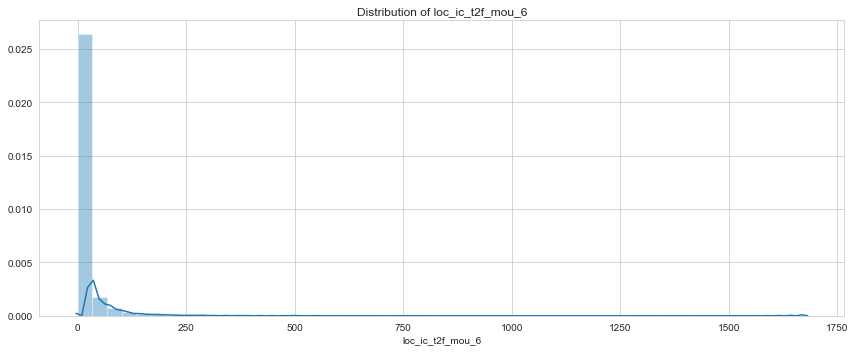

count    18584.000000
mean        16.228027
std         46.511783
min          0.000000
25%          0.000000
50%          2.340000
75%         12.890000
max       1393.110000
Name: loc_ic_t2f_mou_7, dtype: float64


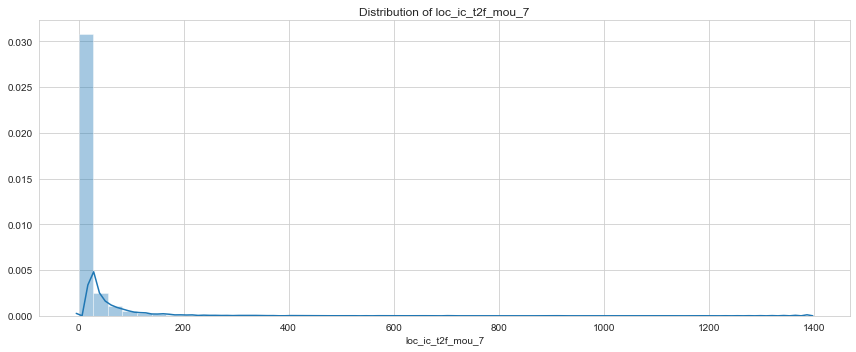

count    18584.000000
mean        14.743123
std         43.456412
min          0.000000
25%          0.000000
50%          2.160000
75%         11.610000
max       1459.690000
Name: loc_ic_t2f_mou_8, dtype: float64


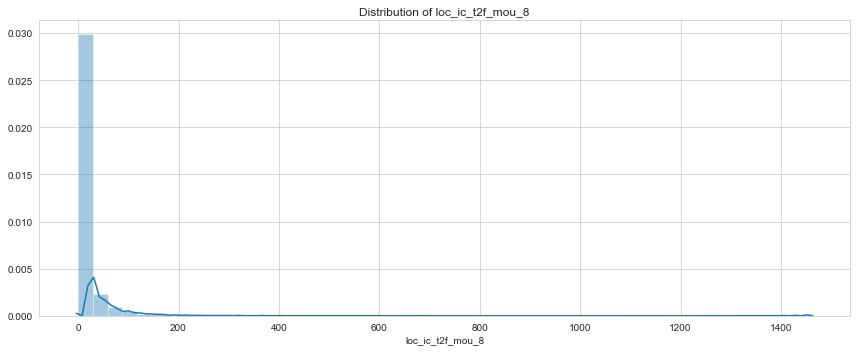

count    18584.000000
mean       246.968265
std        314.186368
min          0.000000
25%         60.875000
50%        154.080000
75%        317.840000
max       6496.110000
Name: loc_ic_mou_6, dtype: float64


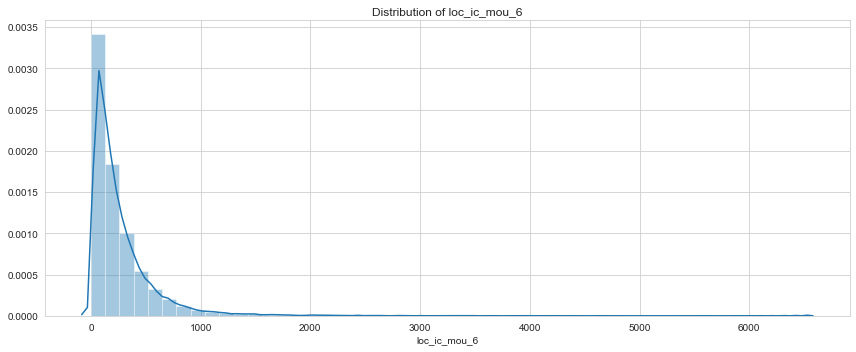

count    18584.000000
mean       249.695659
std        312.191023
min          0.000000
25%         66.787500
50%        157.930000
75%        318.150000
max       5382.080000
Name: loc_ic_mou_7, dtype: float64


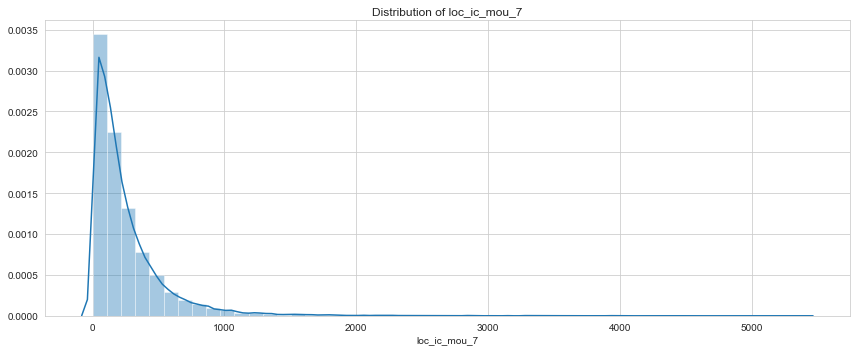

count    18584.000000
mean       239.738661
std        304.702480
min          0.000000
25%         60.555000
50%        151.210000
75%        302.927500
max       5748.810000
Name: loc_ic_mou_8, dtype: float64


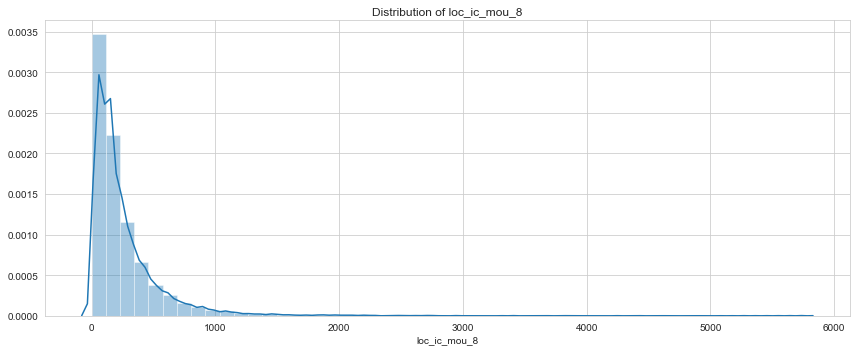

count    18584.000000
mean        16.106616
std         76.292797
min          0.000000
25%          0.000000
50%          1.050000
75%         10.015000
max       3038.340000
Name: std_ic_t2t_mou_6, dtype: float64


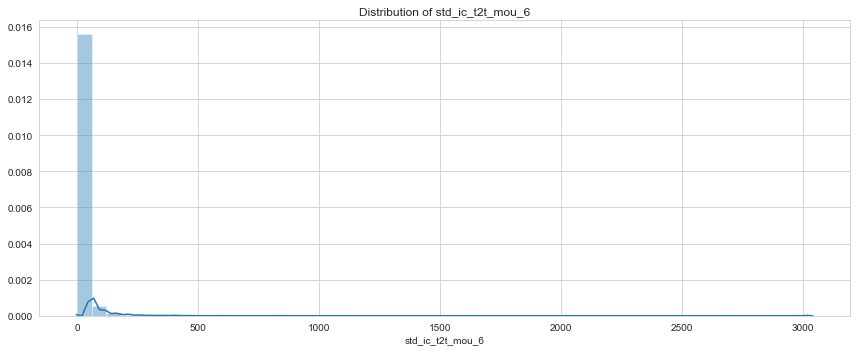

count    18584.000000
mean        16.426537
std         74.320273
min          0.000000
25%          0.000000
50%          1.250000
75%         10.780000
max       4235.340000
Name: std_ic_t2t_mou_7, dtype: float64


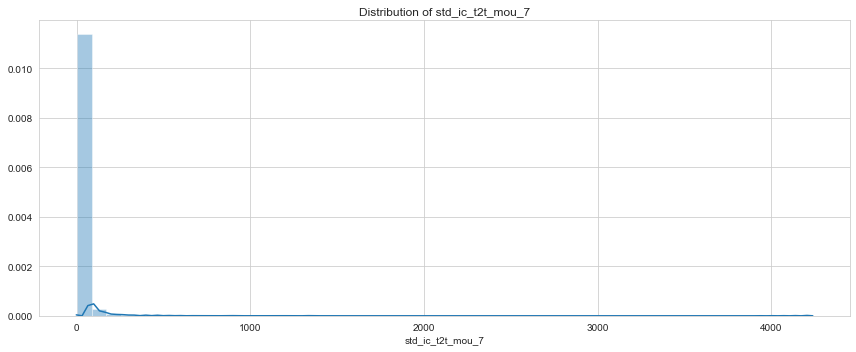

count    18584.000000
mean        15.049112
std         73.379477
min          0.000000
25%          0.000000
50%          0.760000
75%          8.740000
max       3423.390000
Name: std_ic_t2t_mou_8, dtype: float64


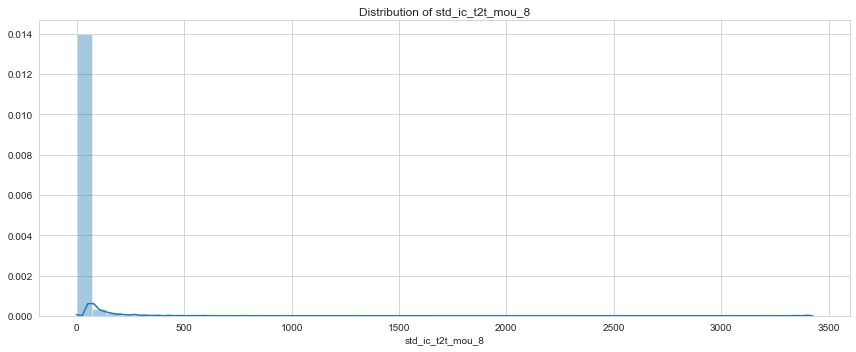

count    18584.000000
mean        32.061663
std        103.289340
min          0.000000
25%          0.610000
50%          7.210000
75%         27.060000
max       4630.230000
Name: std_ic_t2m_mou_6, dtype: float64


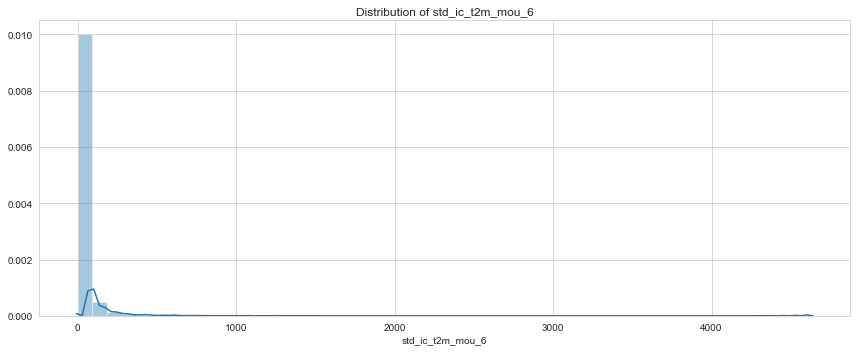

count    18584.000000
mean        33.294840
std        105.907155
min          0.000000
25%          0.647500
50%          7.710000
75%         28.560000
max       3470.380000
Name: std_ic_t2m_mou_7, dtype: float64


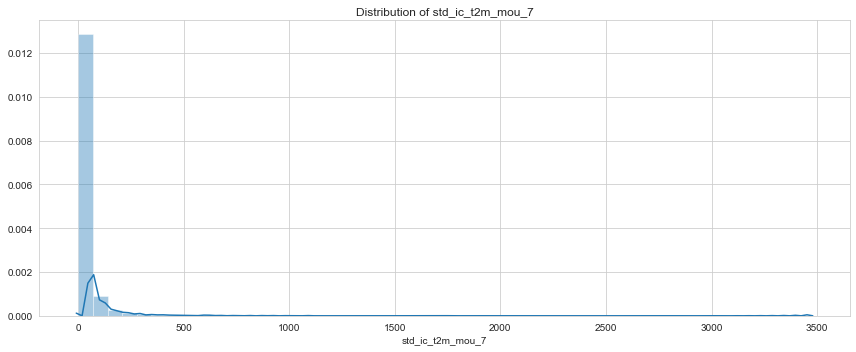

count    18584.000000
mean        30.612376
std        107.690700
min          0.000000
25%          0.325000
50%          6.490000
75%         25.345000
max       5645.860000
Name: std_ic_t2m_mou_8, dtype: float64


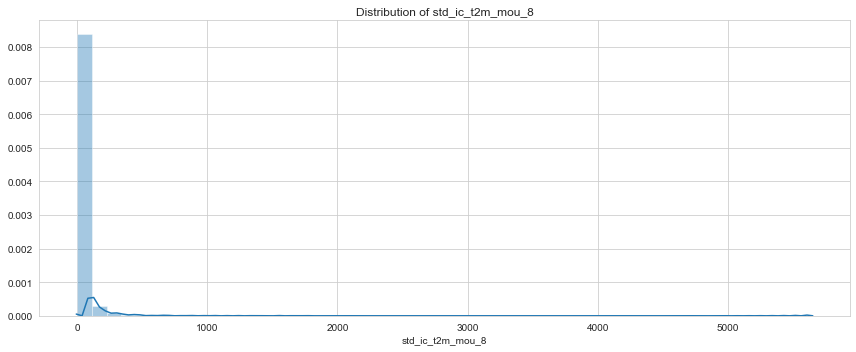

count    18584.000000
mean         2.740680
std         18.257209
min          0.000000
25%          0.000000
50%          0.000000
75%          0.160000
max       1069.980000
Name: std_ic_t2f_mou_6, dtype: float64


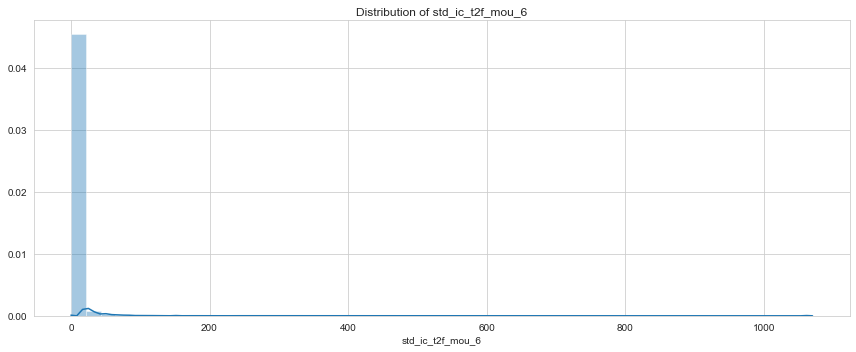

count    18584.000000
mean         2.912533
std         19.748936
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max       1136.080000
Name: std_ic_t2f_mou_7, dtype: float64


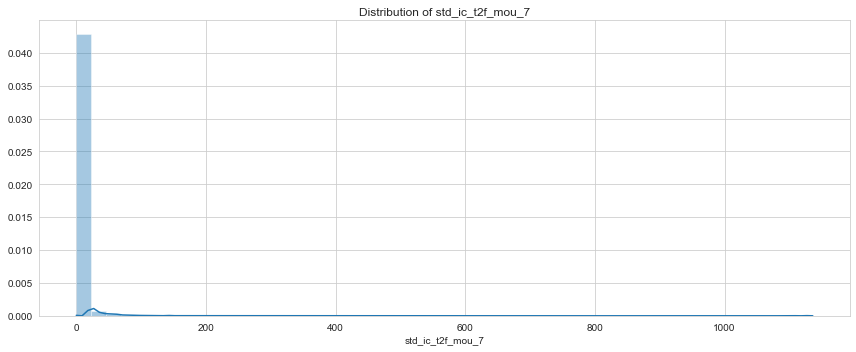

count    18584.000000
mean         2.654877
std         20.236822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max       1201.180000
Name: std_ic_t2f_mou_8, dtype: float64


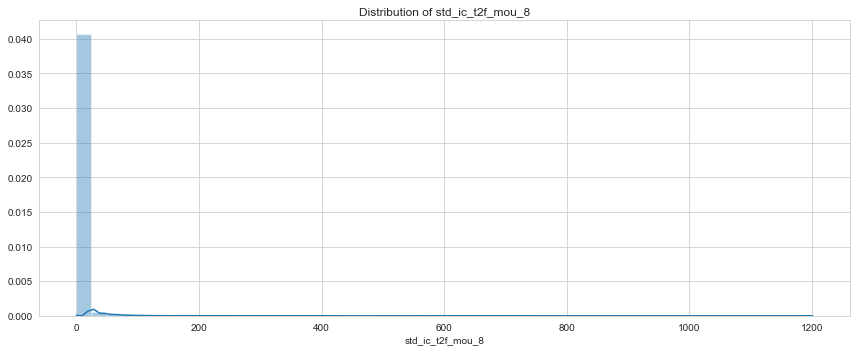

count    18584.000000
mean        50.985096
std        140.434736
min          0.000000
25%          2.910000
50%         15.210000
75%         46.310000
max       4840.330000
Name: std_ic_mou_6, dtype: float64


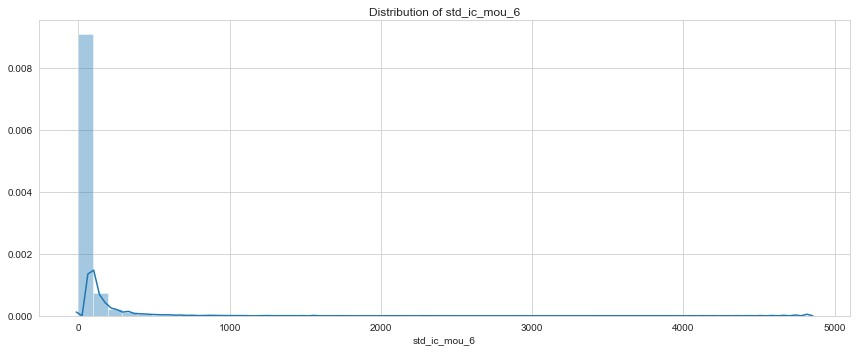

count    18584.000000
mean        52.714998
std        141.095657
min          0.000000
25%          3.130000
50%         16.380000
75%         49.245000
max       4323.530000
Name: std_ic_mou_7, dtype: float64


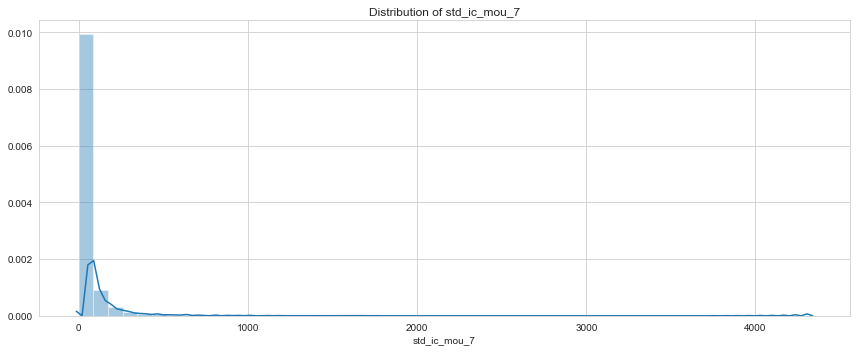

count    18584.000000
mean        48.522086
std        143.534370
min          0.000000
25%          2.260000
50%         13.580000
75%         43.082500
max       5957.140000
Name: std_ic_mou_8, dtype: float64


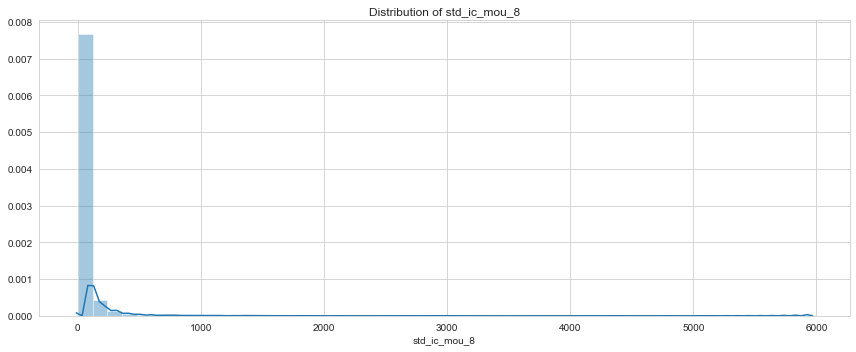

count    18584.000000
mean       308.462453
std        361.567274
min          0.000000
25%         90.290000
50%        205.250000
75%        396.867500
max       6798.640000
Name: total_ic_mou_6, dtype: float64


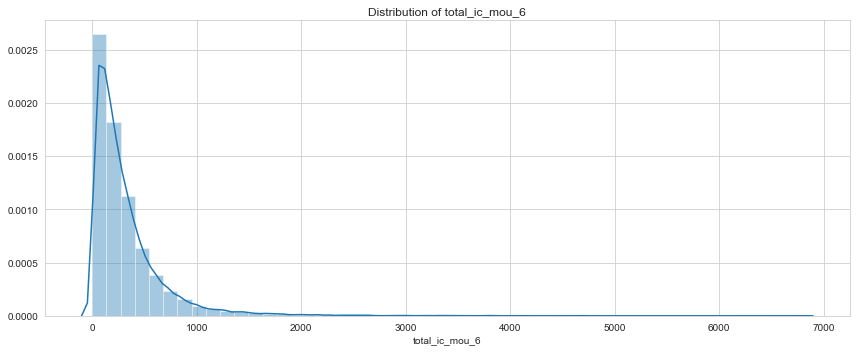

count    18584.000000
mean       314.110924
std        362.779532
min          0.000000
25%         99.220000
50%        211.300000
75%        397.550000
max       5548.190000
Name: total_ic_mou_7, dtype: float64


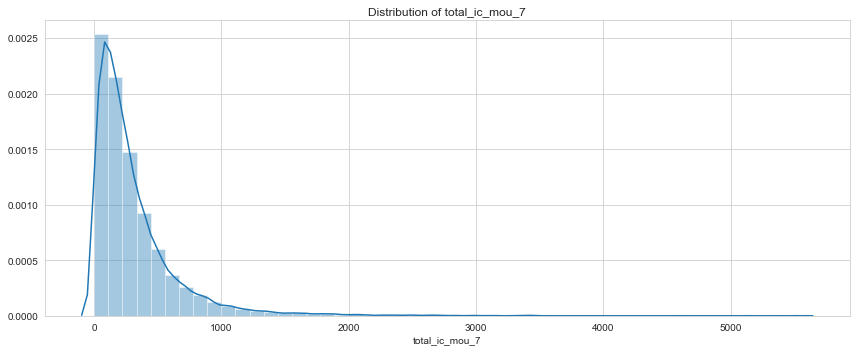

count    18584.000000
mean       295.753628
std        360.532424
min          0.000000
25%         79.640000
50%        194.535000
75%        380.830000
max       5990.710000
Name: total_ic_mou_8, dtype: float64


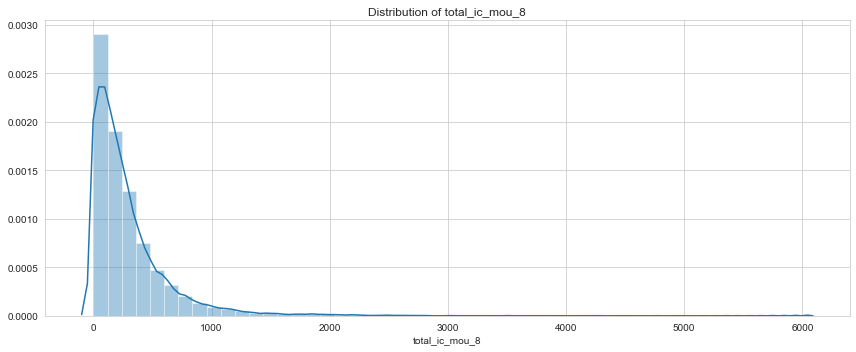

count    18584.000000
mean         0.066604
std          0.210639
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.760000
Name: spl_ic_mou_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


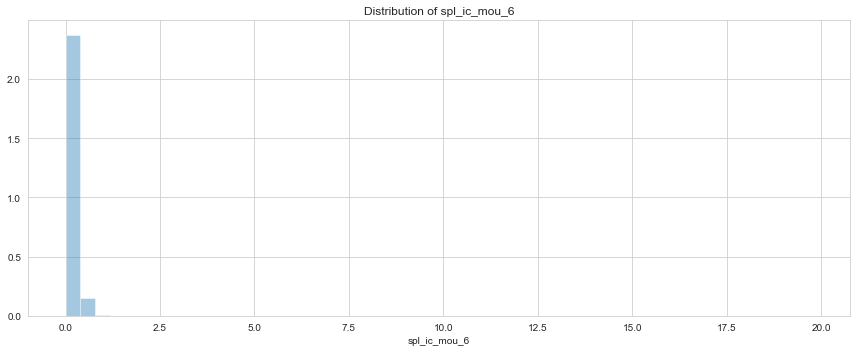

count    18584.000000
mean         0.018772
std          0.216182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.330000
Name: spl_ic_mou_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


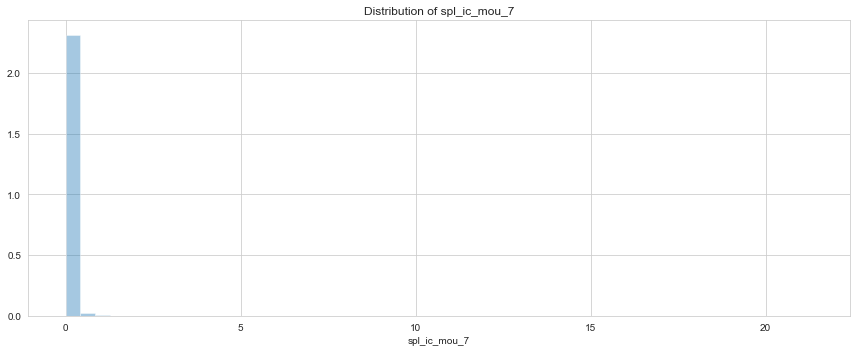

count    18584.000000
mean         0.027071
std          0.119198
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.230000
Name: spl_ic_mou_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


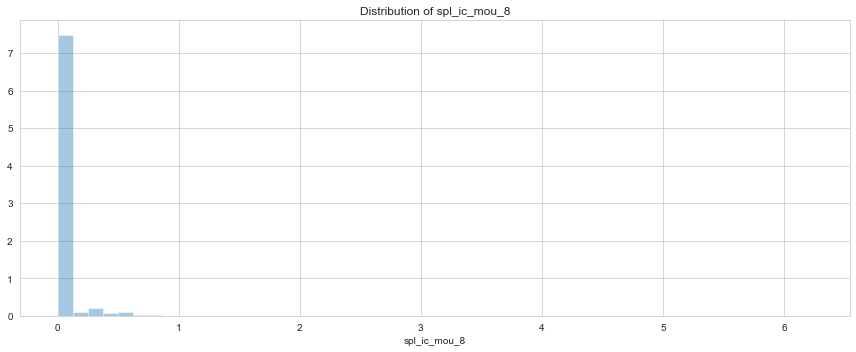

count    18584.000000
mean        11.107904
std         62.383717
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1767.390000
Name: isd_ic_mou_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


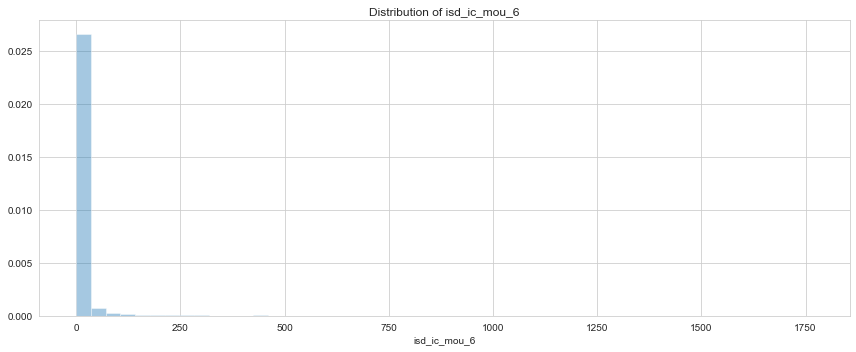

count    18584.000000
mean        12.065438
std         69.356306
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2631.340000
Name: isd_ic_mou_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


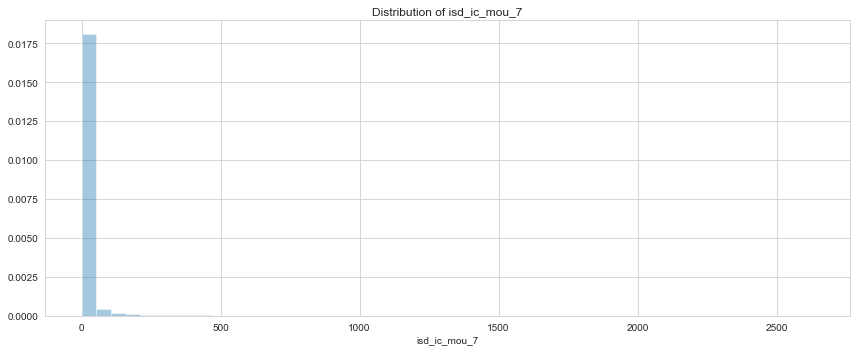

count    18584.000000
mean        11.504884
std         67.708230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2204.080000
Name: isd_ic_mou_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


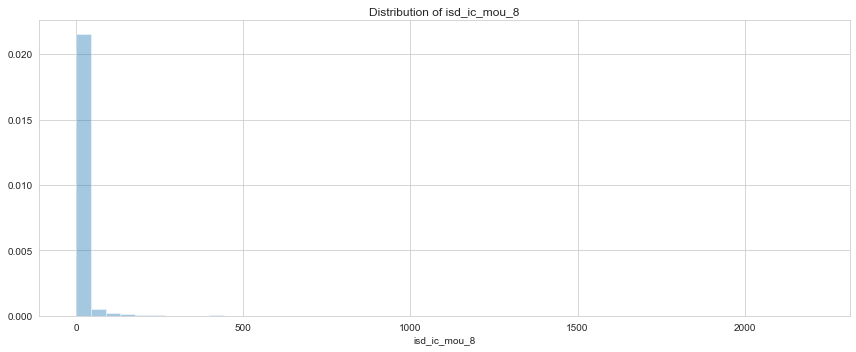

count    18584.000000
mean         1.084033
std         12.798476
min          0.000000
25%          0.000000
50%          0.000000
75%          0.060000
max       1344.140000
Name: ic_others_6, dtype: float64


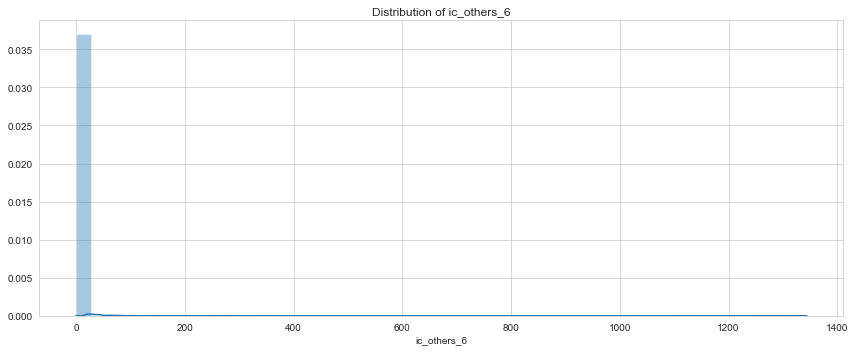

count    18584.000000
mean         1.418243
std         16.353114
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1495.940000
Name: ic_others_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


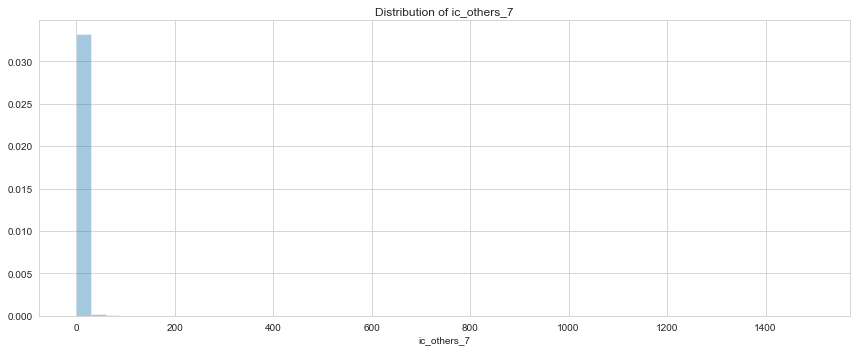

count    18584.000000
mean         1.211492
std         13.653831
min          0.000000
25%          0.000000
50%          0.000000
75%          0.050000
max       1209.860000
Name: ic_others_8, dtype: float64


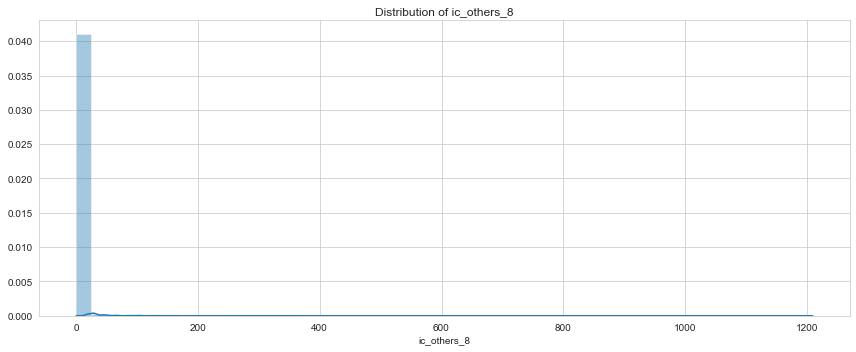

count    18584.000000
mean        12.098741
std          9.596615
min          0.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        307.000000
Name: total_rech_num_6, dtype: float64


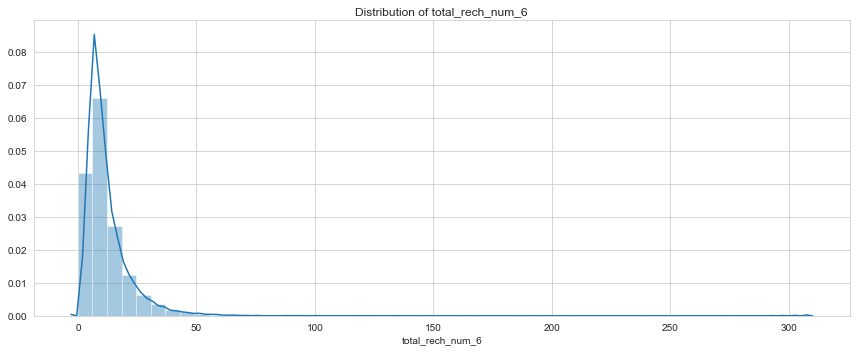

count    18584.000000
mean        11.885385
std          9.597013
min          0.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        138.000000
Name: total_rech_num_7, dtype: float64


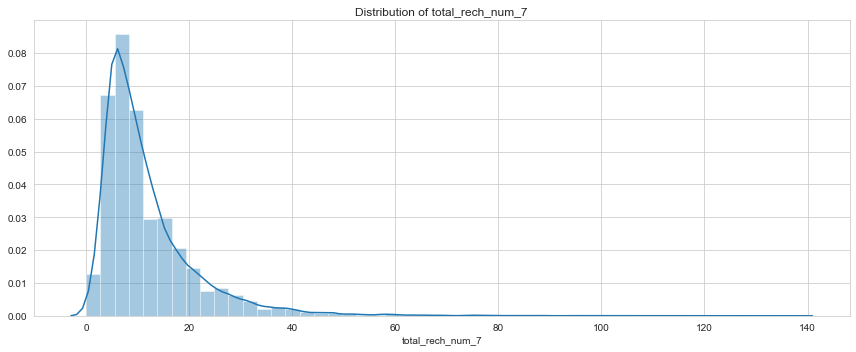

count    18584.000000
mean        10.226485
std          9.541131
min          0.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        196.000000
Name: total_rech_num_8, dtype: float64


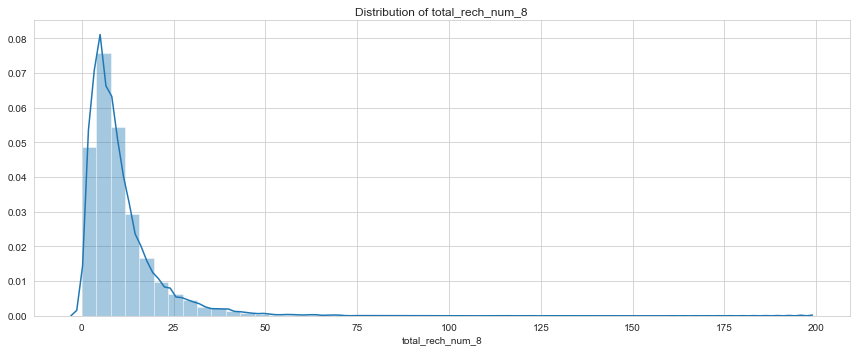

count    18584.000000
mean       696.362785
std        561.292089
min          0.000000
25%        432.000000
50%        583.000000
75%        835.000000
max      35190.000000
Name: total_rech_amt_6, dtype: float64


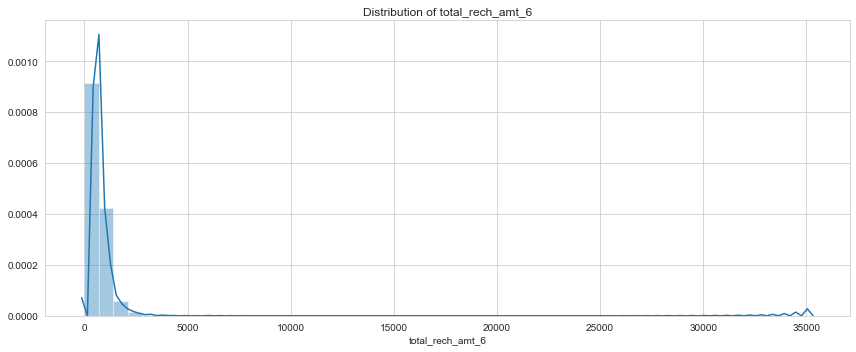

count    18584.000000
mean       691.088947
std        576.255756
min          0.000000
25%        425.000000
50%        579.000000
75%        830.000000
max      40335.000000
Name: total_rech_amt_7, dtype: float64


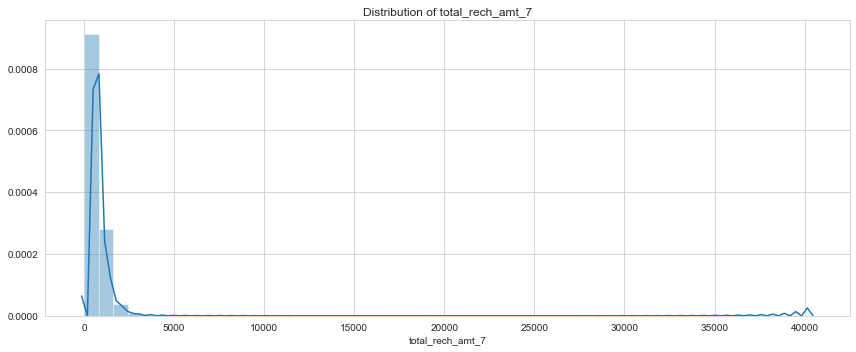

count    18584.00000
mean       611.97401
std        618.40943
min          0.00000
25%        308.00000
50%        520.00000
75%        790.00000
max      45320.00000
Name: total_rech_amt_8, dtype: float64


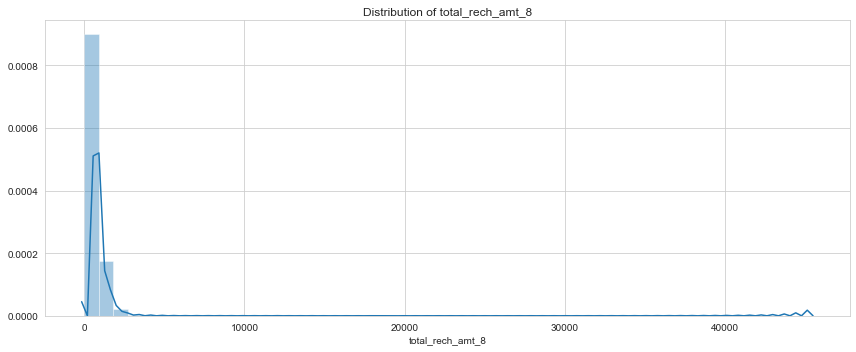

count    18584.00000
mean       171.89943
std        176.62710
min          0.00000
25%        110.00000
50%        120.00000
75%        200.00000
max       3350.00000
Name: max_rech_amt_6, dtype: float64


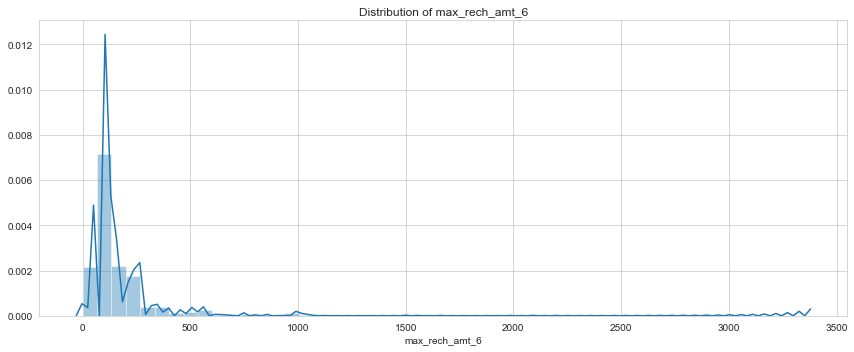

count    18584.000000
mean       174.568876
std        181.428298
min          0.000000
25%        110.000000
50%        128.000000
75%        200.000000
max       4010.000000
Name: max_rech_amt_7, dtype: float64


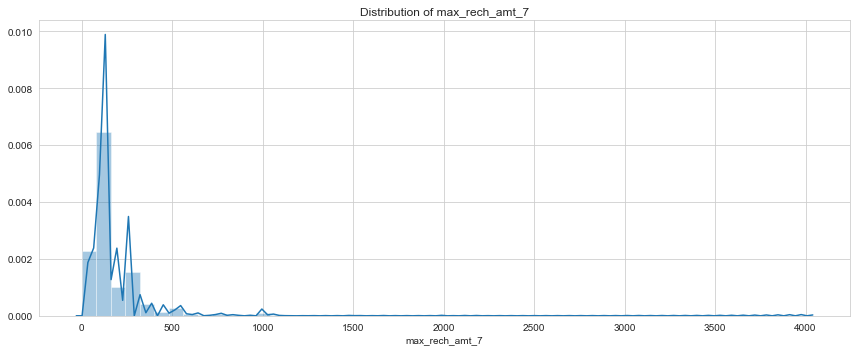

count    18584.00000
mean       162.10170
std        171.54089
min          0.00000
25%         67.00000
50%        130.00000
75%        198.00000
max       4449.00000
Name: max_rech_amt_8, dtype: float64


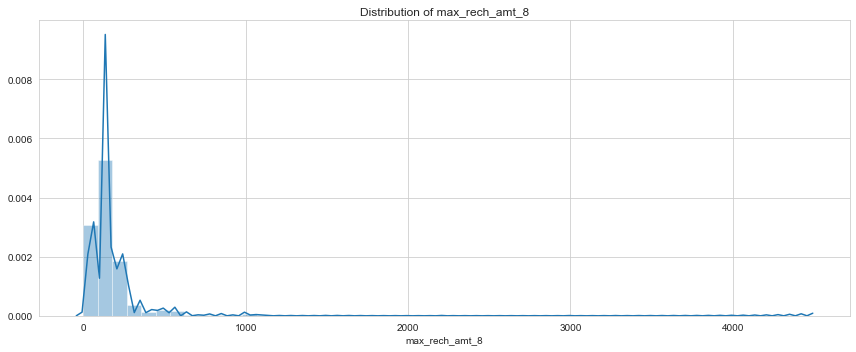

count    18584.000000
mean       104.529703
std        145.932705
min          0.000000
25%         30.000000
50%        110.000000
75%        120.000000
max       3350.000000
Name: last_day_rch_amt_6, dtype: float64


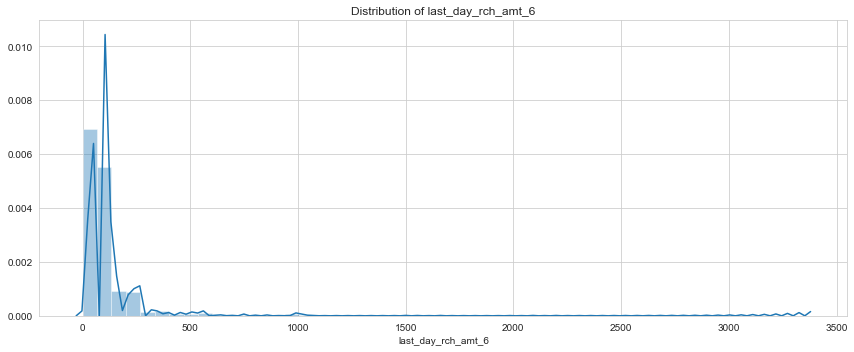

count    18584.000000
mean       103.946136
std        138.880174
min          0.000000
25%         26.000000
50%         86.000000
75%        130.000000
max       4010.000000
Name: last_day_rch_amt_7, dtype: float64


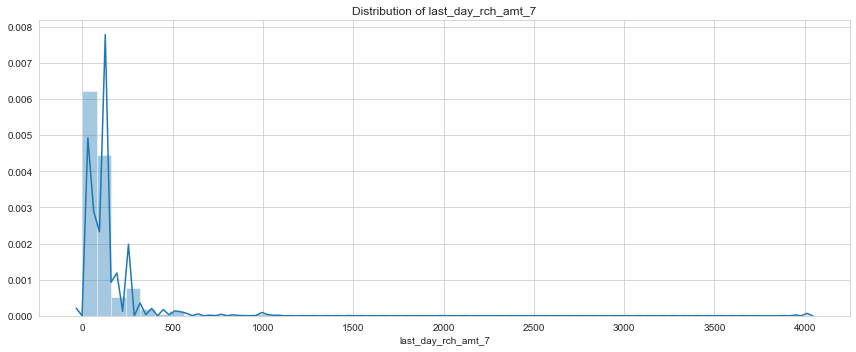

count    18584.000000
mean        94.860202
std        143.603542
min          0.000000
25%          0.000000
50%         50.000000
75%        130.000000
max       4449.000000
Name: last_day_rch_amt_8, dtype: float64


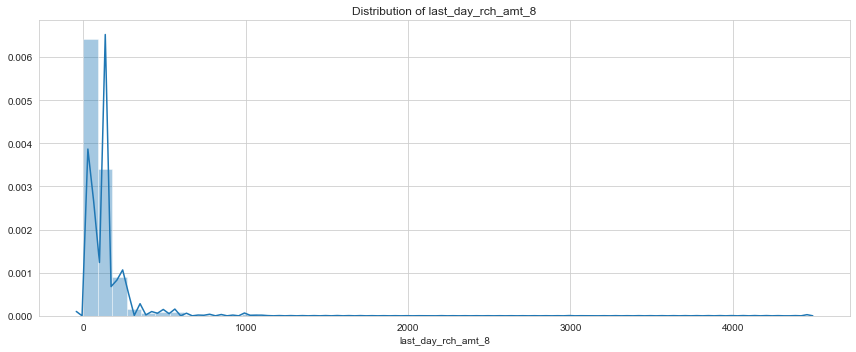

count    18584.000000
mean        79.468601
std        278.252555
min          0.000000
25%          0.000000
50%          0.000000
75%         15.480000
max      10285.900000
Name: vol_2g_mb_6, dtype: float64


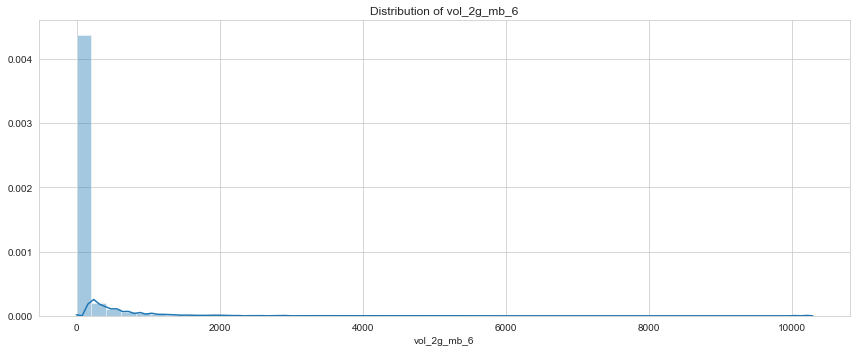

count    18584.000000
mean        77.945146
std        280.097921
min          0.000000
25%          0.000000
50%          0.000000
75%         15.960000
max       7873.550000
Name: vol_2g_mb_7, dtype: float64


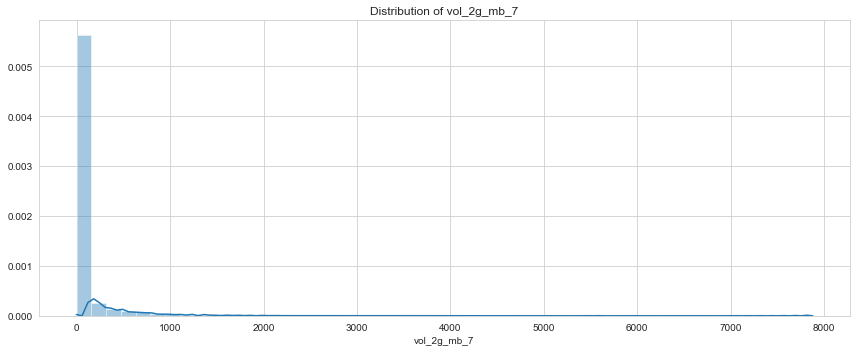

count    18584.000000
mean        69.995792
std        279.534130
min          0.000000
25%          0.000000
50%          0.000000
75%         10.017500
max      11117.610000
Name: vol_2g_mb_8, dtype: float64


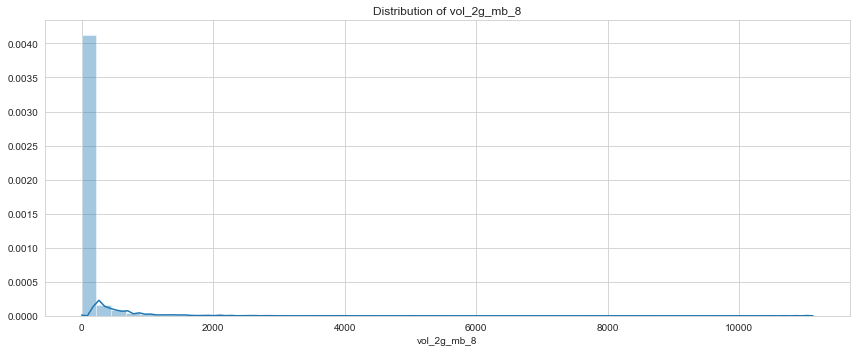

count    18584.000000
mean       259.536747
std        916.238139
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45735.400000
Name: vol_3g_mb_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


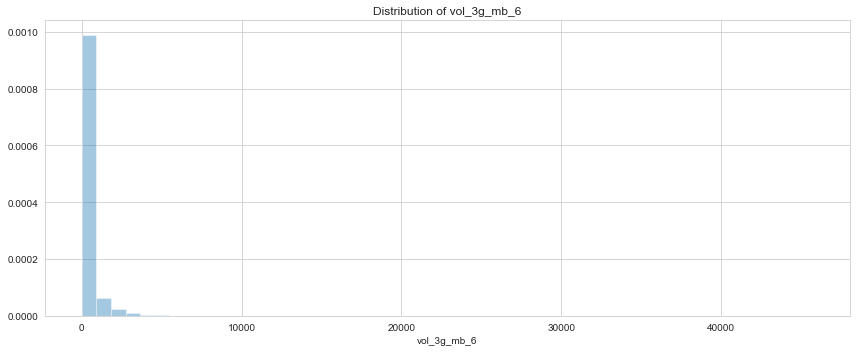

count    18584.000000
mean       275.991767
std        833.569918
min          0.000000
25%          0.000000
50%          0.000000
75%          0.110000
max      27600.290000
Name: vol_3g_mb_7, dtype: float64


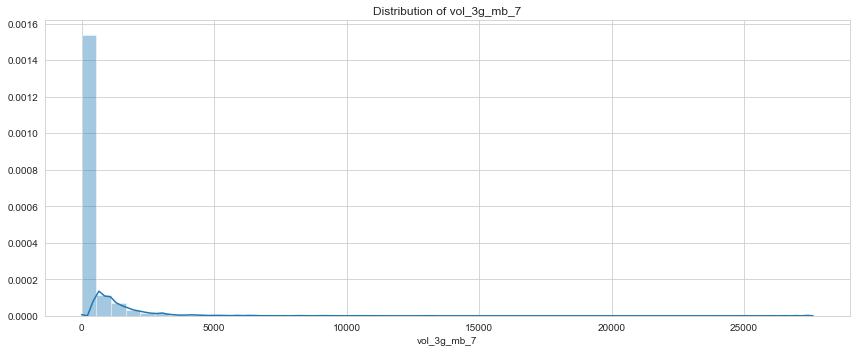

count    18584.000000
mean       267.845482
std        861.304048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      30036.060000
Name: vol_3g_mb_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


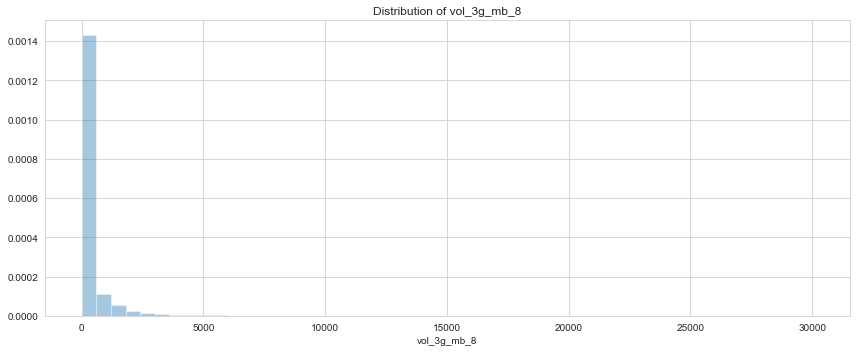

count    18584.000000
mean         0.125000
std          0.373374
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: monthly_2g_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


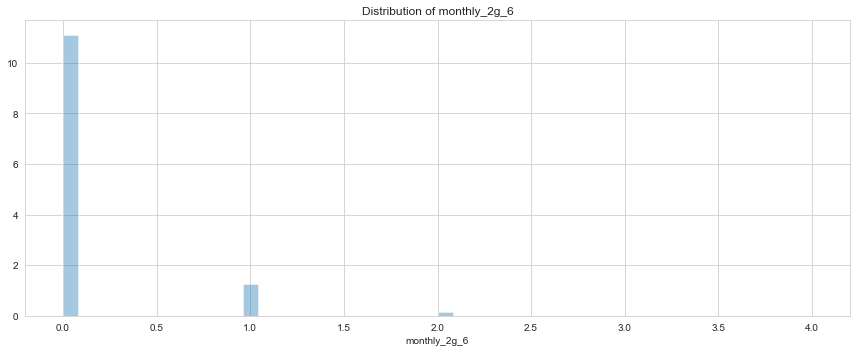

count    18584.000000
mean         0.130435
std          0.388434
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: monthly_2g_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


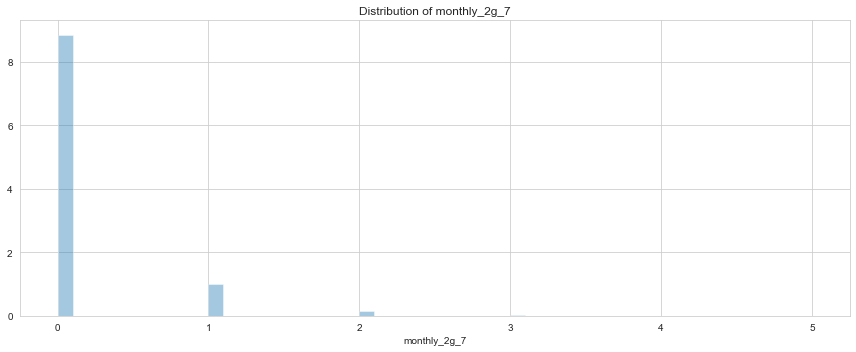

count    18584.000000
mean         0.115153
std          0.360688
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: monthly_2g_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


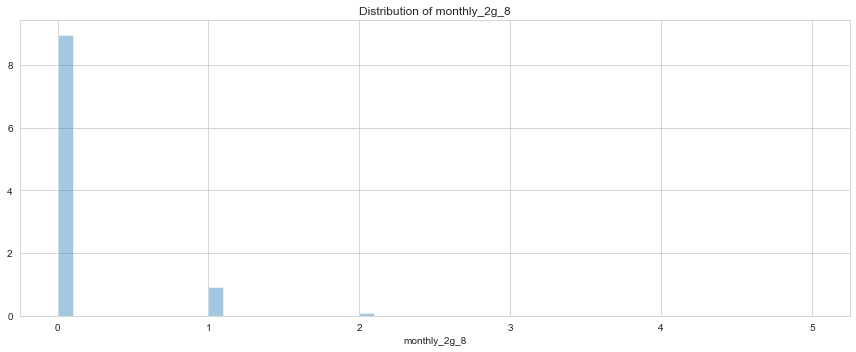

count    18584.000000
mean         0.512538
std          1.723300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         39.000000
Name: sachet_2g_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


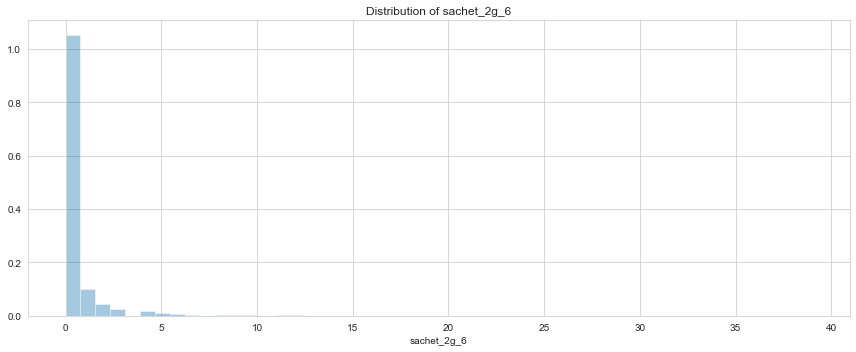

count    18584.000000
mean         0.593629
std          1.880134
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: sachet_2g_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


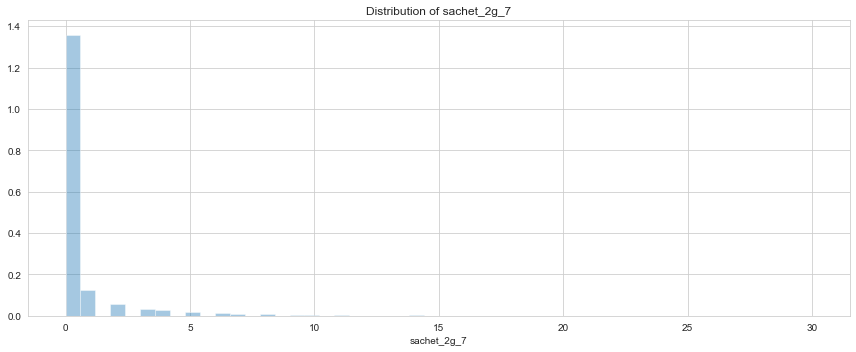

count    18584.000000
mean         0.616552
std          1.878193
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: sachet_2g_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


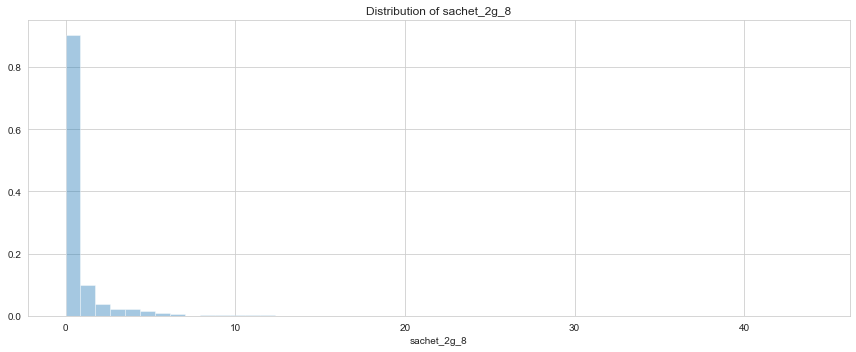

count    18584.000000
mean         0.169931
std          0.565533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: monthly_3g_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


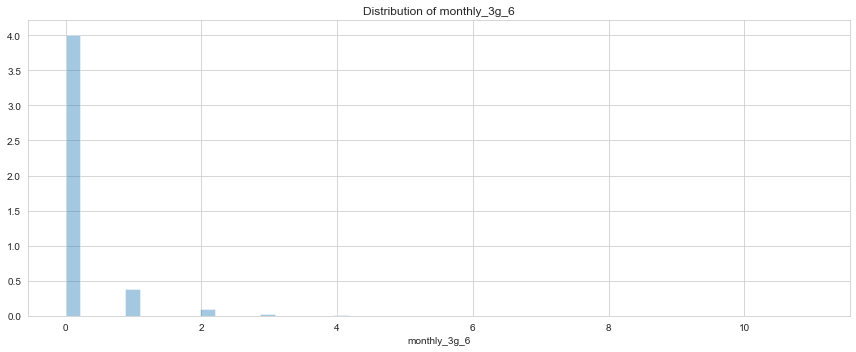

count    18584.000000
mean         0.182953
std          0.601884
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: monthly_3g_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


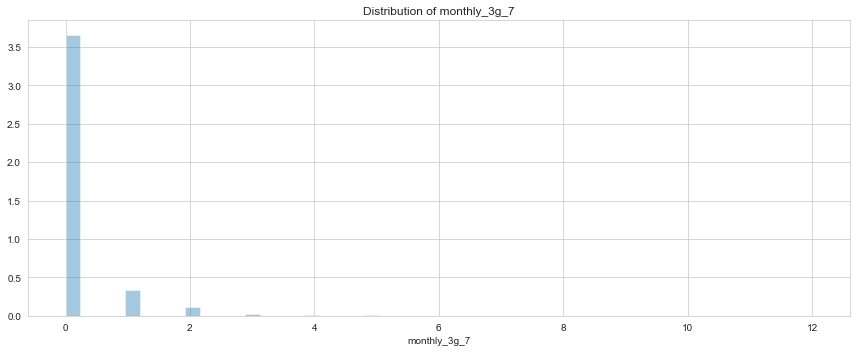

count    18584.000000
mean         0.168263
std          0.558519
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: monthly_3g_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


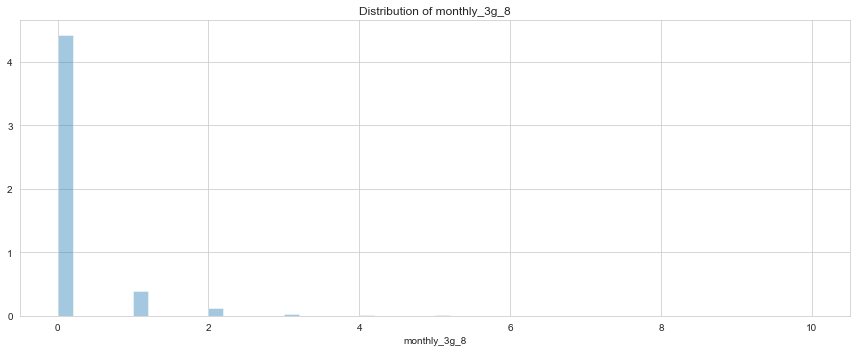

count    18584.000000
mean         0.136623
std          0.879922
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: sachet_3g_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


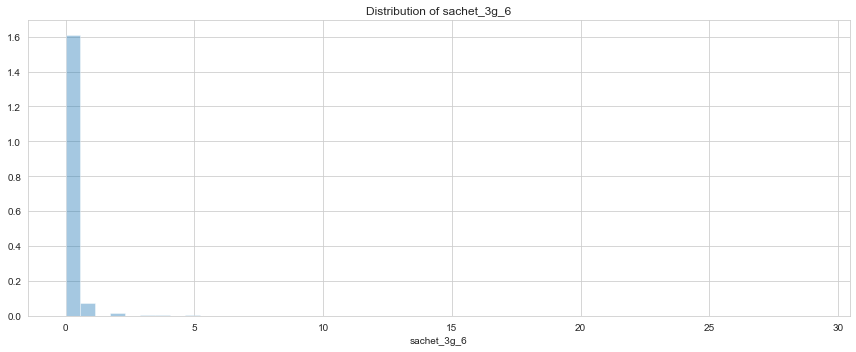

count    18584.000000
mean         0.145771
std          0.960897
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: sachet_3g_7, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


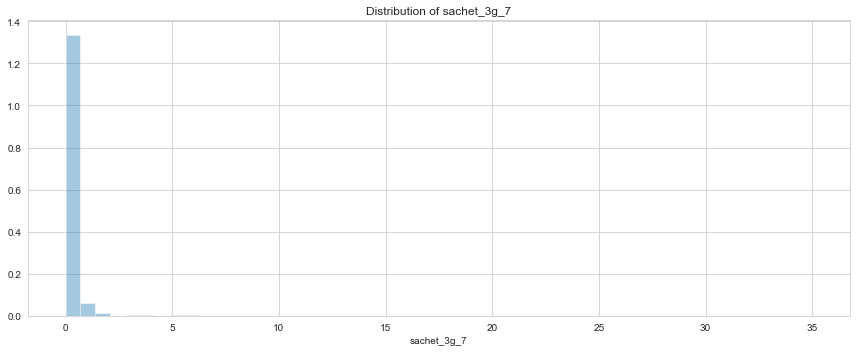

count    18584.000000
mean         0.144156
std          0.979607
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         38.000000
Name: sachet_3g_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


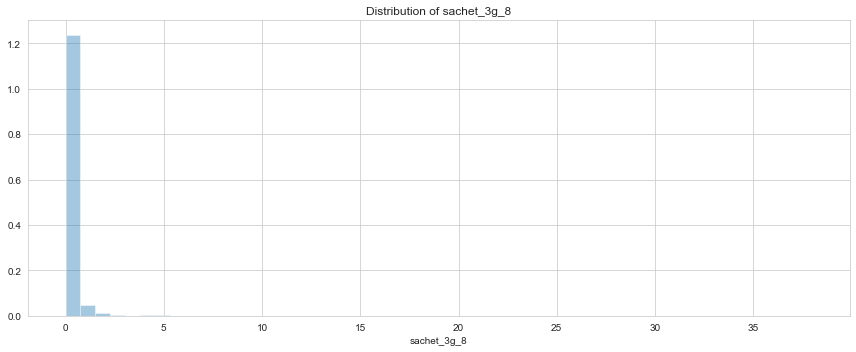

count    18584.000000
mean      1261.839432
std        971.507898
min        180.000000
25%        481.000000
50%        914.000000
75%       1908.000000
max       4321.000000
Name: aon, dtype: float64


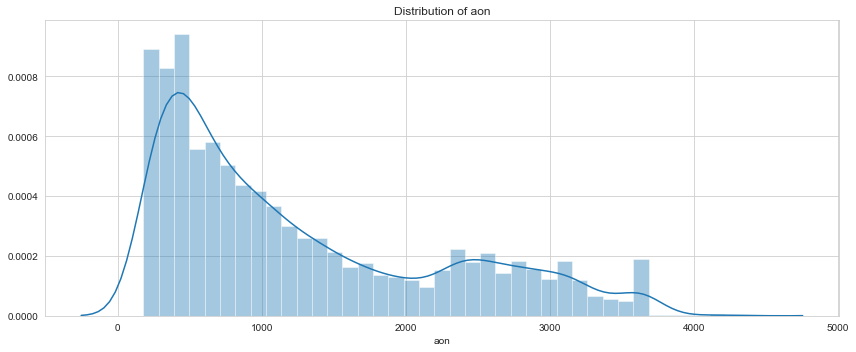

count    18584.000000
mean       128.307233
std        378.845975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max       6757.970000
Name: aug_vbc_3g, dtype: float64


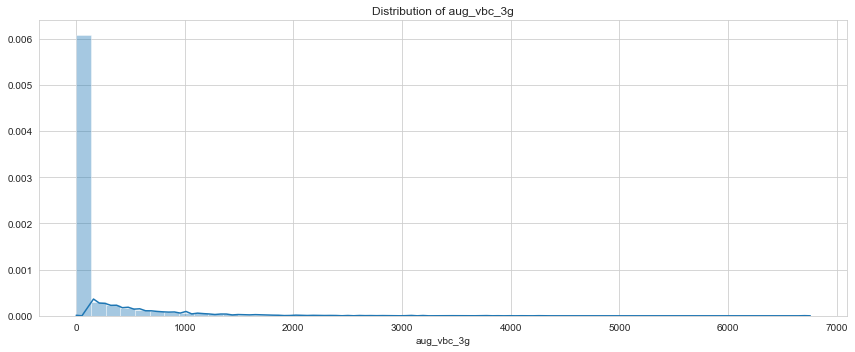

count    18584.000000
mean       134.323709
std        397.349864
min          0.000000
25%          0.000000
50%          0.000000
75%          1.040000
max       7237.780000
Name: jul_vbc_3g, dtype: float64


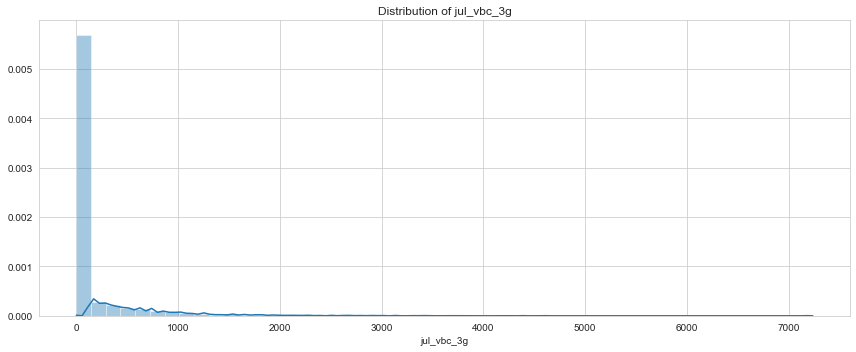

count    18584.000000
mean       119.828088
std        387.848379
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      11166.210000
Name: jun_vbc_3g, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


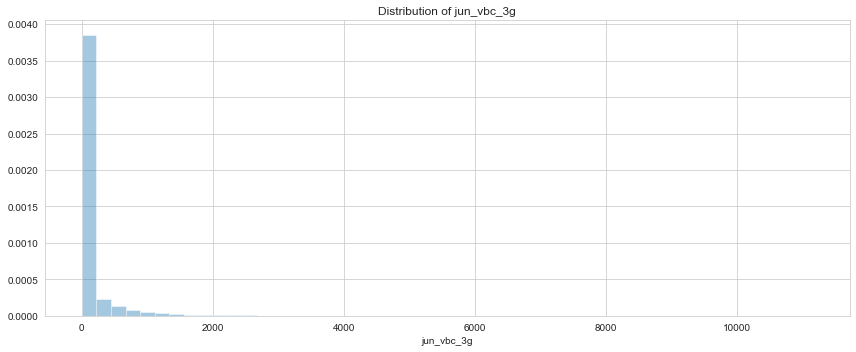

count    18584.000000
mean         6.445493
std         48.717270
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2618.570000
Name: sep_vbc_3g, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


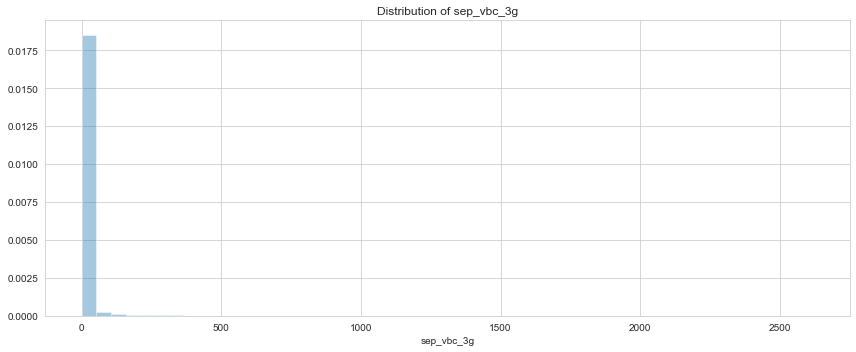

count    18584.000000
mean       693.725866
std        511.710881
min        368.000000
25%        450.000000
50%        567.000000
75%        791.500000
max      37762.500000
Name: average_rech_amt, dtype: float64


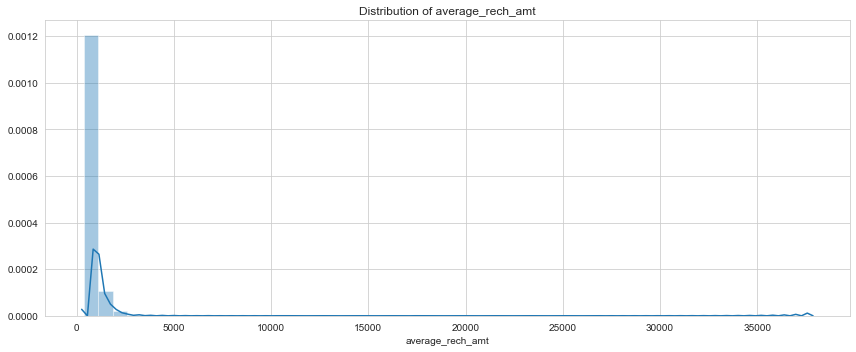

In [72]:
numeric_distribution_plot(df_70)

In [73]:
df_70.drop(['loc_og_t2o_mou','loc_ic_t2o_mou','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6',
            'roam_og_mou_7','roam_og_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_6',
            'std_og_t2f_mou_7','std_og_t2f_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','og_others_6',
            'og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7',
            'isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','monthly_2g_6','monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6',
            'sachet_3g_7','sachet_3g_8'], axis = 1, inplace =True)

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
quality_report(df_70)

Total NaN  Percent of NaN  Nunique    Dtype
average_rech_amt            0             0.0     2612  float64
loc_og_mou_7                0             0.0    14030  float64
std_og_t2t_mou_6            0             0.0     8663  float64
std_og_t2t_mou_7            0             0.0     8825  float64
std_og_t2t_mou_8            0             0.0     8024  float64
std_og_t2m_mou_6            0             0.0    10062  float64
std_og_t2m_mou_7            0             0.0    10190  float64
std_og_t2m_mou_8            0             0.0     9317  float64
std_og_t2f_mou_6            0             0.0     1301  float64
std_og_mou_6                0             0.0    12239  float64
std_og_mou_7                0             0.0    12343  float64
std_og_mou_8                0             0.0    11315  float64
spl_og_mou_6                0             0.0     2499  float64
spl_og_mou_7                0             0.0     2753  float64
spl_og_mou_8                0             0.0     2635  float64
total_og_mou_6              0             0.0    16194  float64
total_og_mou_7              0             0.0    16303  float64
total_og_mou_8              0             0.0    15544  float64
loc_ic_t2t_mou_6            0             0.0     7793  float64
loc_ic_t2t_mou_7            0             0.0     7859  float64
loc_ic_t2t_mou_8            0             0.0     7604  float64
loc_og_mou_8                0             0.0    13300  float64
loc_og_mou_6                0             0.0    13834  float64
loc_ic_t2m_mou_7            0             0.0    11942  float64
loc_og_t2c_mou_8            0             0.0     1410  float64
std_og_t2o_mou              0             0.0        1  float64
arpu_6                      0             0.0    18226  float64
arpu_7                      0             0.0    18245  float64
arpu_8                      0             0.0    17705  float64
onnet_mou_6                 0             0.0    13272  float64
onnet_mou_7                 0             0.0    13402  float64
onnet_mou_8                 0             0.0    12446  float64
offnet_mou_6                0             0.0    15307  float64
offnet_mou_7                0             0.0    15447  float64
offnet_mou_8                0             0.0    14693  float64
loc_og_t2t_mou_6            0             0.0     8593  float64
loc_og_t2t_mou_7            0             0.0     8574  float64
loc_og_t2t_mou_8            0             0.0     8260  float64
loc_og_t2m_mou_6            0             0.0    12288  float64
loc_og_t2m_mou_7            0             0.0    12406  float64
loc_og_t2m_mou_8            0             0.0    11803  float64
loc_og_t2f_mou_6            0             0.0     2601  float64
loc_og_t2f_mou_7            0             0.0     2614  float64
loc_og_t2f_mou_8            0             0.0     2511  float64
loc_ic_t2m_mou_6            0             0.0    11891  float64
loc_ic_t2m_mou_8            0             0.0    11516  float64
sep_vbc_3g                  0             0.0     1422  float64
total_rech_num_7            0             0.0       97    int64
total_rech_amt_6            0             0.0     1983    int64
total_rech_amt_7            0             0.0     1973    int64
total_rech_amt_8            0             0.0     2027    int64
max_rech_amt_6              0             0.0      156    int64
max_rech_amt_7              0             0.0      142    int64
max_rech_amt_8              0             0.0      170    int64
last_day_rch_amt_6          0             0.0      149    int64
last_day_rch_amt_7          0             0.0      136    int64
last_day_rch_amt_8          0             0.0      164    int64
vol_2g_mb_6                 0             0.0     5204  float64
vol_2g_mb_7                 0             0.0     5237  float64
vol_2g_mb_8                 0             0.0     4900  float64
vol_3g_mb_6                 0             0.0     4351  float64
vol_3g_mb_7                 0             0.0     46

In [75]:
df_70.shape

(18584, 91)

In [76]:
df_70.describe()

mobile_number  std_og_t2o_mou        arpu_6       arpu_7        arpu_8  \
count   1.858400e+04         18584.0  18584.000000  18584.00000  18584.000000   
mean    7.001221e+09             0.0    585.865119    585.16281    532.705046   
std     6.858743e+05             0.0    454.976718    472.40926    499.047339   
min     7.000000e+09             0.0  -2041.228000  -2014.04500   -945.808000   
25%     7.000635e+09             0.0    364.306000    363.28475    289.311750   
50%     7.001231e+09             0.0    493.420500    491.94250    452.051000   
75%     7.001812e+09             0.0    700.223500    696.04400    671.284000   
max     7.002411e+09             0.0  27731.088000  35145.83400  33543.624000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  18584.000000  18584.000000  18584.000000  18584.000000  18584.000000   
mean     294.020278    302.083024    267.822546    421.736141    426.902264   
std      451.938343    477.310771    464.259778    475.942214    490.661583   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.410000     43.582500     34.352500    142.720000    142.870000   
50%      127.830000    127.760000    105.810000    286.580000    286.280000   
75%      350.152500    354.865000    293.597500    522.032500    530.172500   
max     6504.340000   8157.780000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count  18584.000000      18584.000000      18584.000000      18584.000000   
mean     385.381479         95.186197         95.833235         88.192524   
std      476.525713        234.708723        244.611116        238.378818   
min        0.000000          0.000000          0.000000          0.000000   
25%      112.717500          9.075000         10.180000          7.840000   
50%      252.130000         33.730000         34.380000         31.230000   
75%      482.732500         92.495000         91.937500         85.687500   
max    13547.840000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      18584.000000      18584.000000      18584.000000      18584.000000   
mean         184.400218        183.650784        172.627229          6.843709   
std          252.141801        240.097085        235.254953         19.730398   
min            0.000000          0.000000          0.000000          0.000000   
25%           32.860000         36.255000         28.930000          0.000000   
50%          104.360000        107.260000         97.290000          0.400000   
75%          241.700000        241.215000        225.632500          5.230000   
max         4212.040000       4456.740000       4524.590000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_6  \
count      18584.000000      18584.000000      18584.000000  18584.000000   
mean           6.932276          6.403163          1.739092    286.778447   
std           19.269903         18.531787          7.731819    379.899081   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000     55.337500   
50%            0.460000          0.310000          0.000000    171.180000   
75%            5.230000          4.690000          0.030000    377.405000   
max          481.840000        539.080000        351.830000  10643.380000   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
count   18584.00000  18584.000000      18584.000000      18584.000000   
mean      286.78317    268.231663        186.792527        196.643087   
std       371.59897    367.052201        401.407730        424.687822   
min         0.00000      0.000000          0.000000          0.000000   
25%        61.58250     48.920000          0.000000          0.000000   
50%      

In [77]:
# df_70['loc_og_t2c_mou_8'].value_counts()

In [78]:
df_70.drop('std_og_t2o_mou', axis=1, inplace =True)

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
quality_report(df_70)

Total NaN  Percent of NaN  Nunique    Dtype
average_rech_amt            0             0.0     2612  float64
loc_og_mou_8                0             0.0    13300  float64
std_og_t2t_mou_7            0             0.0     8825  float64
std_og_t2t_mou_8            0             0.0     8024  float64
std_og_t2m_mou_6            0             0.0    10062  float64
std_og_t2m_mou_7            0             0.0    10190  float64
std_og_t2m_mou_8            0             0.0     9317  float64
std_og_t2f_mou_6            0             0.0     1301  float64
std_og_mou_6                0             0.0    12239  float64
std_og_mou_7                0             0.0    12343  float64
std_og_mou_8                0             0.0    11315  float64
spl_og_mou_6                0             0.0     2499  float64
spl_og_mou_7                0             0.0     2753  float64
spl_og_mou_8                0             0.0     2635  float64
total_og_mou_6              0             0.0    16194  float64
total_og_mou_7              0             0.0    16303  float64
total_og_mou_8              0             0.0    15544  float64
loc_ic_t2t_mou_6            0             0.0     7793  float64
loc_ic_t2t_mou_7            0             0.0     7859  float64
loc_ic_t2t_mou_8            0             0.0     7604  float64
loc_ic_t2m_mou_6            0             0.0    11891  float64
std_og_t2t_mou_6            0             0.0     8663  float64
loc_og_mou_7                0             0.0    14030  float64
sep_vbc_3g                  0             0.0     1422  float64
loc_og_mou_6                0             0.0    13834  float64
arpu_6                      0             0.0    18226  float64
arpu_7                      0             0.0    18245  float64
arpu_8                      0             0.0    17705  float64
onnet_mou_6                 0             0.0    13272  float64
onnet_mou_7                 0             0.0    13402  float64
onnet_mou_8                 0             0.0    12446  float64
offnet_mou_6                0             0.0    15307  float64
offnet_mou_7                0             0.0    15447  float64
offnet_mou_8                0             0.0    14693  float64
loc_og_t2t_mou_6            0             0.0     8593  float64
loc_og_t2t_mou_7            0             0.0     8574  float64
loc_og_t2t_mou_8            0             0.0     8260  float64
loc_og_t2m_mou_6            0             0.0    12288  float64
loc_og_t2m_mou_7            0             0.0    12406  float64
loc_og_t2m_mou_8            0             0.0    11803  float64
loc_og_t2f_mou_6            0             0.0     2601  float64
loc_og_t2f_mou_7            0             0.0     2614  float64
loc_og_t2f_mou_8            0             0.0     2511  float64
loc_og_t2c_mou_8            0             0.0     1410  float64
loc_ic_t2m_mou_7            0             0.0    11942  float64
loc_ic_t2m_mou_8            0             0.0    11516  float64
loc_ic_t2f_mou_6            0             0.0     3768  float64
loc_ic_t2f_mou_7            0             0.0     3834  float64
total_rech_amt_6            0             0.0     1983    int64
total_rech_amt_7            0             0.0     1973    int64
total_rech_amt_8            0             0.0     2027    int64
max_rech_amt_6              0             0.0      156    int64
max_rech_amt_7              0             0.0      142    int64
max_rech_amt_8              0             0.0      170    int64
last_day_rch_amt_6          0             0.0      149    int64
last_day_rch_amt_7          0             0.0      136    int64
last_day_rch_amt_8          0             0.0      164    int64
vol_2g_mb_6                 0             0.0     5204  float64
vol_2g_mb_7                 0             0.0     5237  float64
vol_2g_mb_8                 0             0.0     4900  float64
vol_3g_mb_6                 0             0.0     4351  float64
vol_3g_mb_7                 0             0.0     46

In [80]:
df_70.max()

mobile_number         7.002411e+09
arpu_6                2.773109e+04
arpu_7                3.514583e+04
arpu_8                3.354362e+04
onnet_mou_6           6.504340e+03
onnet_mou_7           8.157780e+03
onnet_mou_8           1.075256e+04
offnet_mou_6          8.362360e+03
offnet_mou_7          9.667130e+03
offnet_mou_8          1.354784e+04
loc_og_t2t_mou_6      6.431330e+03
loc_og_t2t_mou_7      7.400660e+03
loc_og_t2t_mou_8      1.075256e+04
loc_og_t2m_mou_6      4.212040e+03
loc_og_t2m_mou_7      4.456740e+03
loc_og_t2m_mou_8      4.524590e+03
loc_og_t2f_mou_6      6.175800e+02
loc_og_t2f_mou_7      4.818400e+02
loc_og_t2f_mou_8      5.390800e+02
loc_og_t2c_mou_8      3.518300e+02
loc_og_mou_6          1.064338e+04
loc_og_mou_7          7.674780e+03
loc_og_mou_8          1.103991e+04
std_og_t2t_mou_6      6.482440e+03
std_og_t2t_mou_7      8.133660e+03
std_og_t2t_mou_8      6.755040e+03
std_og_t2m_mou_6      8.314760e+03
std_og_t2m_mou_7      9.284740e+03
std_og_t2m_mou_8    

In [81]:
df_70.head(4)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
7         52.29        453.43        567.16        325.91             51.39   
8         35.08         94.66         80.63        136.48            297.13   
13       534.24        413.31        119.28        482.46             49.63   
16        70.61        296.29        229.74        162.76             42.61   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
13              0.49        205.31         53.48        353.99   
16              0.00        315.91        215.64        205.93   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
13            446.41             85.98            498.23            255.36   
16              7.89              2.58              3.23             22.99   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_mou_6  \
7              31.76             49.14              6.66         60.86   
8              10.04             75.69              0.00        130.26   
13             52.94            156.94              0.00        701.78   
16             64.51             18.29              0.00         30.89   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7          75.14         77.84           4.5          0.00          6.50   
8         143.48         98.28           0.0          0.00         10.23   
13        138.93        655.18           0.0          0.00          4.78   
16         67.09         21.53           0.0          3.26          5.91   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
7           487.53          609.24          350.16             58.14   
8           508.36          431.66          171.56             23.84   
13          907.09          192.41         1015.26             67.88   
16          346.81          286.01          233.38             41.33   

    loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
7              32.26             27.31            217.56            221.49   
8               9.84              0.31             57.58             13.98   
13              7.58             52.58            142.88             18.53   
16             71.44             28.89            226.81            149.69   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  \
7             121.19            152.16            101.46             39.53   
8              15.48              0.00              0.00  

In [82]:
df_70.tail(4)

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
61892     7000593186  711.074  627.462  729.308        32.56        29.81   
61896     7002300921  429.946  355.931  528.925       132.08        94.53   
61897     7000019931  280.209  313.101  306.048        17.31        57.36   
61900     7000190618  337.363  599.212  548.557       274.53       364.31   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
61892        44.94        800.71        662.11        729.74   
61896       219.04        243.21        243.48        283.13   
61897        28.09        458.66        453.04        478.46   
61900       315.39        282.98        355.13        278.38   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
61892             26.68             29.81             44.94            796.38   
61896            124.39             91.53            219.04            200.63   
61897              1.91             21.69              7.61             10.48   
61900            274.53            364.31            315.39            218.39   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
61892            653.29            724.43              0.25              8.81   
61896            217.13            255.74             25.39              6.86   
61897             61.29             25.66              0.00              0.00   
61900            254.63            216.68             50.49             99.39   

       loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
61892              1.36              3.26        823.31        691.93   
61896             17.69              0.00        350.43        315.53   
61897              0.00              0.00         12.39         82.99   
61900             57.08              0.00        543.43        718.34   

       loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
61892        770.74              5.88              0.00              0.00   
61896        492.49              7.68              3.00              0.00   
61897         33.28             15.39             35.66             20.48   
61900        589.16              0.00              0.00              0.00   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
61892              0.88              0.00              0.00              0.00   
61896             11.14             17.59              9.68              4.65   
61897            448.18            391.74            452.79              0.00   
61900             14.08              1.09              0.00              0.00   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
61892          6.76          0.00          1.00           3.2           0.0   
61896         23.48         22.48          9.68           0.0           0.0   
61897        463.58        427.41        473.28           0.0           0.0   
61900         14.08          1.09          0.00           0.0           0.0   

       spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
61892          3.26          836.78          691.93          775.01   
61896          0.00          375.29          338.01          502.18   
61897          0.00          476.24          510.41          506.56   
61900          0.60          557.51          719.44          593.78   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
61892              2.74              5.99             22.01            170.71   
61896             41.88             74.99             78.09             70.54   
61897             12.49             33.36             14.19             77.86   
61900            326.71            325.78            514.64            190.24   

       loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
61892            199.39            166.51              1.88              1.89   
61896     

In [83]:
df_70.shape

(18584, 90)

In [84]:
# df_70['Exp_loc_og_t2f_mou_6'] = 

In [85]:
# df_70['log_arpu_6'] = np.log(df_70['arpu_6'])
# df_70['log_arpu_7'] = np.log(df_70['arpu_7'])
# df_70['log_arpu_8'] = np.log(df_70['arpu_8'])

# df_70['log_onnet_mou_6'] = np.log(df_70['onnet_mou_6'])
# df_70['log_onnet_mou_7'] = np.log(df_70['onnet_mou_7'])
# df_70['log_onnet_mou_8'] = np.log(df_70['onnet_mou_8'])

# df_70['log_offnet_mou_6'] = np.log(df_70['offnet_mou_6'])
# df_70['log_offnet_mou_7'] = np.log(df_70['offnet_mou_7'])
# df_70['log_offnet_mou_8'] = np.log(df_70['offnet_mou_8'])

# df_70['log_loc_og_t2t_mou_6'] = np.log(df_70['loc_og_t2t_mou_6'])
# df_70['log_loc_og_t2t_mou_7'] = np.log(df_70['loc_og_t2t_mou_7'])
# df_70['log_loc_og_t2t_mou_8'] = np.log(df_70['loc_og_t2t_mou_8'])

# df_70['log_loc_og_t2m_mou_6'] = np.log(df_70['loc_og_t2m_mou_6'])
# df_70['log_loc_og_t2m_mou_7'] = np.log(df_70['loc_og_t2m_mou_7'])
# df_70['log_loc_og_t2m_mou_8'] = np.log(df_70['loc_og_t2m_mou_8'])

# # df_70['log_loc_og_t2f_mou_6'] = np.log(df_70['loc_og_t2f_mou_6'])
# # df_70['log_loc_og_t2f_mou_7'] = np.log(df_70['loc_og_t2f_mou_7'])
# # df_70['log_loc_og_t2f_mou_8'] = np.log(df_70['loc_og_t2f_mou_8'])

# df_70['log_loc_loc_og_mou_6'] = np.log(df_70['loc_og_mou_6'])
# df_70['log_loc_loc_og_mou_7'] = np.log(df_70['loc_og_mou_7'])
# df_70['log_loc_loc_og_mou_8'] = np.log(df_70['loc_og_mou_8'])


# # df_70['log_std_og_t2t_mou_6'] = np.log(df_70['std_og_t2t_mou_6'])
# # df_70['log_std_og_t2t_mou_7'] = np.log(df_70['std_og_t2t_mou_7'])
# # df_70['log_std_og_t2t_mou_8'] = np.log(df_70['std_og_t2t_mou_8'])
                                       



# # df_70['log_std_og_mou_6'] = np.log(df_70['std_og_mou_6'])
# # df_70['log_std_og_mou_7'] = np.log(df_70['std_og_mou_7'])
# # df_70['log_std_og_mou_8'] = np.log(df_70['std_og_mou_8'])


# df_70['log_loc_total_og_mou_6'] = np.log(df_70['total_og_mou_6'])
# df_70['log_loc_total_og_mou_7'] = np.log(df_70['total_og_mou_7'])
# df_70['log_loc_total_og_mou_8'] = np.log(df_70['total_og_mou_8'])


# df_70['log_loc_ic_t2m_mou_6'] = np.log(df_70['loc_ic_t2m_mou_6'])
# df_70['log_loc_ic_t2m_mou_7'] = np.log(df_70['loc_ic_t2m_mou_7'])
# df_70['log_loc_ic_t2m_mou_8'] = np.log(df_70['loc_ic_t2m_mou_8'])


# df_70['log_loc_ic_mou_6'] = np.log(df_70['loc_ic_mou_6'])
# df_70['log_loc_ic_mou_7'] = np.log(df_70['loc_ic_mou_7'])
# df_70['log_loc_ic_mou_8'] = np.log(df_70['loc_ic_mou_8'])

# df_70['log_total_ic_mou_6'] = np.log(df_70['total_ic_mou_6'])
# df_70['log_total_ic_mou_7'] = np.log(df_70['total_ic_mou_7'])
# df_70['log_total_ic_mou_8'] = np.log(df_70['total_ic_mou_8'])


# df_70['log_total_rech_amt_6'] = np.log(df_70['total_rech_amt_6'])
# df_70['log_total_rech_amt_7'] = np.log(df_70['total_rech_amt_7'])
# df_70['log_total_rech_amt_8'] = np.log(df_70['total_rech_amt_8'])

# df_70['log_max_rech_amt_6'] = np.log(df_70['max_rech_amt_6'])
# df_70['log_max_rech_amt_7'] = np.log(df_70['max_rech_amt_7'])
# df_70['log_max_rech_amt_8'] = np.log(df_70['max_rech_amt_8'])

# df_70['log_last_day_rch_amt_6'] = np.log(df_70['last_day_rch_amt_6'])
# df_70['log_last_day_rch_amt_7'] = np.log(df_70['last_day_rch_amt_7'])
# df_70['log_last_day_rch_amt_8'] = np.log(df_70['last_day_rch_amt_8'])

# df_70['log_aon'] = np.log(df_70['aon'])

# df_70['log_average_rech_amt'] = np.log(df_70['average_rech_amt'])



In [86]:
# df_70.shape

In [87]:
# df_70.drop(['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_t2t_mou_6',
# 'loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
# 'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
# 'total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
# 'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
# 'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8',
# 'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','aon','average_rech_amt'], axis = 1, inplace =True)

# # 'arpu_6','arpu_7','arpu_8',

In [88]:
# df_70.shape

In [89]:
# df_70.head()

In [90]:
quality_report(df_70)

Total NaN  Percent of NaN  Nunique    Dtype
average_rech_amt            0             0.0     2612  float64
loc_og_mou_8                0             0.0    13300  float64
std_og_t2t_mou_7            0             0.0     8825  float64
std_og_t2t_mou_8            0             0.0     8024  float64
std_og_t2m_mou_6            0             0.0    10062  float64
std_og_t2m_mou_7            0             0.0    10190  float64
std_og_t2m_mou_8            0             0.0     9317  float64
std_og_t2f_mou_6            0             0.0     1301  float64
std_og_mou_6                0             0.0    12239  float64
std_og_mou_7                0             0.0    12343  float64
std_og_mou_8                0             0.0    11315  float64
spl_og_mou_6                0             0.0     2499  float64
spl_og_mou_7                0             0.0     2753  float64
spl_og_mou_8                0             0.0     2635  float64
total_og_mou_6              0             0.0    16194  float64
total_og_mou_7              0             0.0    16303  float64
total_og_mou_8              0             0.0    15544  float64
loc_ic_t2t_mou_6            0             0.0     7793  float64
loc_ic_t2t_mou_7            0             0.0     7859  float64
loc_ic_t2t_mou_8            0             0.0     7604  float64
loc_ic_t2m_mou_6            0             0.0    11891  float64
std_og_t2t_mou_6            0             0.0     8663  float64
loc_og_mou_7                0             0.0    14030  float64
sep_vbc_3g                  0             0.0     1422  float64
loc_og_mou_6                0             0.0    13834  float64
arpu_6                      0             0.0    18226  float64
arpu_7                      0             0.0    18245  float64
arpu_8                      0             0.0    17705  float64
onnet_mou_6                 0             0.0    13272  float64
onnet_mou_7                 0             0.0    13402  float64
onnet_mou_8                 0             0.0    12446  float64
offnet_mou_6                0             0.0    15307  float64
offnet_mou_7                0             0.0    15447  float64
offnet_mou_8                0             0.0    14693  float64
loc_og_t2t_mou_6            0             0.0     8593  float64
loc_og_t2t_mou_7            0             0.0     8574  float64
loc_og_t2t_mou_8            0             0.0     8260  float64
loc_og_t2m_mou_6            0             0.0    12288  float64
loc_og_t2m_mou_7            0             0.0    12406  float64
loc_og_t2m_mou_8            0             0.0    11803  float64
loc_og_t2f_mou_6            0             0.0     2601  float64
loc_og_t2f_mou_7            0             0.0     2614  float64
loc_og_t2f_mou_8            0             0.0     2511  float64
loc_og_t2c_mou_8            0             0.0     1410  float64
loc_ic_t2m_mou_7            0             0.0    11942  float64
loc_ic_t2m_mou_8            0             0.0    11516  float64
loc_ic_t2f_mou_6            0             0.0     3768  float64
loc_ic_t2f_mou_7            0             0.0     3834  float64
total_rech_amt_6            0             0.0     1983    int64
total_rech_amt_7            0             0.0     1973    int64
total_rech_amt_8            0             0.0     2027    int64
max_rech_amt_6              0             0.0      156    int64
max_rech_amt_7              0             0.0      142    int64
max_rech_amt_8              0             0.0      170    int64
last_day_rch_amt_6          0             0.0      149    int64
last_day_rch_amt_7          0             0.0      136    int64
last_day_rch_amt_8          0             0.0      164    int64
vol_2g_mb_6                 0             0.0     5204  float64
vol_2g_mb_7                 0             0.0     5237  float64
vol_2g_mb_8                 0             0.0     4900  float64
vol_3g_mb_6                 0             0.0     4351  float64
vol_3g_mb_7                 0             0.0     46

In [91]:
# df_70.log_arpu_8.fillna(df_70.log_arpu_8.median(), inplace=True)
# df_70.log_arpu_7.fillna(df_70.log_arpu_7.median(), inplace=True)
# df_70.log_arpu_6.fillna(df_70.log_arpu_6.median(), inplace=True)

In [92]:
quality_report(df_70)

Total NaN  Percent of NaN  Nunique    Dtype
average_rech_amt            0             0.0     2612  float64
loc_og_mou_8                0             0.0    13300  float64
std_og_t2t_mou_7            0             0.0     8825  float64
std_og_t2t_mou_8            0             0.0     8024  float64
std_og_t2m_mou_6            0             0.0    10062  float64
std_og_t2m_mou_7            0             0.0    10190  float64
std_og_t2m_mou_8            0             0.0     9317  float64
std_og_t2f_mou_6            0             0.0     1301  float64
std_og_mou_6                0             0.0    12239  float64
std_og_mou_7                0             0.0    12343  float64
std_og_mou_8                0             0.0    11315  float64
spl_og_mou_6                0             0.0     2499  float64
spl_og_mou_7                0             0.0     2753  float64
spl_og_mou_8                0             0.0     2635  float64
total_og_mou_6              0             0.0    16194  float64
total_og_mou_7              0             0.0    16303  float64
total_og_mou_8              0             0.0    15544  float64
loc_ic_t2t_mou_6            0             0.0     7793  float64
loc_ic_t2t_mou_7            0             0.0     7859  float64
loc_ic_t2t_mou_8            0             0.0     7604  float64
loc_ic_t2m_mou_6            0             0.0    11891  float64
std_og_t2t_mou_6            0             0.0     8663  float64
loc_og_mou_7                0             0.0    14030  float64
sep_vbc_3g                  0             0.0     1422  float64
loc_og_mou_6                0             0.0    13834  float64
arpu_6                      0             0.0    18226  float64
arpu_7                      0             0.0    18245  float64
arpu_8                      0             0.0    17705  float64
onnet_mou_6                 0             0.0    13272  float64
onnet_mou_7                 0             0.0    13402  float64
onnet_mou_8                 0             0.0    12446  float64
offnet_mou_6                0             0.0    15307  float64
offnet_mou_7                0             0.0    15447  float64
offnet_mou_8                0             0.0    14693  float64
loc_og_t2t_mou_6            0             0.0     8593  float64
loc_og_t2t_mou_7            0             0.0     8574  float64
loc_og_t2t_mou_8            0             0.0     8260  float64
loc_og_t2m_mou_6            0             0.0    12288  float64
loc_og_t2m_mou_7            0             0.0    12406  float64
loc_og_t2m_mou_8            0             0.0    11803  float64
loc_og_t2f_mou_6            0             0.0     2601  float64
loc_og_t2f_mou_7            0             0.0     2614  float64
loc_og_t2f_mou_8            0             0.0     2511  float64
loc_og_t2c_mou_8            0             0.0     1410  float64
loc_ic_t2m_mou_7            0             0.0    11942  float64
loc_ic_t2m_mou_8            0             0.0    11516  float64
loc_ic_t2f_mou_6            0             0.0     3768  float64
loc_ic_t2f_mou_7            0             0.0     3834  float64
total_rech_amt_6            0             0.0     1983    int64
total_rech_amt_7            0             0.0     1973    int64
total_rech_amt_8            0             0.0     2027    int64
max_rech_amt_6              0             0.0      156    int64
max_rech_amt_7              0             0.0      142    int64
max_rech_amt_8              0             0.0      170    int64
last_day_rch_amt_6          0             0.0      149    int64
last_day_rch_amt_7          0             0.0      136    int64
last_day_rch_amt_8          0             0.0      164    int64
vol_2g_mb_6                 0             0.0     5204  float64
vol_2g_mb_7                 0             0.0     5237  float64
vol_2g_mb_8                 0             0.0     4900  float64
vol_3g_mb_6                 0             0.0     4351  float64
vol_3g_mb_7                 0             0.0     46

count    1.858400e+04
mean     7.001221e+09
std      6.858743e+05
min      7.000000e+09
25%      7.000635e+09
50%      7.001231e+09
75%      7.001812e+09
max      7.002411e+09
Name: mobile_number, dtype: float64


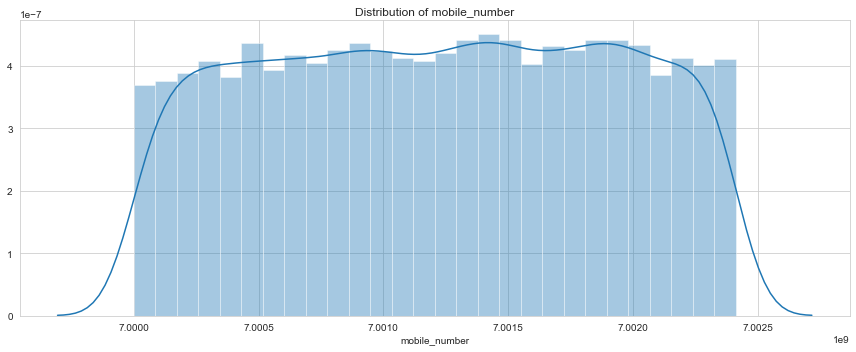

count    18584.000000
mean       585.865119
std        454.976718
min      -2041.228000
25%        364.306000
50%        493.420500
75%        700.223500
max      27731.088000
Name: arpu_6, dtype: float64


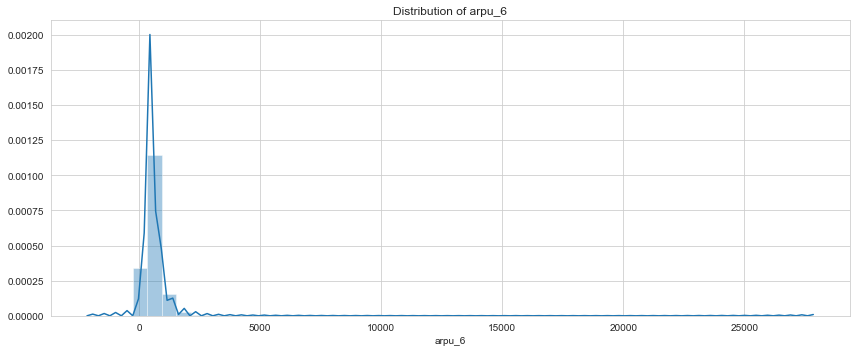

count    18584.00000
mean       585.16281
std        472.40926
min      -2014.04500
25%        363.28475
50%        491.94250
75%        696.04400
max      35145.83400
Name: arpu_7, dtype: float64


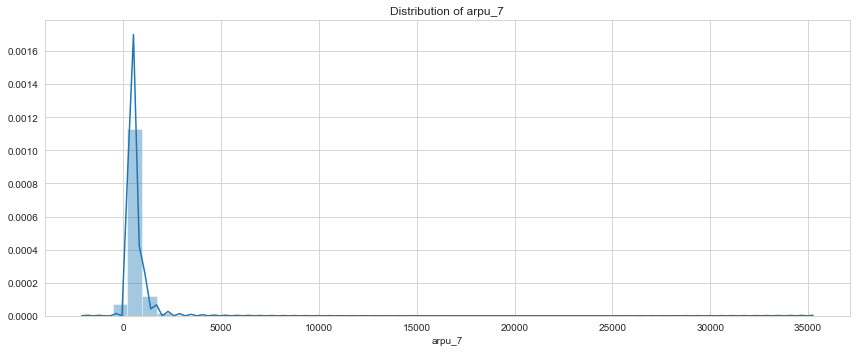

count    18584.000000
mean       532.705046
std        499.047339
min       -945.808000
25%        289.311750
50%        452.051000
75%        671.284000
max      33543.624000
Name: arpu_8, dtype: float64


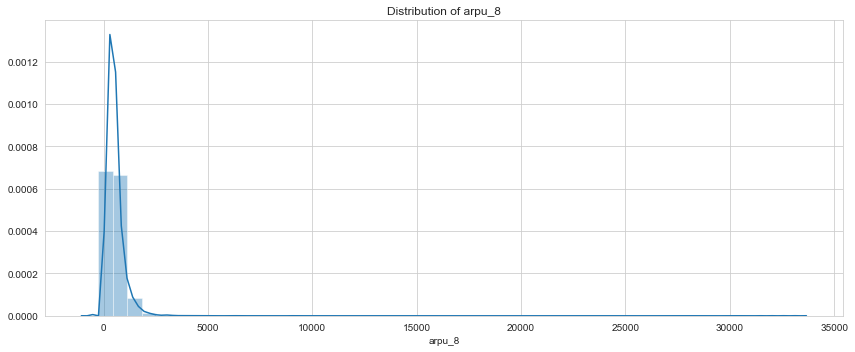

count    18584.000000
mean       294.020278
std        451.938343
min          0.000000
25%         43.410000
50%        127.830000
75%        350.152500
max       6504.340000
Name: onnet_mou_6, dtype: float64


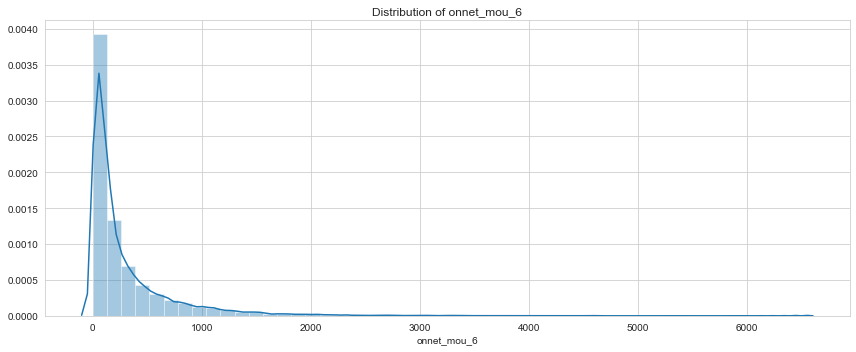

count    18584.000000
mean       302.083024
std        477.310771
min          0.000000
25%         43.582500
50%        127.760000
75%        354.865000
max       8157.780000
Name: onnet_mou_7, dtype: float64


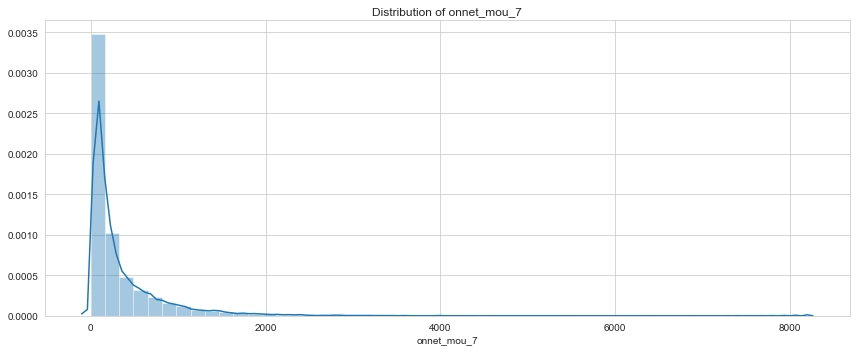

count    18584.000000
mean       267.822546
std        464.259778
min          0.000000
25%         34.352500
50%        105.810000
75%        293.597500
max      10752.560000
Name: onnet_mou_8, dtype: float64


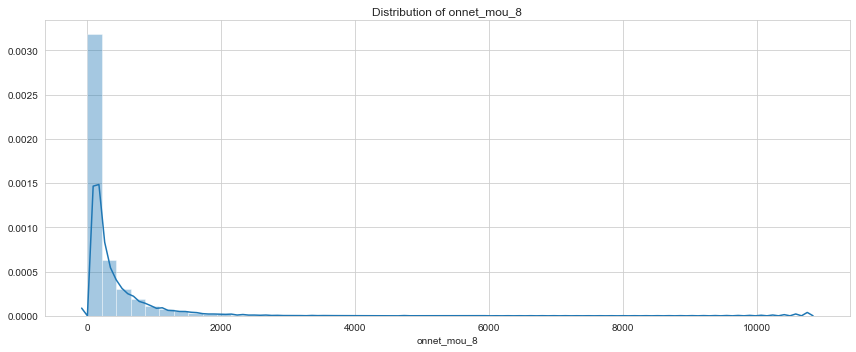

count    18584.000000
mean       421.736141
std        475.942214
min          0.000000
25%        142.720000
50%        286.580000
75%        522.032500
max       8362.360000
Name: offnet_mou_6, dtype: float64


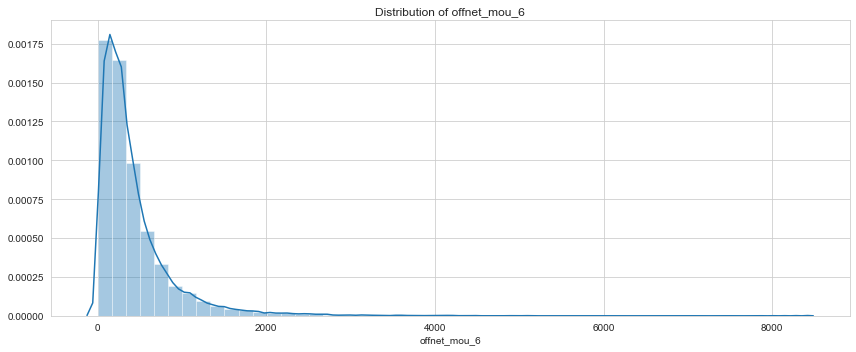

count    18584.000000
mean       426.902264
std        490.661583
min          0.000000
25%        142.870000
50%        286.280000
75%        530.172500
max       9667.130000
Name: offnet_mou_7, dtype: float64


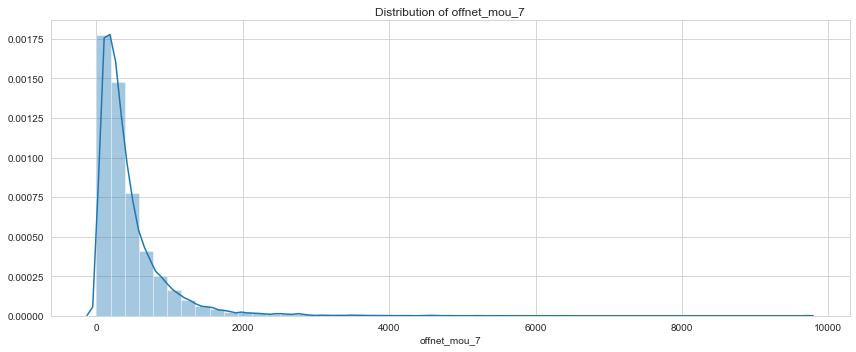

count    18584.000000
mean       385.381479
std        476.525713
min          0.000000
25%        112.717500
50%        252.130000
75%        482.732500
max      13547.840000
Name: offnet_mou_8, dtype: float64


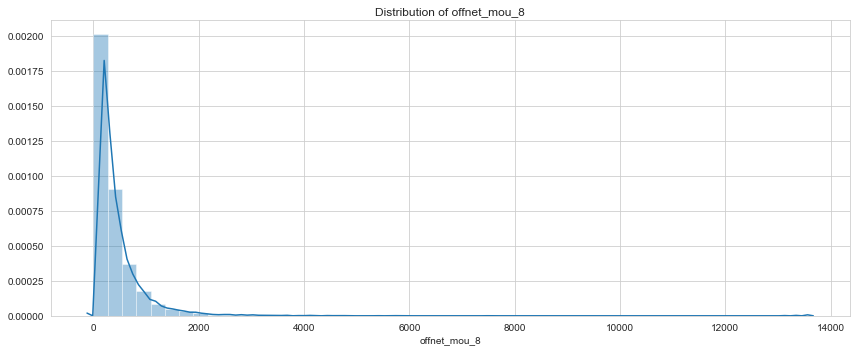

count    18584.000000
mean        95.186197
std        234.708723
min          0.000000
25%          9.075000
50%         33.730000
75%         92.495000
max       6431.330000
Name: loc_og_t2t_mou_6, dtype: float64


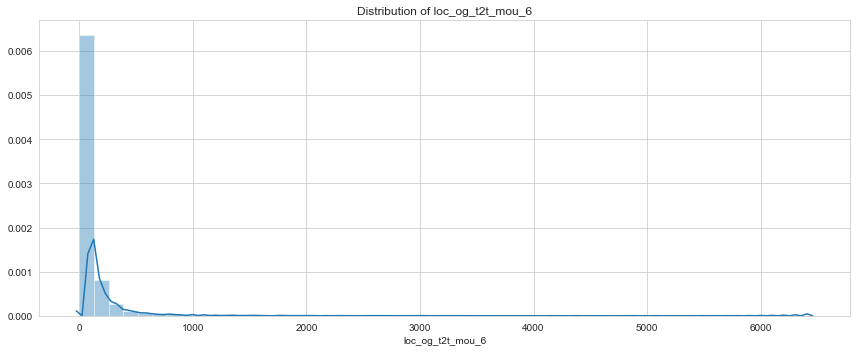

count    18584.000000
mean        95.833235
std        244.611116
min          0.000000
25%         10.180000
50%         34.380000
75%         91.937500
max       7400.660000
Name: loc_og_t2t_mou_7, dtype: float64


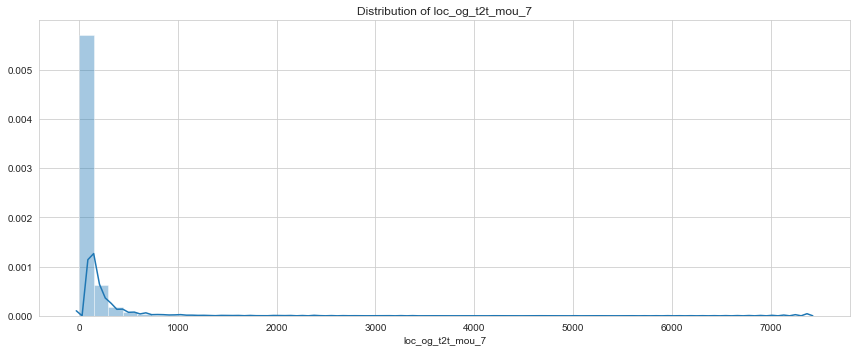

count    18584.000000
mean        88.192524
std        238.378818
min          0.000000
25%          7.840000
50%         31.230000
75%         85.687500
max      10752.560000
Name: loc_og_t2t_mou_8, dtype: float64


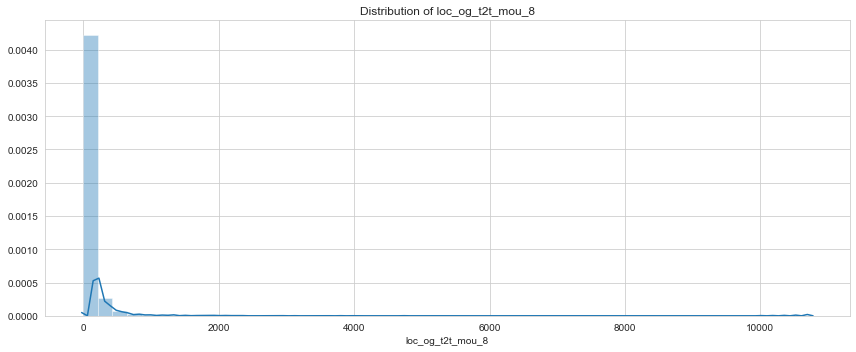

count    18584.000000
mean       184.400218
std        252.141801
min          0.000000
25%         32.860000
50%        104.360000
75%        241.700000
max       4212.040000
Name: loc_og_t2m_mou_6, dtype: float64


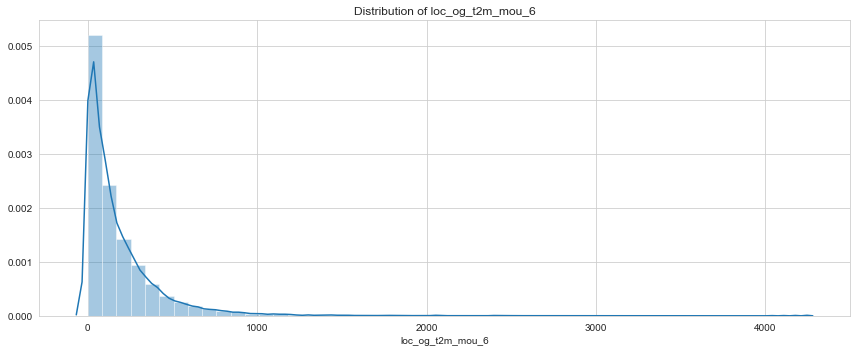

count    18584.000000
mean       183.650784
std        240.097085
min          0.000000
25%         36.255000
50%        107.260000
75%        241.215000
max       4456.740000
Name: loc_og_t2m_mou_7, dtype: float64


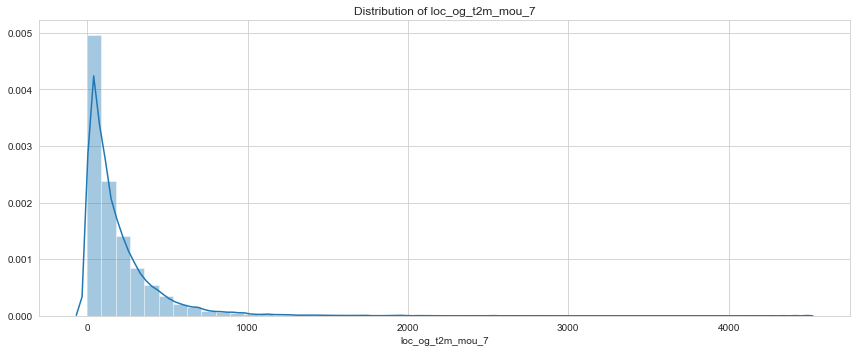

count    18584.000000
mean       172.627229
std        235.254953
min          0.000000
25%         28.930000
50%         97.290000
75%        225.632500
max       4524.590000
Name: loc_og_t2m_mou_8, dtype: float64


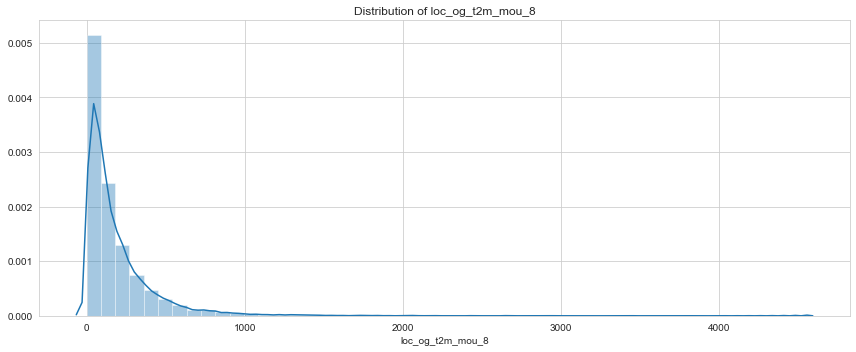

count    18584.000000
mean         6.843709
std         19.730398
min          0.000000
25%          0.000000
50%          0.400000
75%          5.230000
max        617.580000
Name: loc_og_t2f_mou_6, dtype: float64


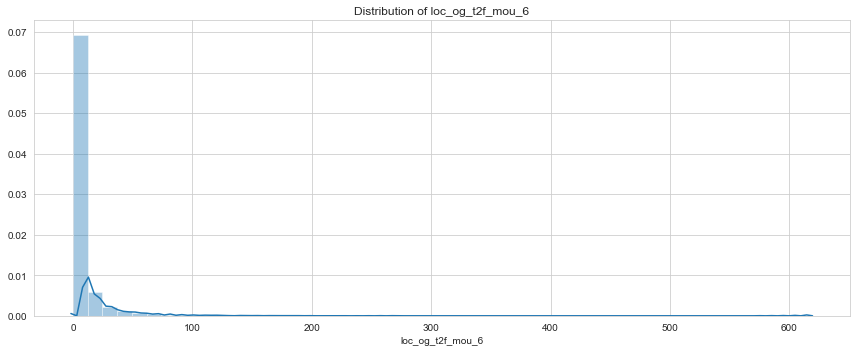

count    18584.000000
mean         6.932276
std         19.269903
min          0.000000
25%          0.000000
50%          0.460000
75%          5.230000
max        481.840000
Name: loc_og_t2f_mou_7, dtype: float64


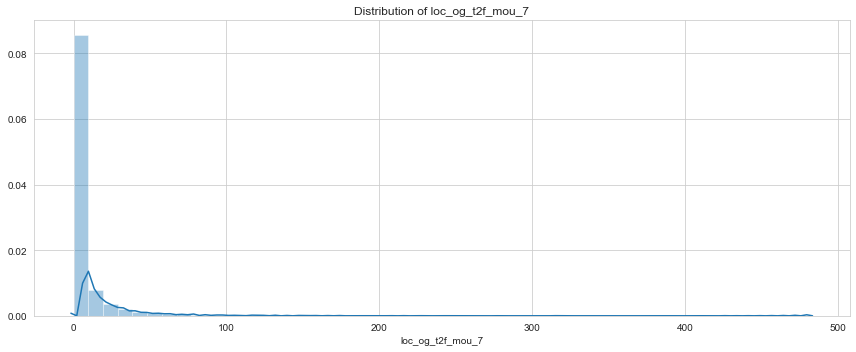

count    18584.000000
mean         6.403163
std         18.531787
min          0.000000
25%          0.000000
50%          0.310000
75%          4.690000
max        539.080000
Name: loc_og_t2f_mou_8, dtype: float64


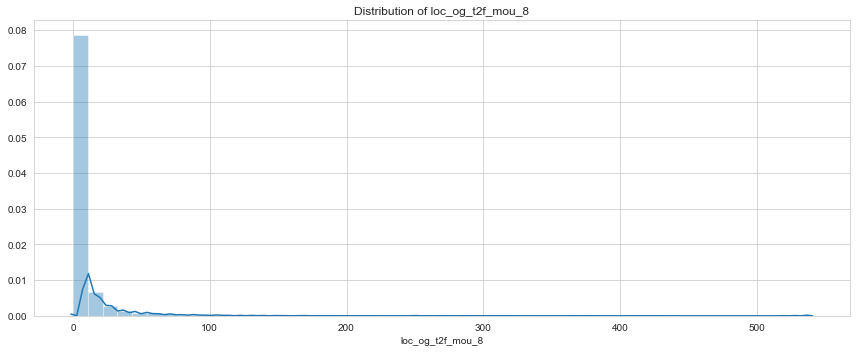

count    18584.000000
mean         1.739092
std          7.731819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.030000
max        351.830000
Name: loc_og_t2c_mou_8, dtype: float64


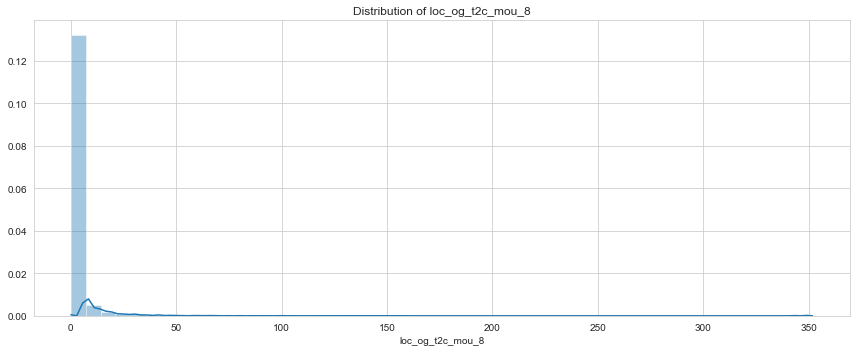

count    18584.000000
mean       286.778447
std        379.899081
min          0.000000
25%         55.337500
50%        171.180000
75%        377.405000
max      10643.380000
Name: loc_og_mou_6, dtype: float64


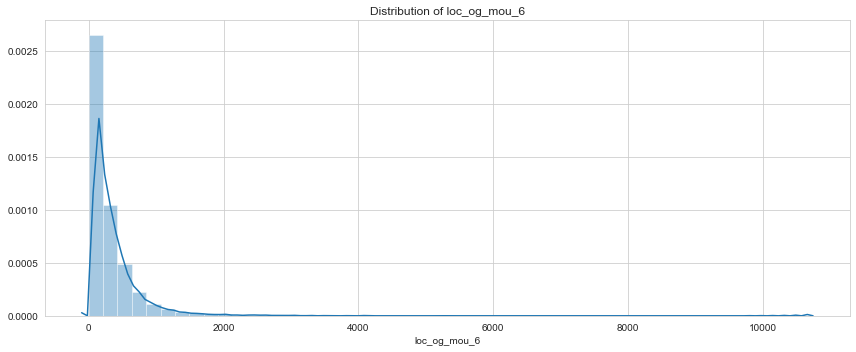

count    18584.00000
mean       286.78317
std        371.59897
min          0.00000
25%         61.58250
50%        176.56000
75%        378.52000
max       7674.78000
Name: loc_og_mou_7, dtype: float64


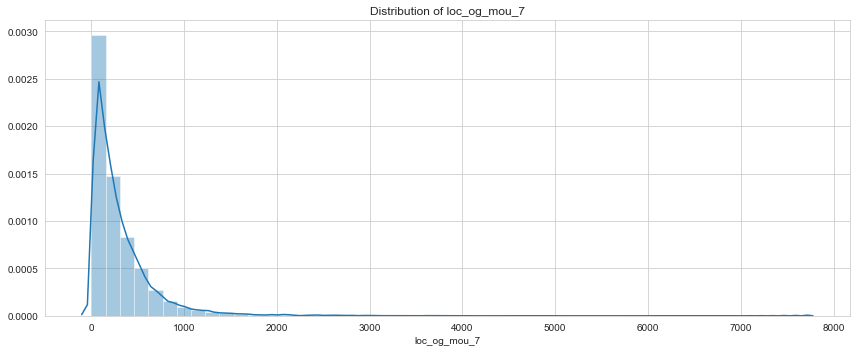

count    18584.000000
mean       268.231663
std        367.052201
min          0.000000
25%         48.920000
50%        160.180000
75%        351.732500
max      11039.910000
Name: loc_og_mou_8, dtype: float64


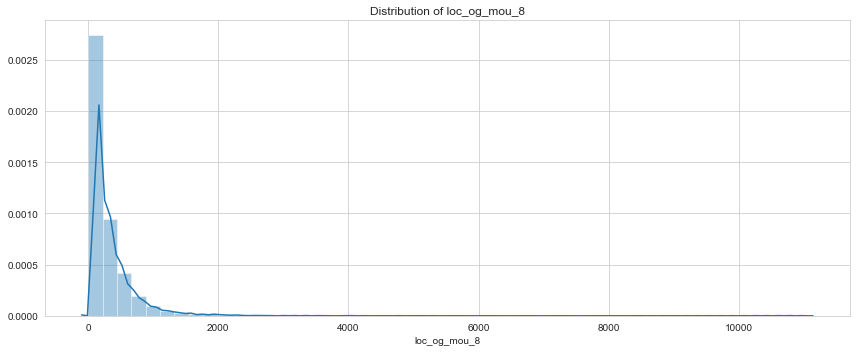

count    18584.000000
mean       186.792527
std        401.407730
min          0.000000
25%          0.000000
50%         12.890000
75%        173.557500
max       6482.440000
Name: std_og_t2t_mou_6, dtype: float64


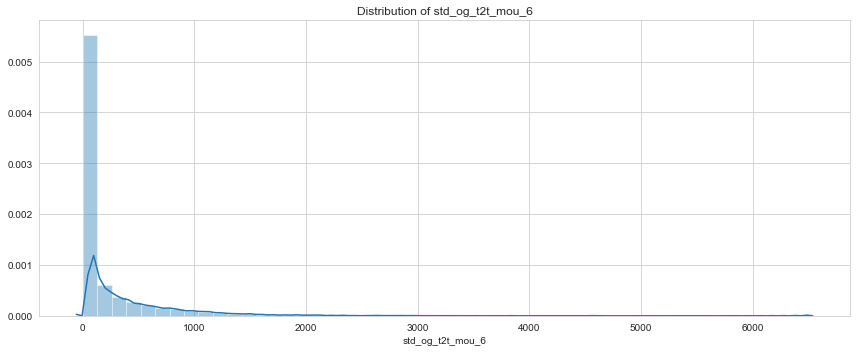

count    18584.000000
mean       196.643087
std        424.687822
min          0.000000
25%          0.000000
50%         13.510000
75%        184.150000
max       8133.660000
Name: std_og_t2t_mou_7, dtype: float64


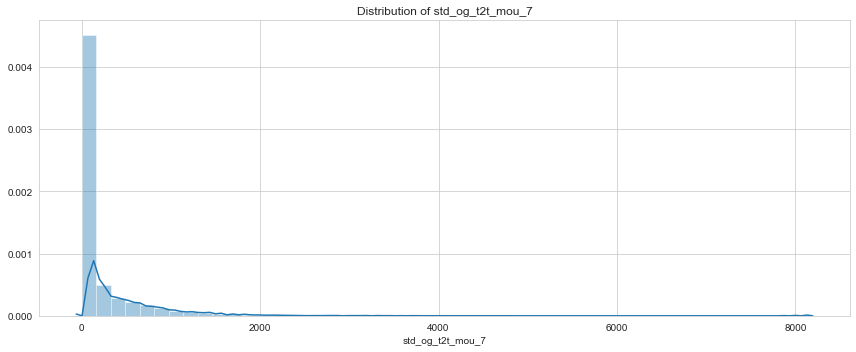

count    18584.000000
mean       169.259011
std        405.750242
min          0.000000
25%          0.000000
50%          7.530000
75%        128.552500
max       6755.040000
Name: std_og_t2t_mou_8, dtype: float64


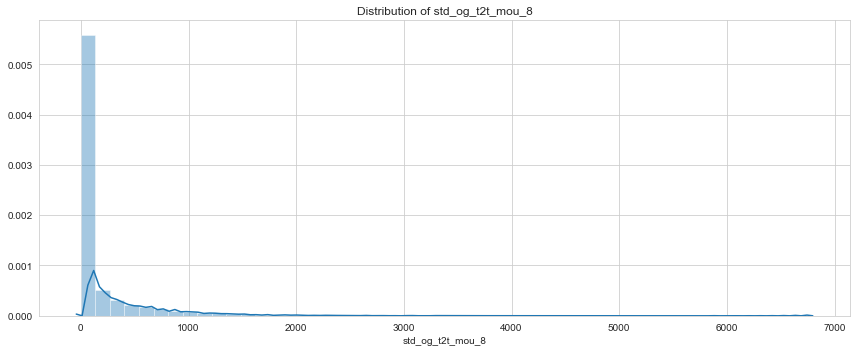

count    18584.000000
mean       202.204171
std        418.655322
min          0.000000
25%          2.030000
50%         38.830000
75%        208.545000
max       8314.760000
Name: std_og_t2m_mou_6, dtype: float64


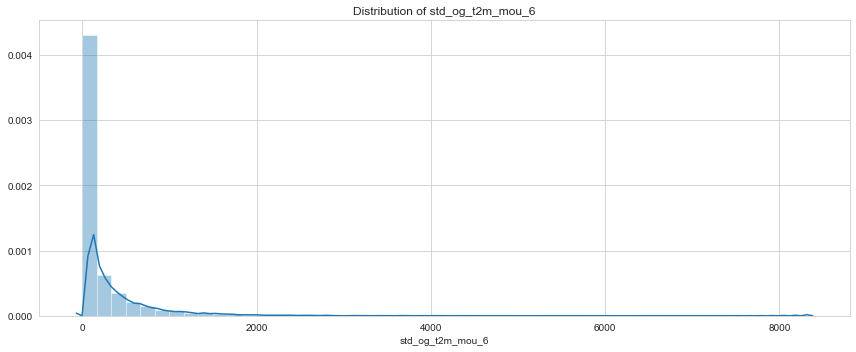

count    18584.000000
mean       212.841225
std        443.638579
min          0.000000
25%          1.810000
50%         38.590000
75%        218.070000
max       9284.740000
Name: std_og_t2m_mou_7, dtype: float64


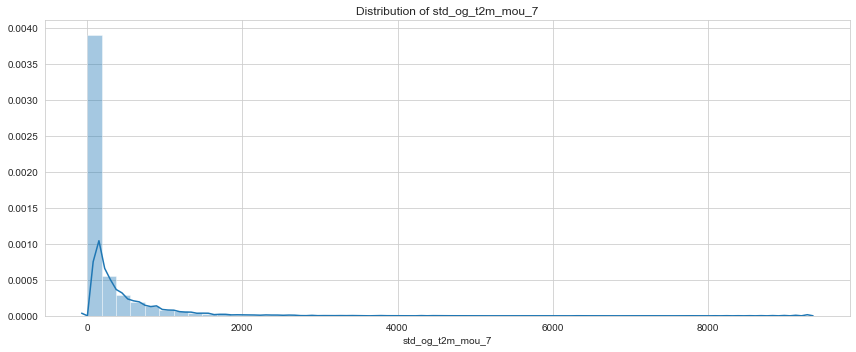

count    18584.000000
mean       180.625503
std        417.593883
min          0.000000
25%          0.680000
50%         26.940000
75%        164.030000
max      13411.210000
Name: std_og_t2m_mou_8, dtype: float64


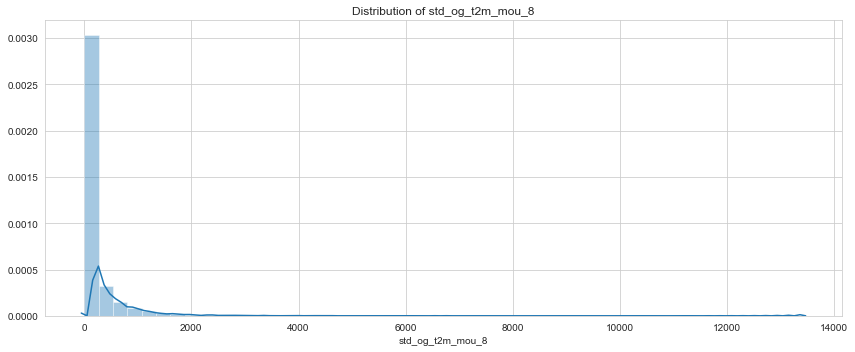

count    18584.000000
mean         1.874738
std         11.460511
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        354.340000
Name: std_og_t2f_mou_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


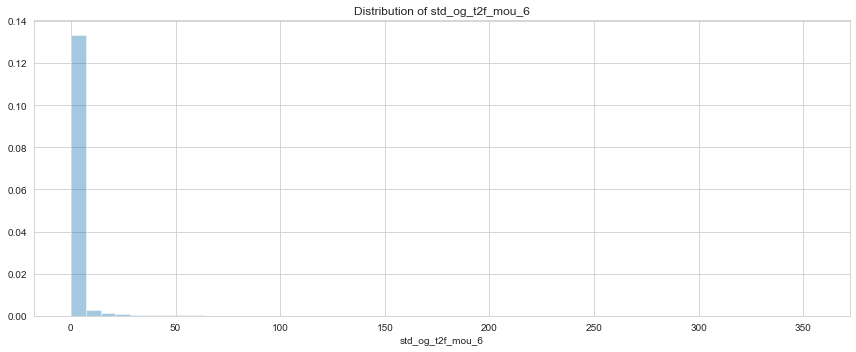

count    18584.000000
mean       391.668042
std        604.030019
min          0.000000
25%          6.630000
50%        128.010000
75%        561.955000
max       8432.990000
Name: std_og_mou_6, dtype: float64


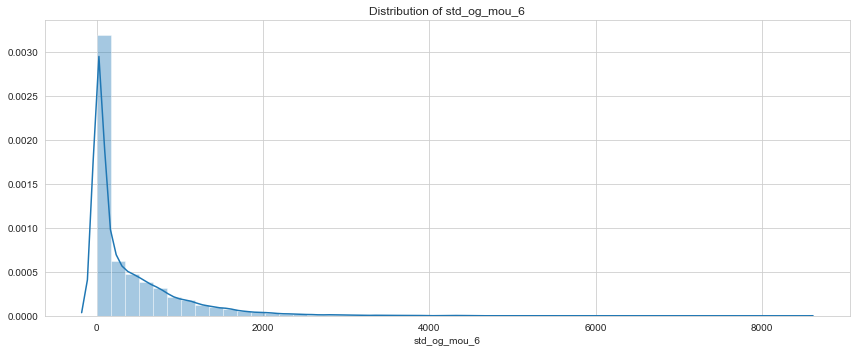

count    18584.000000
mean       412.264791
std        639.250180
min          0.000000
25%          6.557500
50%        134.660000
75%        606.732500
max      10936.730000
Name: std_og_mou_7, dtype: float64


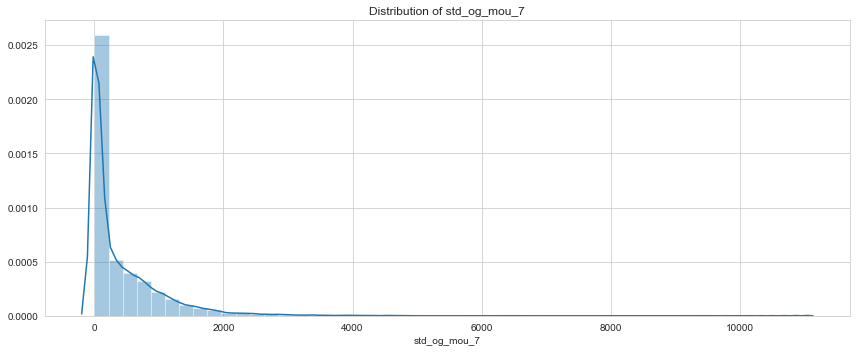

count    18584.000000
mean       353.172307
std        614.762589
min          0.000000
25%          3.760000
50%         82.910000
75%        468.582500
max      13668.780000
Name: std_og_mou_8, dtype: float64


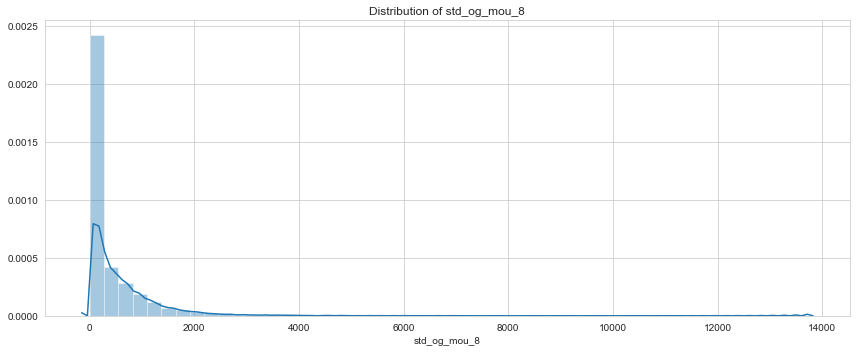

count    18584.000000
mean         5.791520
std         16.705798
min          0.000000
25%          0.000000
50%          0.250000
75%          5.130000
max        537.880000
Name: spl_og_mou_6, dtype: float64


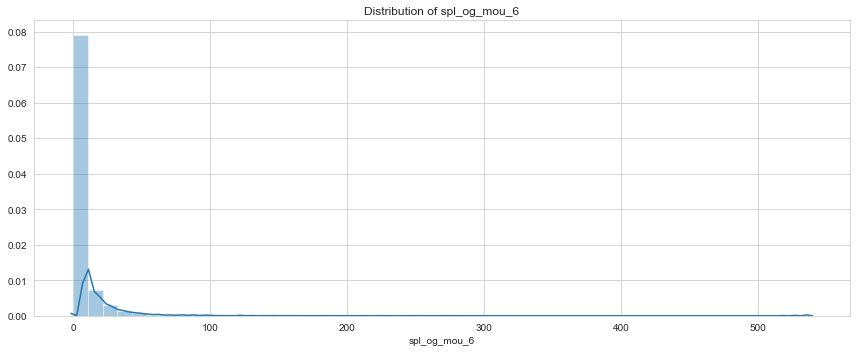

count    18584.000000
mean         7.223203
std         21.118423
min          0.000000
25%          0.000000
50%          0.830000
75%          7.010000
max       1125.310000
Name: spl_og_mou_7, dtype: float64


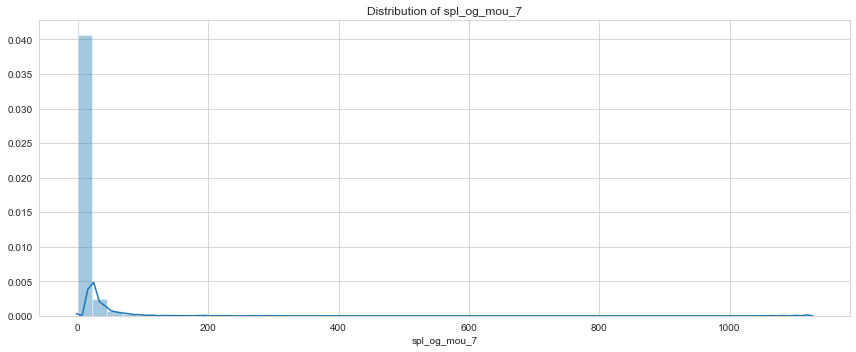

count    18584.000000
mean         6.698585
std         19.637035
min          0.000000
25%          0.000000
50%          0.660000
75%          6.310000
max        531.140000
Name: spl_og_mou_8, dtype: float64


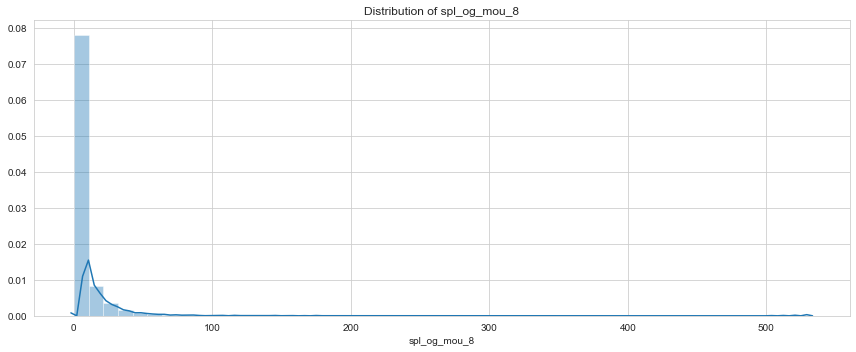

count    18584.000000
mean       684.218781
std        661.300787
min          0.000000
25%        263.720000
50%        509.880000
75%        888.907500
max      10674.030000
Name: total_og_mou_6, dtype: float64


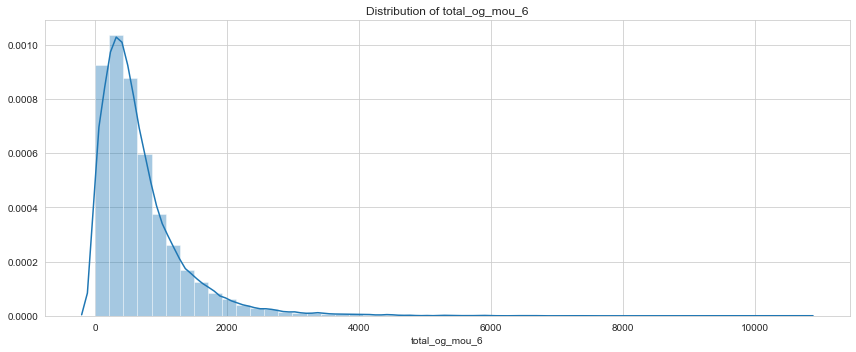

count    18584.000000
mean       705.356562
std        687.752306
min          0.000000
25%        275.182500
50%        521.815000
75%        920.495000
max      11365.310000
Name: total_og_mou_7, dtype: float64


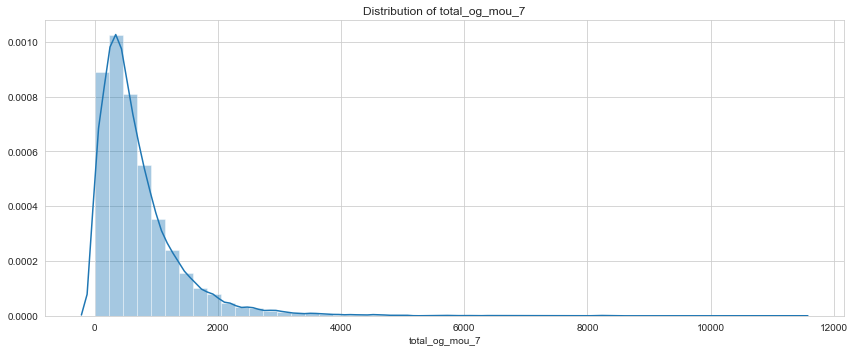

count    18584.000000
mean       622.446691
std        688.766846
min          0.000000
25%        189.070000
50%        436.145000
75%        825.090000
max      13848.260000
Name: total_og_mou_8, dtype: float64


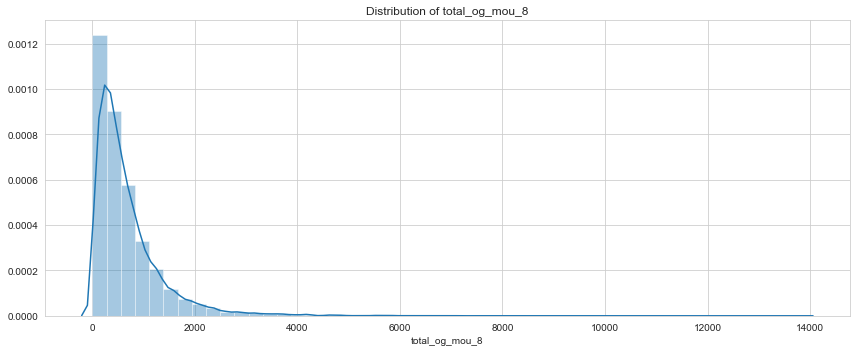

count    18584.000000
mean        69.646166
std        161.505815
min          0.000000
25%          9.030000
50%         29.910000
75%         74.365000
max       6351.440000
Name: loc_ic_t2t_mou_6, dtype: float64


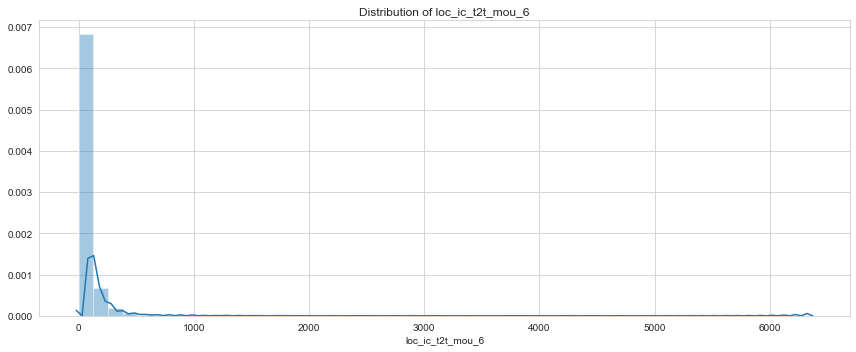

count    18584.000000
mean        71.388569
std        171.093719
min          0.000000
25%         10.210000
50%         31.060000
75%         74.882500
max       5080.880000
Name: loc_ic_t2t_mou_7, dtype: float64


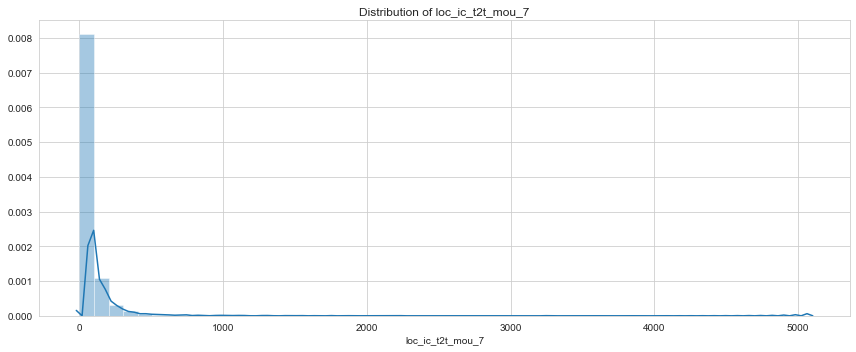

count    18584.000000
mean        66.904077
std        154.518269
min          0.000000
25%          8.690000
50%         28.480000
75%         71.057500
max       3971.940000
Name: loc_ic_t2t_mou_8, dtype: float64


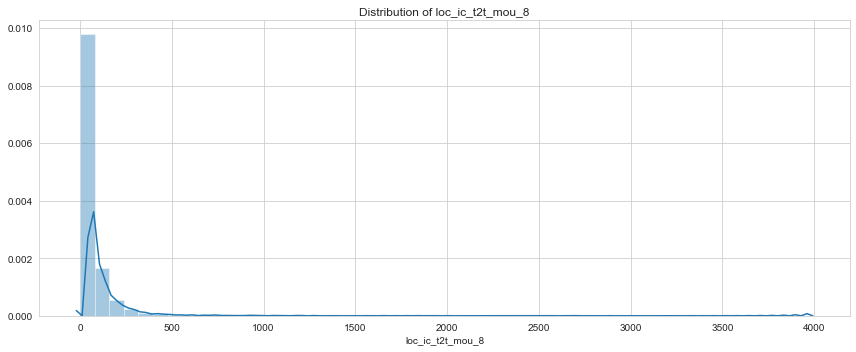

count    18584.000000
mean       161.571311
std        225.447352
min          0.000000
25%         36.252500
50%         95.940000
75%        203.740000
max       4450.740000
Name: loc_ic_t2m_mou_6, dtype: float64


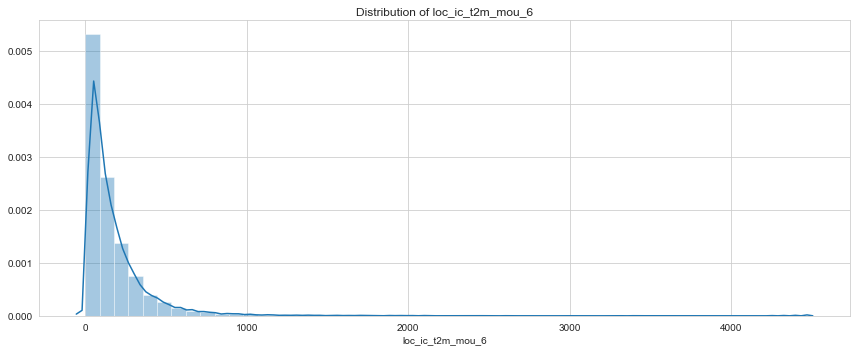

count    18584.000000
mean       161.805574
std        215.278845
min          0.000000
25%         40.160000
50%         99.160000
75%        204.817500
max       4388.730000
Name: loc_ic_t2m_mou_7, dtype: float64


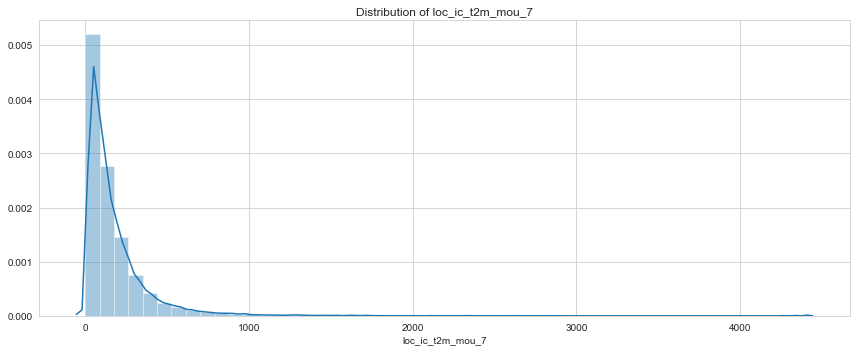

count    18584.000000
mean       157.258301
std        217.839403
min          0.000000
25%         36.430000
50%         94.760000
75%        196.922500
max       5738.460000
Name: loc_ic_t2m_mou_8, dtype: float64


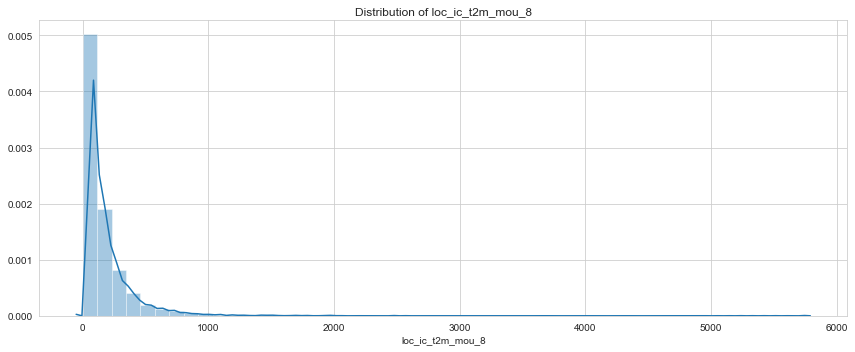

count    18584.000000
mean        15.469462
std         45.517857
min          0.000000
25%          0.000000
50%          2.090000
75%         12.490000
max       1678.410000
Name: loc_ic_t2f_mou_6, dtype: float64


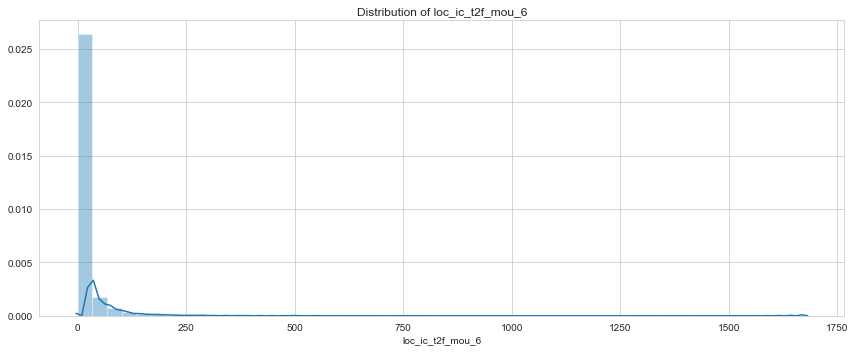

count    18584.000000
mean        16.228027
std         46.511783
min          0.000000
25%          0.000000
50%          2.340000
75%         12.890000
max       1393.110000
Name: loc_ic_t2f_mou_7, dtype: float64


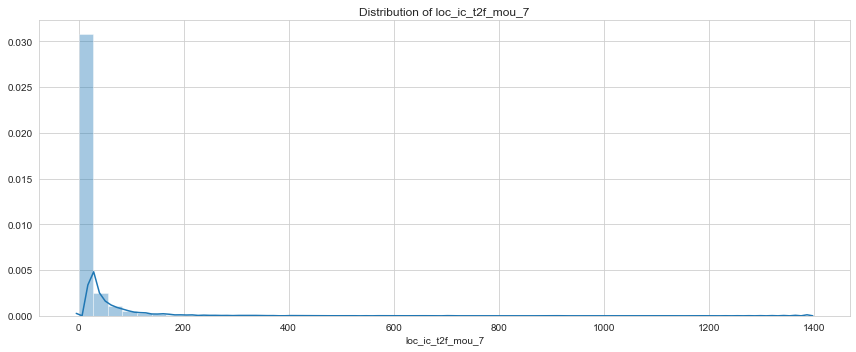

count    18584.000000
mean        14.743123
std         43.456412
min          0.000000
25%          0.000000
50%          2.160000
75%         11.610000
max       1459.690000
Name: loc_ic_t2f_mou_8, dtype: float64


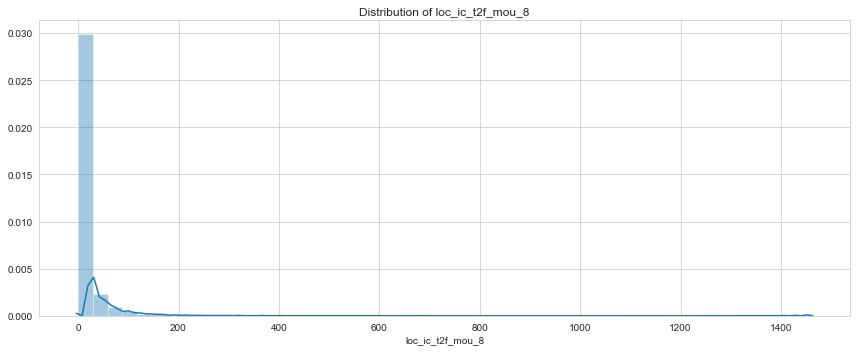

count    18584.000000
mean       246.968265
std        314.186368
min          0.000000
25%         60.875000
50%        154.080000
75%        317.840000
max       6496.110000
Name: loc_ic_mou_6, dtype: float64


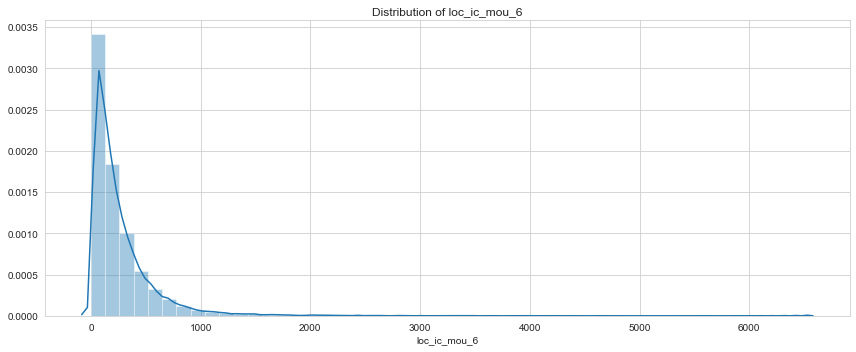

count    18584.000000
mean       249.695659
std        312.191023
min          0.000000
25%         66.787500
50%        157.930000
75%        318.150000
max       5382.080000
Name: loc_ic_mou_7, dtype: float64


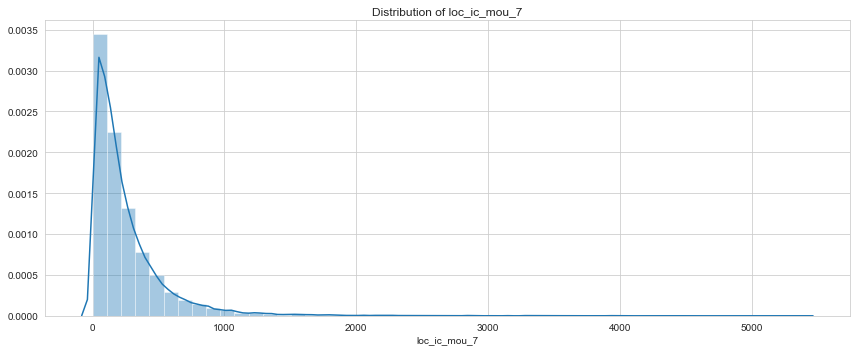

count    18584.000000
mean       239.738661
std        304.702480
min          0.000000
25%         60.555000
50%        151.210000
75%        302.927500
max       5748.810000
Name: loc_ic_mou_8, dtype: float64


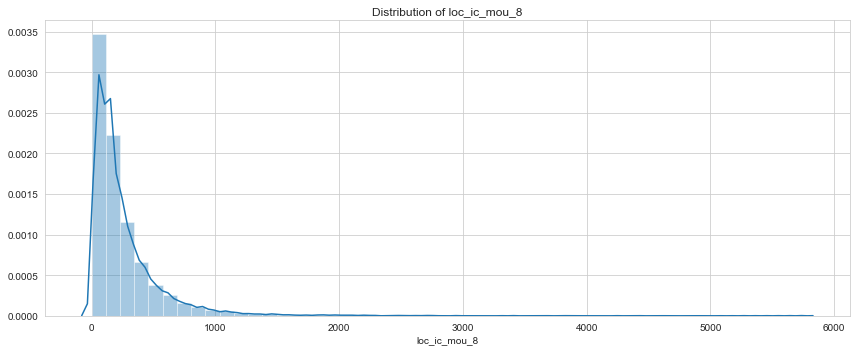

count    18584.000000
mean        16.106616
std         76.292797
min          0.000000
25%          0.000000
50%          1.050000
75%         10.015000
max       3038.340000
Name: std_ic_t2t_mou_6, dtype: float64


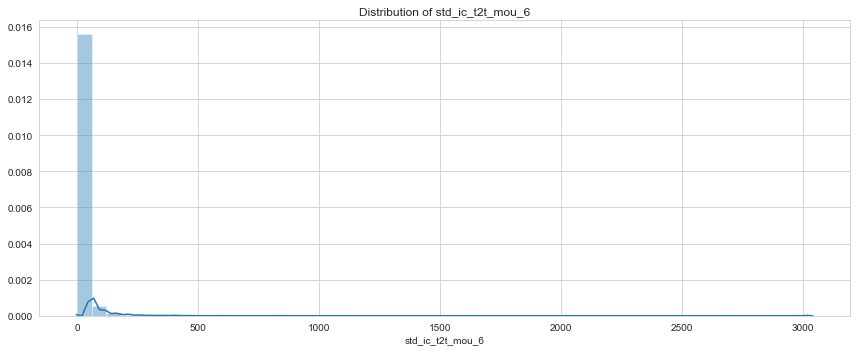

count    18584.000000
mean        16.426537
std         74.320273
min          0.000000
25%          0.000000
50%          1.250000
75%         10.780000
max       4235.340000
Name: std_ic_t2t_mou_7, dtype: float64


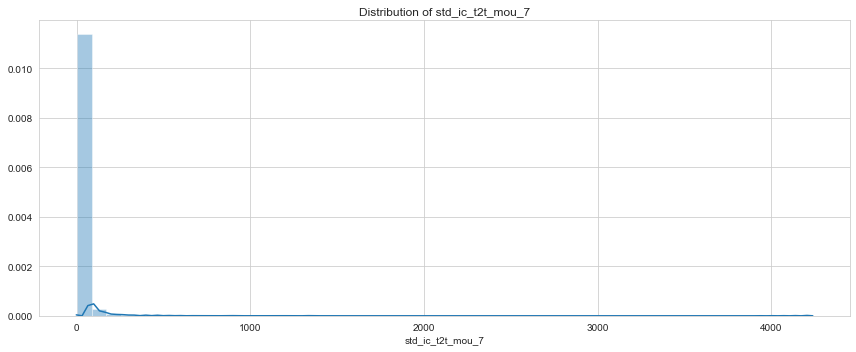

count    18584.000000
mean        15.049112
std         73.379477
min          0.000000
25%          0.000000
50%          0.760000
75%          8.740000
max       3423.390000
Name: std_ic_t2t_mou_8, dtype: float64


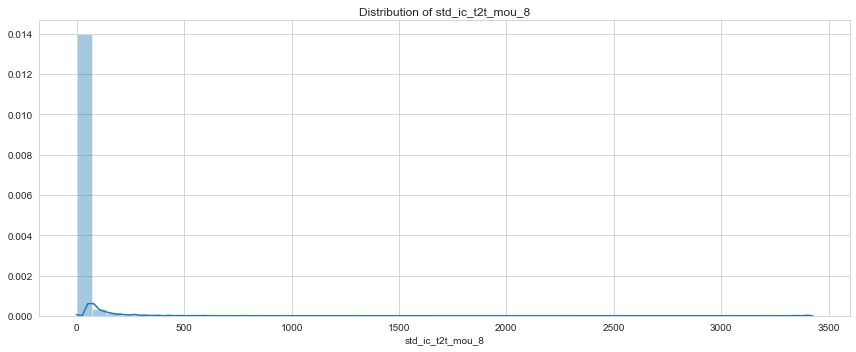

count    18584.000000
mean        32.061663
std        103.289340
min          0.000000
25%          0.610000
50%          7.210000
75%         27.060000
max       4630.230000
Name: std_ic_t2m_mou_6, dtype: float64


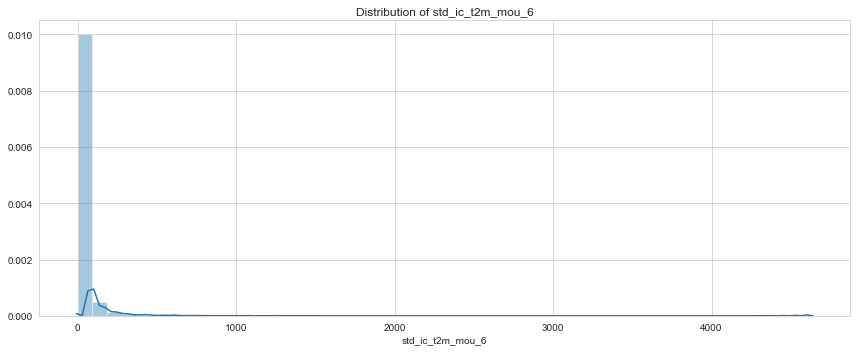

count    18584.000000
mean        33.294840
std        105.907155
min          0.000000
25%          0.647500
50%          7.710000
75%         28.560000
max       3470.380000
Name: std_ic_t2m_mou_7, dtype: float64


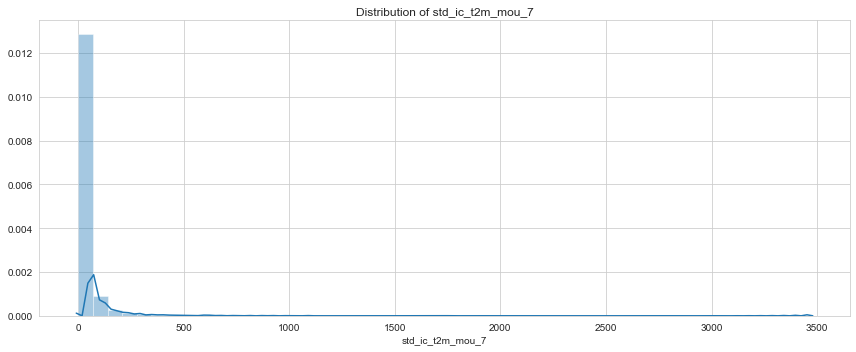

count    18584.000000
mean        30.612376
std        107.690700
min          0.000000
25%          0.325000
50%          6.490000
75%         25.345000
max       5645.860000
Name: std_ic_t2m_mou_8, dtype: float64


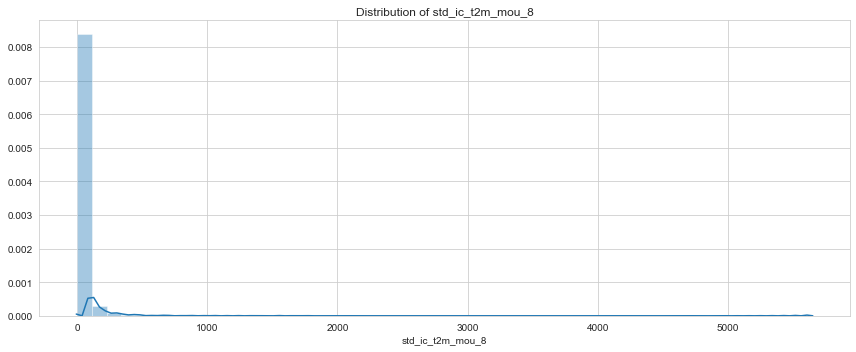

count    18584.000000
mean         2.740680
std         18.257209
min          0.000000
25%          0.000000
50%          0.000000
75%          0.160000
max       1069.980000
Name: std_ic_t2f_mou_6, dtype: float64


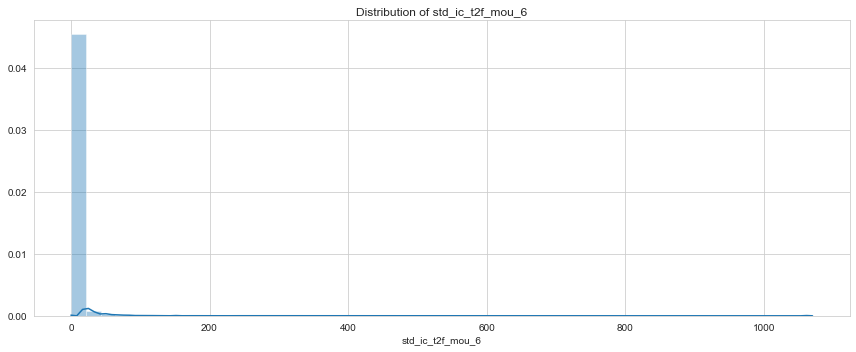

count    18584.000000
mean         2.912533
std         19.748936
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max       1136.080000
Name: std_ic_t2f_mou_7, dtype: float64


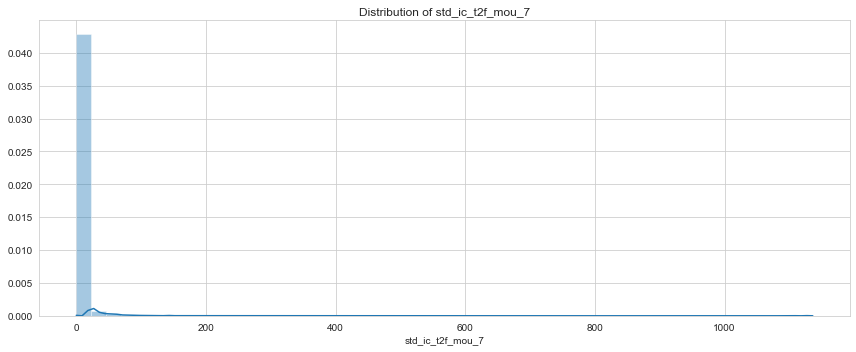

count    18584.000000
mean         2.654877
std         20.236822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max       1201.180000
Name: std_ic_t2f_mou_8, dtype: float64


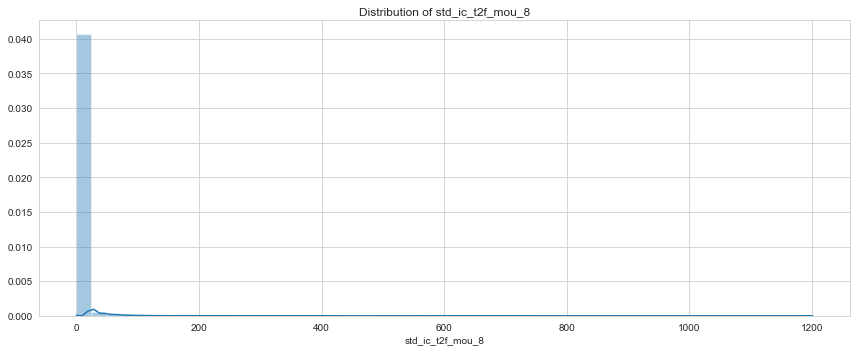

count    18584.000000
mean        50.985096
std        140.434736
min          0.000000
25%          2.910000
50%         15.210000
75%         46.310000
max       4840.330000
Name: std_ic_mou_6, dtype: float64


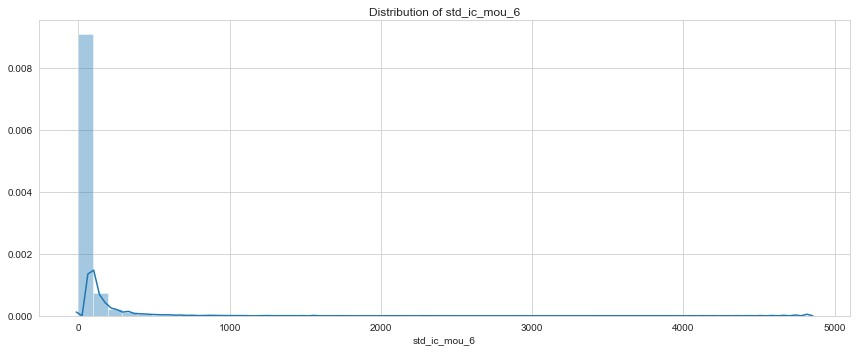

count    18584.000000
mean        52.714998
std        141.095657
min          0.000000
25%          3.130000
50%         16.380000
75%         49.245000
max       4323.530000
Name: std_ic_mou_7, dtype: float64


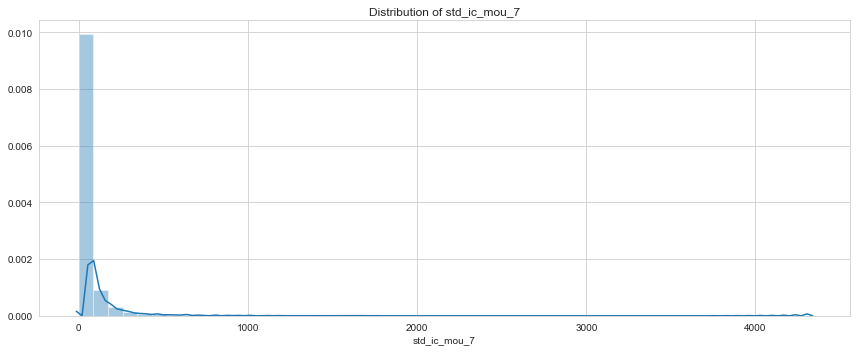

count    18584.000000
mean        48.522086
std        143.534370
min          0.000000
25%          2.260000
50%         13.580000
75%         43.082500
max       5957.140000
Name: std_ic_mou_8, dtype: float64


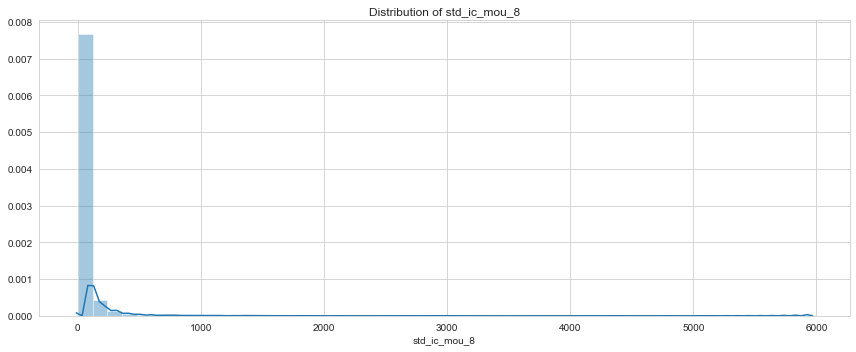

count    18584.000000
mean       308.462453
std        361.567274
min          0.000000
25%         90.290000
50%        205.250000
75%        396.867500
max       6798.640000
Name: total_ic_mou_6, dtype: float64


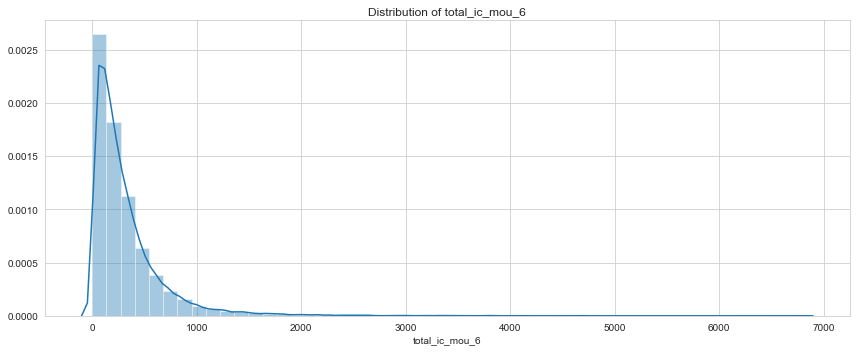

count    18584.000000
mean       314.110924
std        362.779532
min          0.000000
25%         99.220000
50%        211.300000
75%        397.550000
max       5548.190000
Name: total_ic_mou_7, dtype: float64


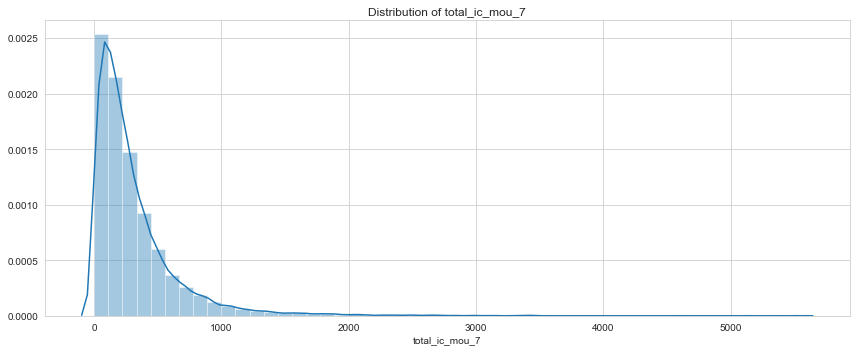

count    18584.000000
mean       295.753628
std        360.532424
min          0.000000
25%         79.640000
50%        194.535000
75%        380.830000
max       5990.710000
Name: total_ic_mou_8, dtype: float64


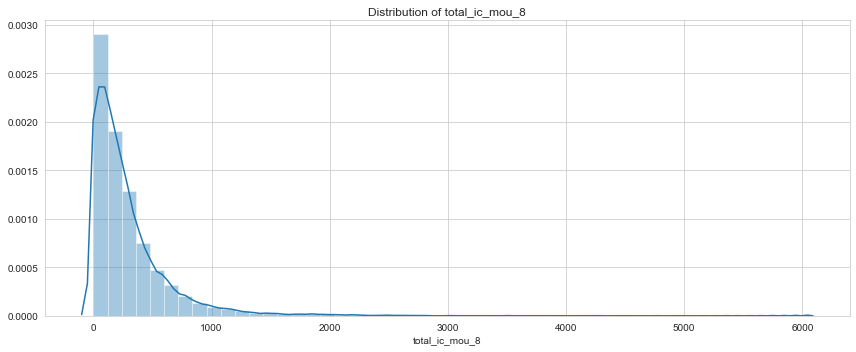

count    18584.000000
mean        12.098741
std          9.596615
min          0.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        307.000000
Name: total_rech_num_6, dtype: float64


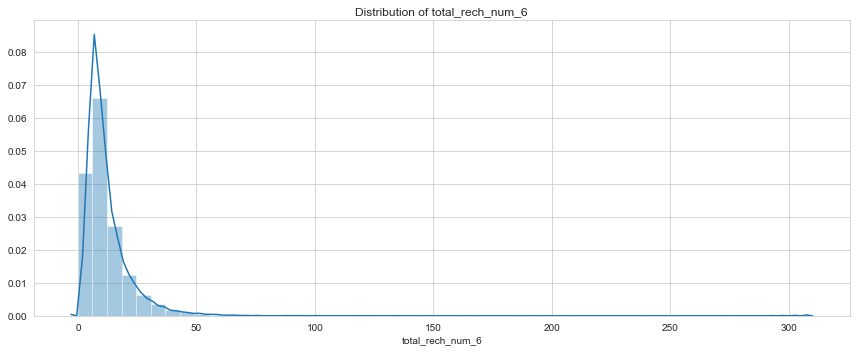

count    18584.000000
mean        11.885385
std          9.597013
min          0.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        138.000000
Name: total_rech_num_7, dtype: float64


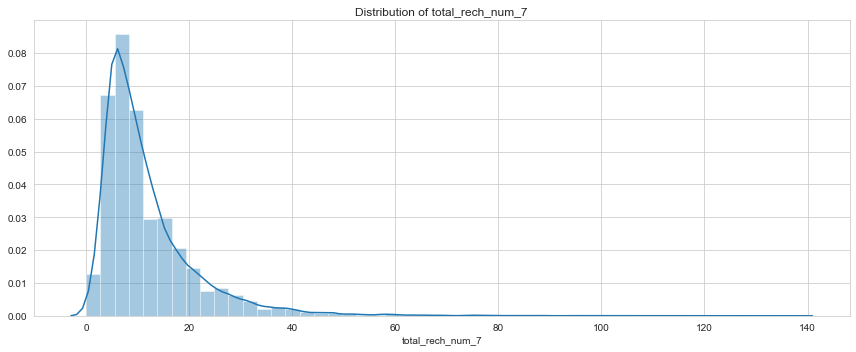

count    18584.000000
mean        10.226485
std          9.541131
min          0.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        196.000000
Name: total_rech_num_8, dtype: float64


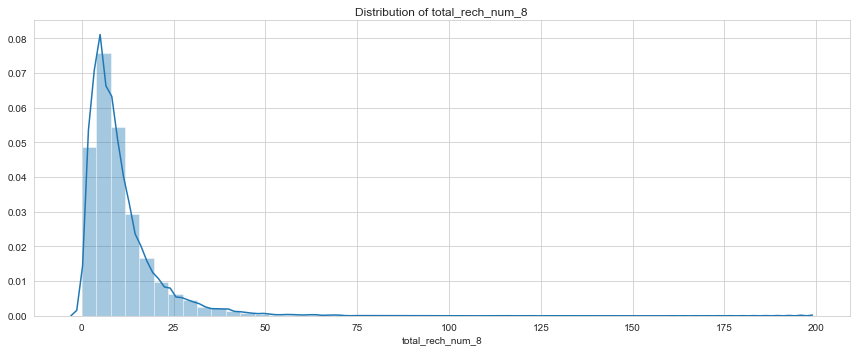

count    18584.000000
mean       696.362785
std        561.292089
min          0.000000
25%        432.000000
50%        583.000000
75%        835.000000
max      35190.000000
Name: total_rech_amt_6, dtype: float64


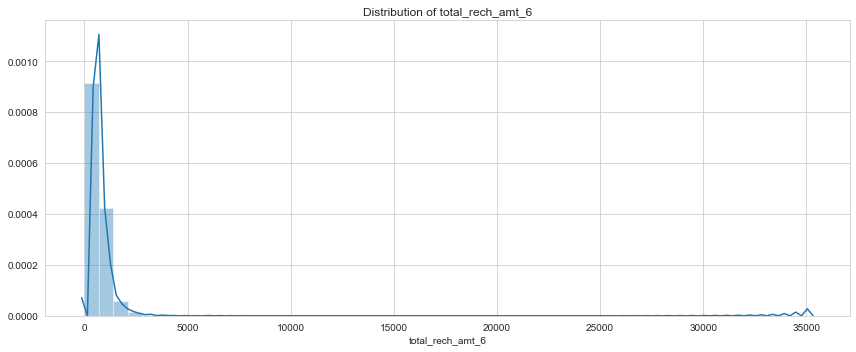

count    18584.000000
mean       691.088947
std        576.255756
min          0.000000
25%        425.000000
50%        579.000000
75%        830.000000
max      40335.000000
Name: total_rech_amt_7, dtype: float64


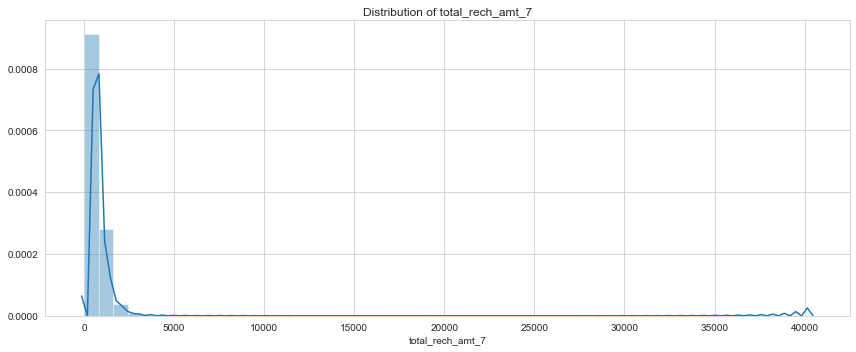

count    18584.00000
mean       611.97401
std        618.40943
min          0.00000
25%        308.00000
50%        520.00000
75%        790.00000
max      45320.00000
Name: total_rech_amt_8, dtype: float64


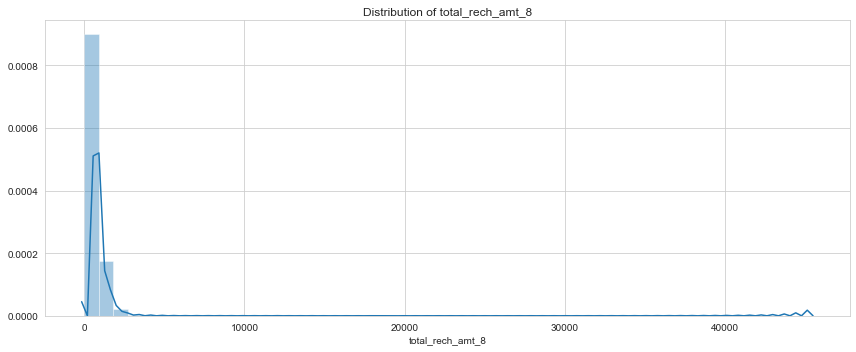

count    18584.00000
mean       171.89943
std        176.62710
min          0.00000
25%        110.00000
50%        120.00000
75%        200.00000
max       3350.00000
Name: max_rech_amt_6, dtype: float64


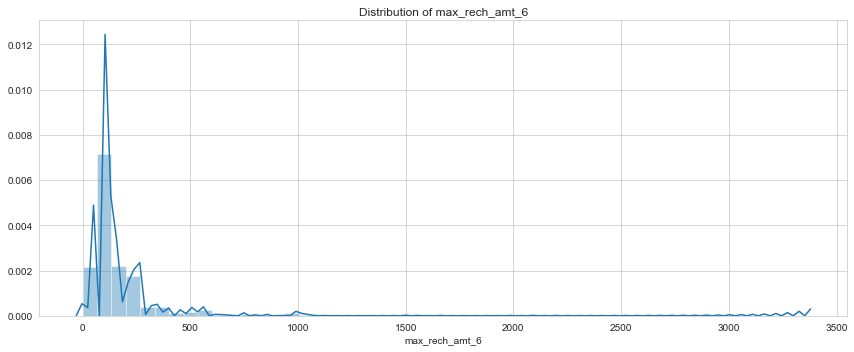

count    18584.000000
mean       174.568876
std        181.428298
min          0.000000
25%        110.000000
50%        128.000000
75%        200.000000
max       4010.000000
Name: max_rech_amt_7, dtype: float64


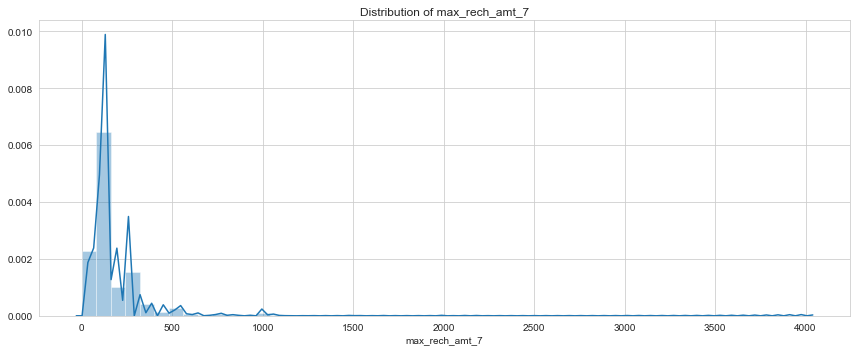

count    18584.00000
mean       162.10170
std        171.54089
min          0.00000
25%         67.00000
50%        130.00000
75%        198.00000
max       4449.00000
Name: max_rech_amt_8, dtype: float64


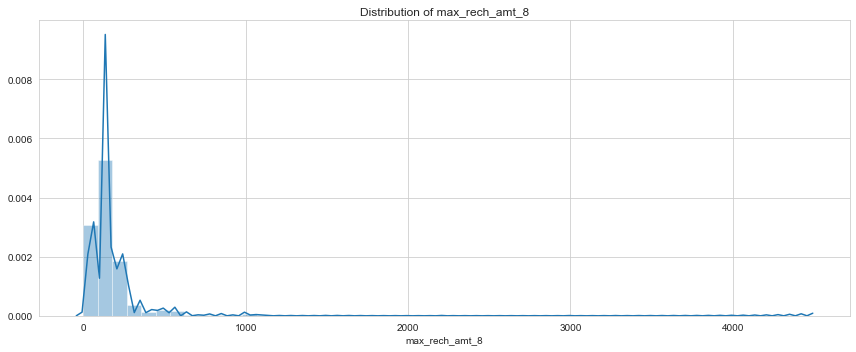

count    18584.000000
mean       104.529703
std        145.932705
min          0.000000
25%         30.000000
50%        110.000000
75%        120.000000
max       3350.000000
Name: last_day_rch_amt_6, dtype: float64


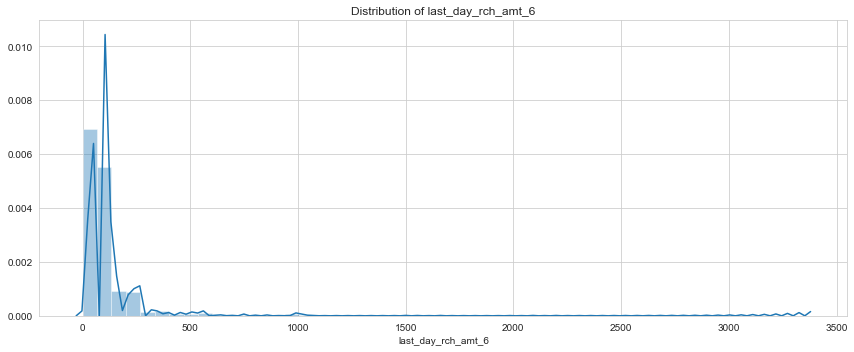

count    18584.000000
mean       103.946136
std        138.880174
min          0.000000
25%         26.000000
50%         86.000000
75%        130.000000
max       4010.000000
Name: last_day_rch_amt_7, dtype: float64


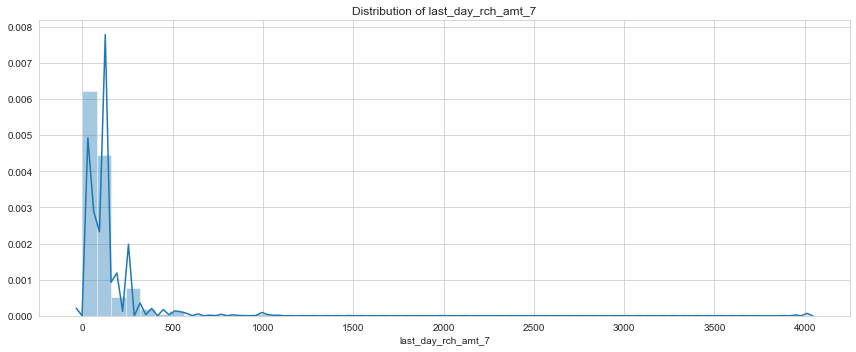

count    18584.000000
mean        94.860202
std        143.603542
min          0.000000
25%          0.000000
50%         50.000000
75%        130.000000
max       4449.000000
Name: last_day_rch_amt_8, dtype: float64


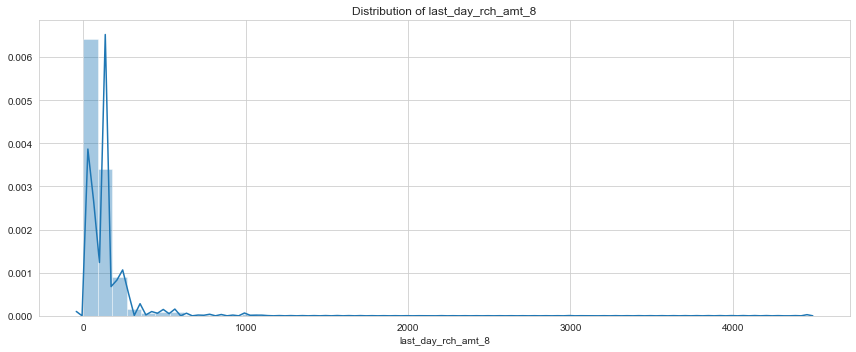

count    18584.000000
mean        79.468601
std        278.252555
min          0.000000
25%          0.000000
50%          0.000000
75%         15.480000
max      10285.900000
Name: vol_2g_mb_6, dtype: float64


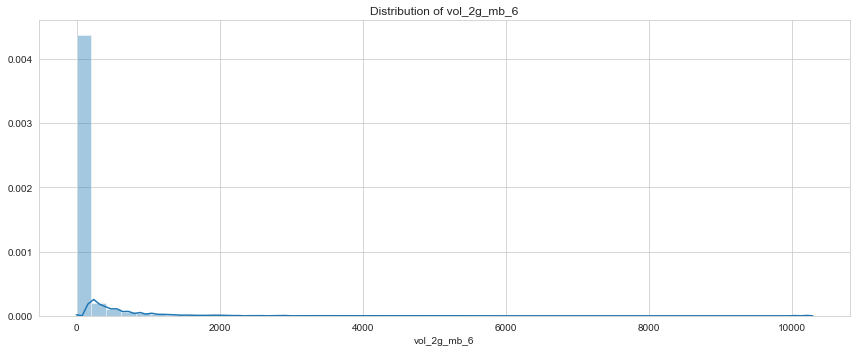

count    18584.000000
mean        77.945146
std        280.097921
min          0.000000
25%          0.000000
50%          0.000000
75%         15.960000
max       7873.550000
Name: vol_2g_mb_7, dtype: float64


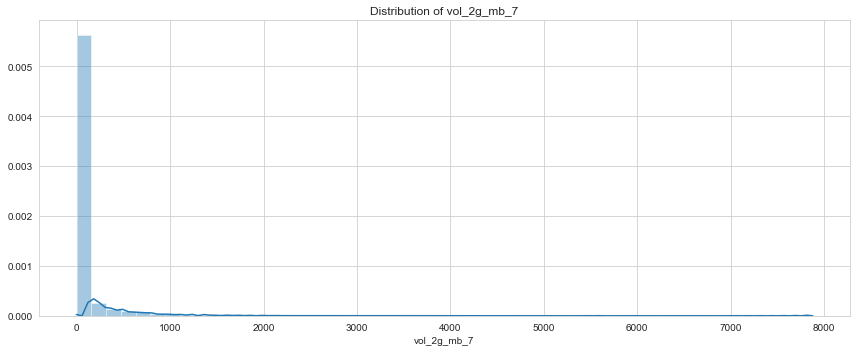

count    18584.000000
mean        69.995792
std        279.534130
min          0.000000
25%          0.000000
50%          0.000000
75%         10.017500
max      11117.610000
Name: vol_2g_mb_8, dtype: float64


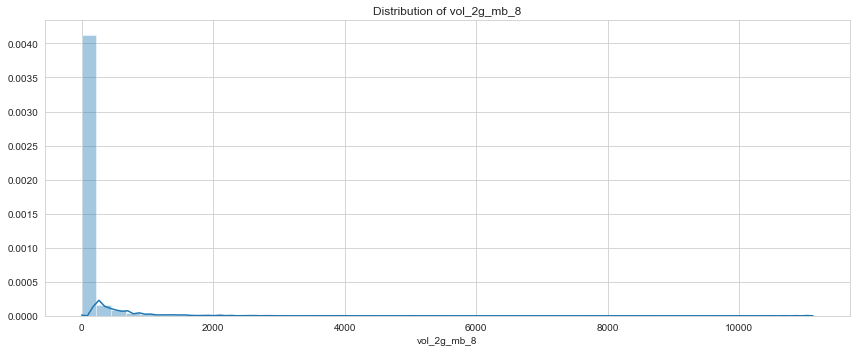

count    18584.000000
mean       259.536747
std        916.238139
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45735.400000
Name: vol_3g_mb_6, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


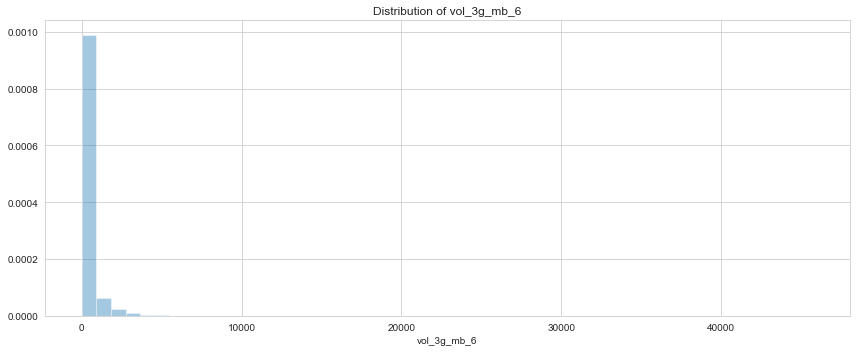

count    18584.000000
mean       275.991767
std        833.569918
min          0.000000
25%          0.000000
50%          0.000000
75%          0.110000
max      27600.290000
Name: vol_3g_mb_7, dtype: float64


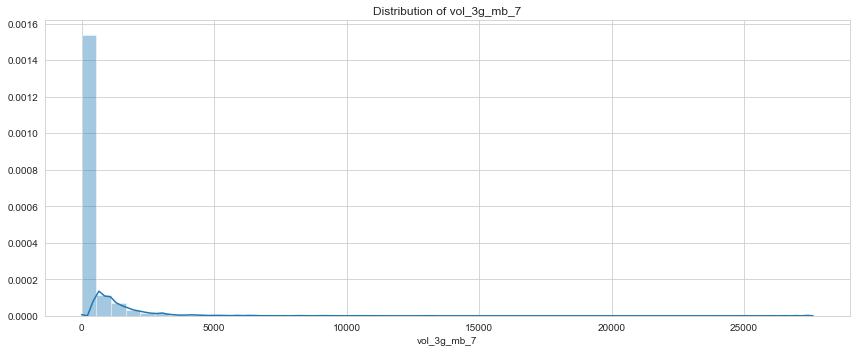

count    18584.000000
mean       267.845482
std        861.304048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      30036.060000
Name: vol_3g_mb_8, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


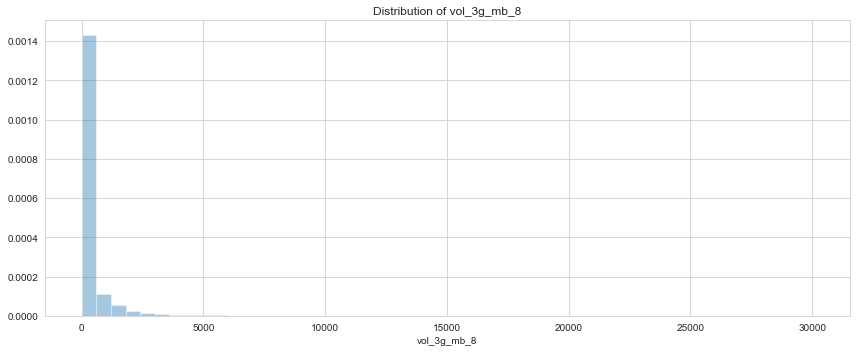

count    18584.000000
mean      1261.839432
std        971.507898
min        180.000000
25%        481.000000
50%        914.000000
75%       1908.000000
max       4321.000000
Name: aon, dtype: float64


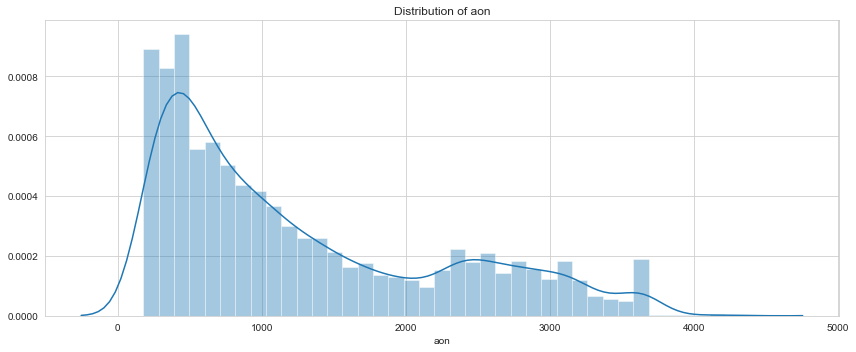

count    18584.000000
mean       128.307233
std        378.845975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max       6757.970000
Name: aug_vbc_3g, dtype: float64


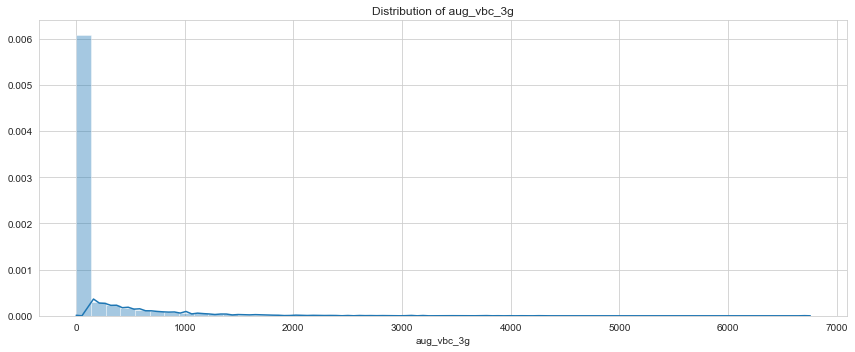

count    18584.000000
mean       134.323709
std        397.349864
min          0.000000
25%          0.000000
50%          0.000000
75%          1.040000
max       7237.780000
Name: jul_vbc_3g, dtype: float64


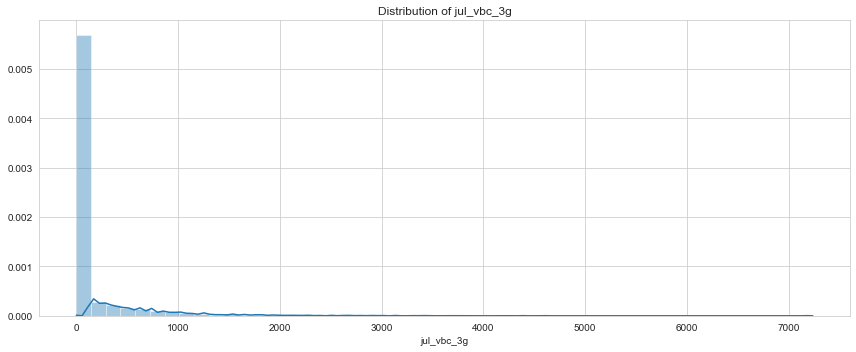

count    18584.000000
mean       119.828088
std        387.848379
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      11166.210000
Name: jun_vbc_3g, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


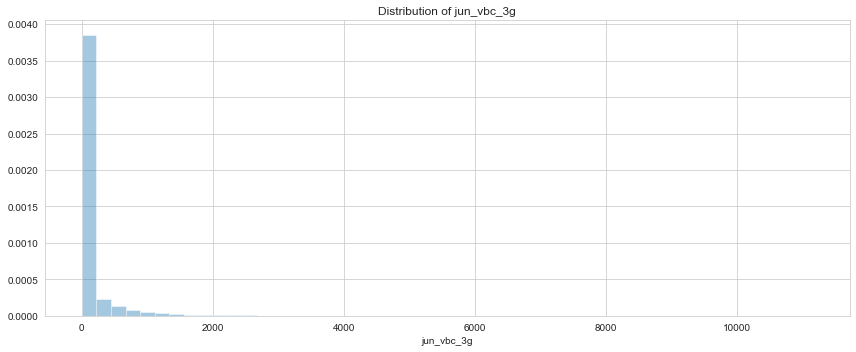

count    18584.000000
mean         6.445493
std         48.717270
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2618.570000
Name: sep_vbc_3g, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


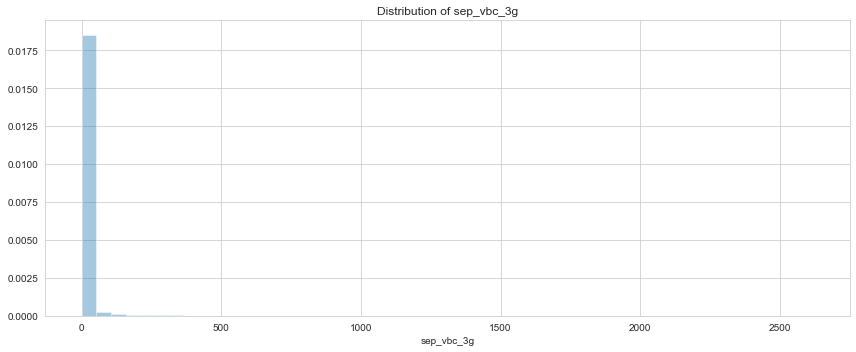

count    18584.000000
mean       693.725866
std        511.710881
min        368.000000
25%        450.000000
50%        567.000000
75%        791.500000
max      37762.500000
Name: average_rech_amt, dtype: float64


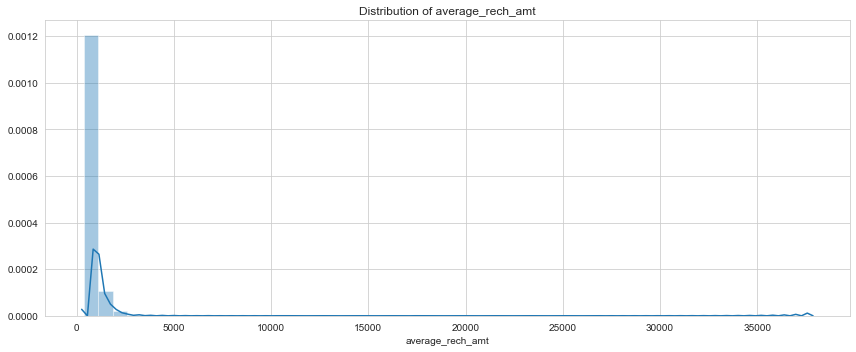

In [93]:
numeric_distribution_plot(df_70)

In [94]:
df_70.head(4)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
7         52.29        453.43        567.16        325.91             51.39   
8         35.08         94.66         80.63        136.48            297.13   
13       534.24        413.31        119.28        482.46             49.63   
16        70.61        296.29        229.74        162.76             42.61   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
13              0.49        205.31         53.48        353.99   
16              0.00        315.91        215.64        205.93   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
13            446.41             85.98            498.23            255.36   
16              7.89              2.58              3.23             22.99   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_mou_6  \
7              31.76             49.14              6.66         60.86   
8              10.04             75.69              0.00        130.26   
13             52.94            156.94              0.00        701.78   
16             64.51             18.29              0.00         30.89   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7          75.14         77.84           4.5          0.00          6.50   
8         143.48         98.28           0.0          0.00         10.23   
13        138.93        655.18           0.0          0.00          4.78   
16         67.09         21.53           0.0          3.26          5.91   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
7           487.53          609.24          350.16             58.14   
8           508.36          431.66          171.56             23.84   
13          907.09          192.41         1015.26             67.88   
16          346.81          286.01          233.38             41.33   

    loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
7              32.26             27.31            217.56            221.49   
8               9.84              0.31             57.58             13.98   
13              7.58             52.58            142.88             18.53   
16             71.44             28.89            226.81            149.69   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  \
7             121.19            152.16            101.46             39.53   
8              15.48              0.00              0.00  

In [95]:
df_70.shape

(18584, 90)

In [96]:
df_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18584 entries, 7 to 61900
Data columns (total 90 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mobile_number       18584 non-null  int64  
 1   arpu_6              18584 non-null  float64
 2   arpu_7              18584 non-null  float64
 3   arpu_8              18584 non-null  float64
 4   onnet_mou_6         18584 non-null  float64
 5   onnet_mou_7         18584 non-null  float64
 6   onnet_mou_8         18584 non-null  float64
 7   offnet_mou_6        18584 non-null  float64
 8   offnet_mou_7        18584 non-null  float64
 9   offnet_mou_8        18584 non-null  float64
 10  loc_og_t2t_mou_6    18584 non-null  float64
 11  loc_og_t2t_mou_7    18584 non-null  float64
 12  loc_og_t2t_mou_8    18584 non-null  float64
 13  loc_og_t2m_mou_6    18584 non-null  float64
 14  loc_og_t2m_mou_7    18584 non-null  float64
 15  loc_og_t2m_mou_8    18584 non-null  float64
 16  loc_

## MERGING THE lABEL COLUMn TO THE DATA FOR TRAINING

In [97]:
df_merge=df_70.merge(df_churn,on='mobile_number')

In [98]:
df_merge.shape

(18584, 91)

In [99]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18584 entries, 0 to 18583
Data columns (total 91 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mobile_number       18584 non-null  int64  
 1   arpu_6              18584 non-null  float64
 2   arpu_7              18584 non-null  float64
 3   arpu_8              18584 non-null  float64
 4   onnet_mou_6         18584 non-null  float64
 5   onnet_mou_7         18584 non-null  float64
 6   onnet_mou_8         18584 non-null  float64
 7   offnet_mou_6        18584 non-null  float64
 8   offnet_mou_7        18584 non-null  float64
 9   offnet_mou_8        18584 non-null  float64
 10  loc_og_t2t_mou_6    18584 non-null  float64
 11  loc_og_t2t_mou_7    18584 non-null  float64
 12  loc_og_t2t_mou_8    18584 non-null  float64
 13  loc_og_t2m_mou_6    18584 non-null  float64
 14  loc_og_t2m_mou_7    18584 non-null  float64
 15  loc_og_t2m_mou_8    18584 non-null  float64
 16  loc_

In [100]:
df_merge.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
1     7001524846   378.721   492.223   137.362       413.69       351.03   
2     7002191713   492.846   205.671   593.260       501.76       108.39   
3     7000875565   430.975   299.869   187.894        50.51        74.01   
4     7000187447   690.008    18.980    25.499      1185.91         9.28   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0        52.29        453.43        567.16        325.91             51.39   
1        35.08         94.66         80.63        136.48            297.13   
2       534.24        413.31        119.28        482.46             49.63   
3        70.61        296.29        229.74        162.76             42.61   
4         7.79         61.64          0.00          5.54             38.99   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             31.38             40.28            308.63            447.38   
1            217.59             12.49             80.96             70.58   
2              6.19             36.01            151.13             47.28   
3             65.16             67.38            273.29            145.99   
4              0.00              0.00             58.54              0.00   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            162.28             62.13             55.14             53.23   
1             50.54              0.00              0.00              0.00   
2            294.46              4.54              0.00             23.51   
3            128.28              0.00              4.48             10.26   
4              0.00              0.00              0.00              0.00   

   loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0              0.00        422.16        533.91        255.79   
1              7.15        378.09        288.18         63.04   
2              0.49        205.31         53.48        353.99   
3              0.00        315.91        215.64        205.93   
4              0.00         97.54          0.00          0.00   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0              4.30             23.29             12.01             49.89   
1            116.56            133.43             22.58             13.69   
2            446.41             85.98            498.23            255.36   
3              7.89              2.58              3.23             22.99   
4           1146.91              0.81              0.00              1.55   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_mou_6  \
0             31.76             49.14              6.66         60.86   
1             10.04             75.69              0.00        130.26   
2             52.94            156.94              0.00        701.78   
3             64.51             18.29              0.00         30.89   
4              0.00              0.00              0.00       1148.46   

   std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0         75.14         77.84          4.50          0.00          6.50   
1        143.48         98.28          0.00          0.00         10.23   
2        138.93        655.18          0.00          0.00          4.78   
3         67.09         21.53          0.00          3.26          5.91   
4          0.81          0.00          2.58          0.00          0.00   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0          487.53          609.24          350.16             58.14   
1          508.36          431.66          171.56             23.84   
2          907.09          192.41         1015.26             67.88   
3          346.81          286.01          233.38             41.33   
4         1249.53            0.81            0.00   

## NORMALIZING THROUGH STANDARD SCALER

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [177]:
features = df_merge.drop(['mobile_number','label'],axis=1)

In [102]:
x= df_merge.drop(['mobile_number','label'],axis=1)
y = df_merge['label']

In [103]:
x = scaler.fit_transform(x)

## MODEL BASELINE

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=40, random_state=1)

In [105]:
## I imported the logistic regression model from scikit_learn module
from sklearn.linear_model import LogisticRegression
# The code is to create an instance of the logistic regressor and fit it to our data
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
predictions = logreg.predict(X_test)

In [107]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.92      0.97      0.94        35

    accuracy                           0.90        40
   macro avg       0.79      0.69      0.72        40
weighted avg       0.89      0.90      0.89        40



In [109]:
def print_metrics(labels, predictions):
    metrics = sklm.precision_recall_fscore_support(labels, predictions)
    conf = sklm.confusion_matrix(labels, predictions)
    print('                 Confusion matrix')
    print('                 Actual positive    Actual negative')
    print('Score positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Score negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, predictions))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
print_metrics(y_test, predictions)

                 Confusion matrix
                 Actual positive    Actual negative
Score positive         2                 3
Score negative         1                34

Accuracy  0.90
 
           Positive      Negative
Num case        5            35
Precision    0.67          0.92
Recall       0.40          0.97
F1           0.50          0.94


In [113]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = logreg.predict(X_test) 
print_metrics(y_test, y_score, 9) 

Mean Square Error      = 0.1
Root Mean Square Error = 0.31622776601683794
Mean Absolute Error    = 0.1
Median Absolute Error  = 0.0
R^2                    = 0.08571428571428574
Adjusted R^2           = -0.15023041474654375


## CATBOOST

In [114]:
from catboost import CatBoostRegressor

In [115]:
cat_reg = CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=4)

In [117]:
cat_reg.fit(X_train,y_train)

0:	learn: 0.2742391	total: 201ms	remaining: 3m 20s
1:	learn: 0.2624688	total: 207ms	remaining: 1m 43s
2:	learn: 0.2588283	total: 214ms	remaining: 1m 11s
3:	learn: 0.2571619	total: 221ms	remaining: 55.1s
4:	learn: 0.2561133	total: 231ms	remaining: 45.9s
5:	learn: 0.2555690	total: 238ms	remaining: 39.4s
6:	learn: 0.2551161	total: 245ms	remaining: 34.7s
7:	learn: 0.2544646	total: 251ms	remaining: 31.1s
8:	learn: 0.2539082	total: 258ms	remaining: 28.4s
9:	learn: 0.2534958	total: 267ms	remaining: 26.4s
10:	learn: 0.2527331	total: 273ms	remaining: 24.6s
11:	learn: 0.2517040	total: 281ms	remaining: 23.1s
12:	learn: 0.2506344	total: 287ms	remaining: 21.8s
13:	learn: 0.2499309	total: 294ms	remaining: 20.7s
14:	learn: 0.2493408	total: 302ms	remaining: 19.8s
15:	learn: 0.2485623	total: 309ms	remaining: 19s
16:	learn: 0.2481836	total: 315ms	remaining: 18.2s
17:	learn: 0.2473951	total: 321ms	remaining: 17.5s
18:	learn: 0.2463837	total: 329ms	remaining: 17s
19:	learn: 0.2454995	total: 336ms	remainin

In [118]:
preds = cat_reg.predict(X_test)

In [119]:
preds

array([0.9595003 , 1.00958898, 0.90415071, 0.06882236, 0.94005191,
       0.90732051, 1.03398137, 0.97951149, 1.05015525, 1.3533834 ,
       0.35509983, 0.98514848, 1.02588478, 0.71456235, 0.97926059,
       1.08558535, 0.87159941, 0.38622983, 1.05435305, 0.18057885,
       0.87016397, 0.61728932, 0.88803416, 1.18030687, 0.5923451 ,
       0.70130968, 1.08878555, 0.9773958 , 0.32493501, 0.96909799,
       0.97427526, 1.21463343, 0.84073871, 1.17834845, 0.76369074,
       0.82017702, 0.92019607, 1.01591085, 0.65256139, 0.82057856])

In [120]:
cat_reg.score(X_train,y_train)

0.9717116049167782

Catboost Performed very well for predictions with 97% accuracy

## SMOTE for CLASS IMBALANCE 

In [122]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

Counter({0: 18399, 1: 185})
Counter({0: 185, 1: 185})


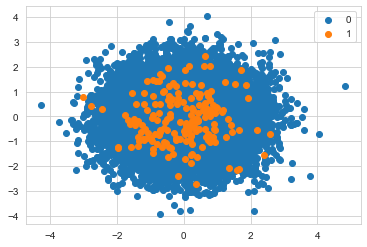

In [123]:
# example of random undersampling to balance the class distribution
from imblearn.under_sampling import RandomUnderSampler
from numpy import where
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=18584, n_features=89, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# or undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

# summarize class distribution
#print(Counter(y_over))
# scatter plot of examples by class label
counter = Counter(y_under)
print(counter)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [125]:
# Split the resampeled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under ,test_size=0.3)

## CATBOOST AFTER APPLYING SMOTE FOR CLASS IMBALANCE

In [191]:
cat_reg = CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=4)
# cat_reg.fit(X_under,y_under)
#or
cat_reg.fit(X_train,y_train)

0:	learn: 0.2409549	total: 5.13ms	remaining: 5.12s
1:	learn: 0.2204112	total: 9.45ms	remaining: 4.72s
2:	learn: 0.2131898	total: 14.2ms	remaining: 4.73s
3:	learn: 0.1970164	total: 18.9ms	remaining: 4.69s
4:	learn: 0.1902958	total: 23.1ms	remaining: 4.6s
5:	learn: 0.1862886	total: 28.1ms	remaining: 4.65s
6:	learn: 0.1785112	total: 34ms	remaining: 4.83s
7:	learn: 0.1675183	total: 40.5ms	remaining: 5.02s
8:	learn: 0.1612179	total: 46.8ms	remaining: 5.15s
9:	learn: 0.1573318	total: 52.3ms	remaining: 5.17s
10:	learn: 0.1211835	total: 58.3ms	remaining: 5.24s
11:	learn: 0.1140741	total: 63.9ms	remaining: 5.26s
12:	learn: 0.1052659	total: 68ms	remaining: 5.16s
13:	learn: 0.0951084	total: 72.6ms	remaining: 5.12s
14:	learn: 0.0908783	total: 78ms	remaining: 5.12s
15:	learn: 0.0857270	total: 82.5ms	remaining: 5.07s
16:	learn: 0.0810030	total: 86.9ms	remaining: 5.03s
17:	learn: 0.0764040	total: 91.4ms	remaining: 4.99s
18:	learn: 0.0730314	total: 95.5ms	remaining: 4.93s
19:	learn: 0.0662053	total: 1

In [192]:

pred_ = cat_reg.predict(X_test)


In [193]:
cat_reg.score(X_train,y_train)

1.0

THIS YIELD 100% ACCURACY AFTER APPLYING SMOTE 

## LOGISTIC REGRESSION WITH SMOTE

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
logistic_model = linear_model.LogisticRegression() 
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [128]:
predictions = logistic_model.predict(X_test)

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.91      0.94      0.93        53

    accuracy                           0.93       111
   macro avg       0.93      0.93      0.93       111
weighted avg       0.93      0.93      0.93       111



In [130]:
print(logistic_model.intercept_)
print(logistic_model.coef_)

[0.50066451]
[[-3.54760372e-02 -1.09070287e-01 -1.52789697e-01  3.99027471e-01
  -1.49278609e-01 -2.12645381e-01  2.20276787e-01  3.17223822e-01
   9.33272065e-03 -3.75657348e-01  2.74962303e+00  1.38778394e-01
  -9.18382962e-02 -1.68246267e-01 -2.57152236e-01 -4.11072611e-01
   3.55524328e-02  2.66040347e-01  1.24883890e-01 -1.18397931e-01
  -5.07470854e-01 -3.95056507e-01  4.23763804e-01 -6.21851179e-01
  -9.09534348e-02  3.64529943e-02 -8.97071692e-02 -4.51735477e-01
   2.71700948e-01 -6.11599247e-02 -7.89552262e-02 -1.44319464e-01
  -4.58209816e-02 -1.23634453e-01 -5.19470889e-03  5.82618075e-01
   1.91325631e-01 -2.94512395e-02  1.67371600e-01  4.05948097e-01
  -2.13594183e-01 -8.51114399e-02 -2.14624086e-02  6.83213555e-02
  -1.71881600e-01 -3.53047257e-01  9.20866700e-02  2.86059425e-01
   2.58651313e-01 -2.60671614e-01  4.01170557e-02 -6.68656870e-02
  -3.84567114e-02  2.33086407e-01  1.87953426e-01 -2.19849957e+00
   2.70066218e-01 -4.66129389e-01  1.34258672e-02 -2.67767664e-

In [131]:
probabilities = logistic_model.predict_proba(X_test)
print(probabilities[:15,:])

[[9.97837378e-01 2.16262248e-03]
 [2.07494811e-01 7.92505189e-01]
 [9.97845460e-01 2.15454013e-03]
 [9.85185595e-01 1.48144054e-02]
 [9.95548773e-01 4.45122665e-03]
 [1.28519213e-02 9.87148079e-01]
 [9.99468279e-01 5.31720982e-04]
 [6.79670676e-05 9.99932033e-01]
 [8.49010764e-02 9.15098924e-01]
 [1.29432353e-01 8.70567647e-01]
 [3.62644562e-05 9.99963736e-01]
 [4.93185276e-02 9.50681472e-01]
 [8.70272479e-01 1.29727521e-01]
 [2.84460019e-04 9.99715540e-01]
 [6.50545556e-02 9.34945444e-01]]


In [132]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15])) #printing the top 15 heads
print(y_test[:15])

[0 1 0 0 0 1 0 1 1 1 1 1 0 1 1]
[0 1 0 0 0 1 0 1 1 1 1 1 0 1 1]


In [133]:
#confusion matrix table
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Actual positive    Actual negative')
    print('Score positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Score negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

                 Confusion matrix
                 Actual positive    Actual negative
Score positive        53                 5
Score negative         3                50

Accuracy  0.93
 
           Positive      Negative
Num case       58            53
Precision    0.95          0.91
Recall       0.91          0.94
F1           0.93          0.93


In [135]:
logistic_mod = linear_model.LogisticRegression(C = 1.0) 
logistic_mod.fit(X_train, y_train)
predicts_c= logistic_model.predict(X_test)
# predicts_c =  logistic_model.predict(x_data)
predicts_c

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1])

                 Confusion matrix
                 Score positive    Score negative
Actual positive        53                 5
Actual negative         3                50

Accuracy        0.93
AUC             0.99
Macro precision 0.93
Macro recall    0.93
 
           Positive      Negative
Num case       58            53
Precision    0.95          0.91
Recall       0.91          0.94
F1           0.93          0.93


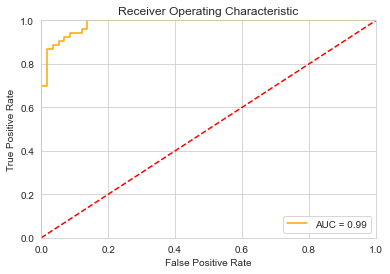

In [136]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  
plot_auc(y_test, probabilities)

## LOGISTIC REGRESSION CROSS VALIDATION

In [137]:
y_under = y_under.reshape(y_under.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
logistic_mod = linear_model.LogisticRegression(C = 1.0) 
scores = ms.cross_validate(logistic_mod,X_under, y_under, scoring=scoring,
                        cv=10, return_train_score=False)



In [138]:
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))

print_cv(scores) 

         Precision     Recall       AUC
Fold  1    0.952        0.944      0.971
Fold  2    0.920        0.920      0.977
Fold  3    0.853        0.841      0.965
Fold  4    0.975        0.972      0.985
Fold  5    0.920        0.920      0.985
Fold  6    0.909        0.895      0.982
Fold  7    0.921        0.918      0.968
Fold  8    0.950        0.947      0.991
Fold  9    0.975        0.972      0.997
Fold 10    0.865        0.865      0.977
----------------------------------------
Mean       0.924        0.919      0.980
Std        0.039        0.041      0.010


In [139]:
inside = ms.KFold(n_splits=10, shuffle = True)
outside = ms.KFold(n_splits=10, shuffle = True)

In [140]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
## Define the logistic regression model
logistic_mod = linear_model.LogisticRegression() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
## Fit thhe cross validated grid search over the data 
clf.fit(X_under, y_under)
keys = list(clf.cv_results_.keys())
for key in keys[21:31]:
    print(clf.cv_results_[key])
## And print the best parameter value
clf.best_estimator_.C

[0.99992784 1.         1.         1.         1.        ]
[0.99989167 1.         1.         1.         1.        ]
[1. 1. 1. 1. 1.]
[0.99996393 1.         1.         1.         1.        ]
[0.99985571 1.         1.         1.         1.        ]
[0.99978352 1.         1.         1.         1.        ]
[0.99981962 1.         1.         1.         1.        ]
[1. 1. 1. 1. 1.]
[0.99989537 1.         1.         1.         1.        ]
[8.60520755e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


0.1

                 Confusion matrix
                 Score positive    Score negative
Actual positive        55                 3
Actual negative         2                51

Accuracy        0.95
AUC             0.99
Macro precision 0.95
Macro recall    0.96
 
           Positive      Negative
Num case       58            53
Precision    0.96          0.94
Recall       0.95          0.96
F1           0.96          0.95


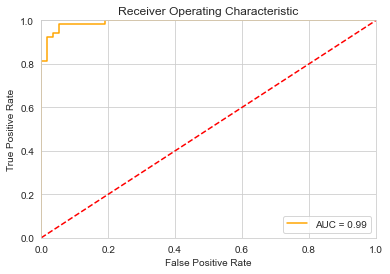

In [141]:
logistic_mod = linear_model.LogisticRegression(C =0.1) 
logistic_mod.fit(X_train, y_train)
probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  
plot_auc(y_test, probabilities)

In [142]:
predicts_log= logistic_model.predict(X_test)
predicts_log

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1])

LOGISTIC REGRESSION WITH SMOTE AND CROSS VALIDATION GAVE US A GOOD MODEL PERFORMANCE OF 95% LESS THAN THAT OF CATBOOST WHICH IS 100%

## SVM 

In [143]:
from sklearn import svm, preprocessing
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0]}
## Define the SVM model
svc_clf = svm.SVC(class_weight = {0:0.50, 1:0.50})
## Define svm model
svc_model = SVC() 
## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(X_under, y_under)
#keys = list(clf.cv_results_.keys())
#for key in keys[16:31]:
#    print(clf.cv_results_[key])
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

10
0.001


In [144]:
cv_estimate = ms.cross_val_score(clf, X_under, y_under, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.974
SDT of the metric       = 0.019
Outcomes by cv fold
Fold  1    0.988
Fold  2    0.965
Fold  3    0.966
Fold  4    0.977
Fold  5    0.980
Fold  6    0.982
Fold  7    0.985
Fold  8    0.923
Fold  9    0.988
Fold 10    0.985


# Notice that the standard deviation of the mean of the AUC is smaller than the mean. This indicates that this model is likely to generalize well.

In [145]:
svm_mod = svm.SVC(C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = {0:0.50, 1:0.50},
                  probability=True) 
svm_mod.fit(X_train, y_train)

SVC(C=10, class_weight={0: 0.5, 1: 0.5}, gamma=0.001, probability=True)

In [147]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = svm_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive        55                 3
Actual negative         2                51

Accuracy        0.95
AUC             0.99
Macro precision 0.95
Macro recall    0.96
 
           Positive      Negative
Num case       58            53
Precision    0.96          0.94
Recall       0.95          0.96
F1           0.96          0.95


In [149]:
probab = svm_mod.predict_proba(X_test)

In [151]:
probab

In [158]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

In [159]:
svc_model

SVC()

In [160]:
predictions

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1])

## CATBOOS CLASSIFIER

In [199]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [166]:
model = XGBClassifier(scale_pos_weight = 8,max_depth = 8, n_estimators = 500)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f1_score(prediction, y_test))

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9357798165137615


CATBOOS CLASSIFIER GAVE 96% WITHOUT PERFORMANCING CROSS VALIDATION

## FEATURE IMPORTANCE

Text(0.5, 1.0, 'Model features importance:')

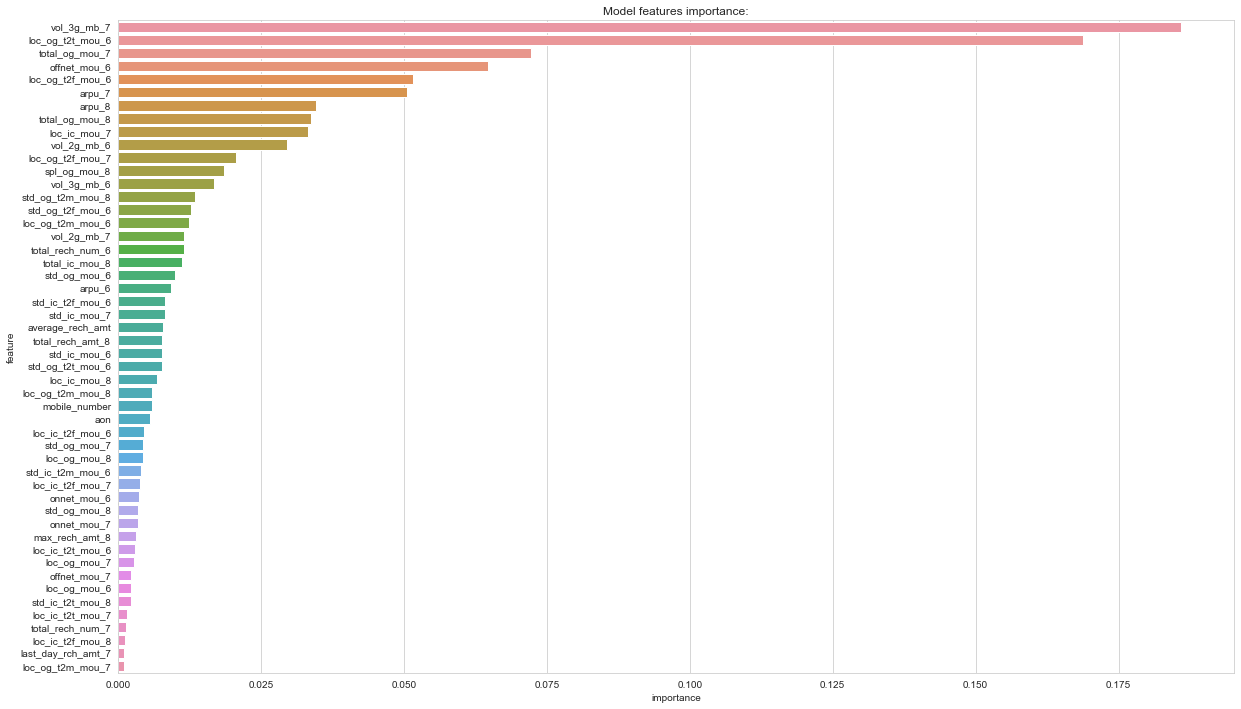

In [184]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = df_70.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Model features importance:')

In [185]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(30)['feature'].to_list()

## THESE ARE THE FIRST 30  IMPORTANT FEATURES FOR PREDICTIONS

In [186]:
new_feat

['vol_3g_mb_7',
 'loc_og_t2t_mou_6',
 'total_og_mou_7',
 'offnet_mou_6',
 'loc_og_t2f_mou_6',
 'arpu_7',
 'arpu_8',
 'total_og_mou_8',
 'loc_ic_mou_7',
 'vol_2g_mb_6',
 'loc_og_t2f_mou_7',
 'spl_og_mou_8',
 'vol_3g_mb_6',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'vol_2g_mb_7',
 'total_rech_num_6',
 'total_ic_mou_8',
 'std_og_mou_6',
 'arpu_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_7',
 'average_rech_amt',
 'total_rech_amt_8',
 'std_ic_mou_6',
 'std_og_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_og_t2m_mou_8',
 'mobile_number']

In [ ]:
X = new_feat

In [201]:
def objective(trial):
    cat_oof_f1=[]
    cat_oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
    param['use_best_model'] = True
    param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
    param['random_state'] = 0
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 1, 10)
    param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    param['logging_level'] = 'Silent'



    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = CatBoostClassifier(**param)
#         model = XGBClassifier(**param)
    

        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early100
        preds=model.predict(X_test)

        cat_oof_f1.append(f1_score(y_test,preds))

    return np.mean(cat_oof_f1)


In [195]:
import optuna

In [202]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10) #10000

[I 2022-03-13 18:33:01,102] A new study created in memory with name: no-name-758a78fa-22ae-4741-8685-cd5b7f86a032
[I 2022-03-13 18:34:52,956] Trial 0 finished with value: 0.17167396289347508 and parameters: {'learning_rate': 0.031, 'depth': 11, 'l2_leaf_reg': 3.5, 'min_child_samples': 1, 'iterations': 1750.0, 'colsample_bylevel': 0.051448063949046385, 'scale_pos_weight': 4, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.17167396289347508.
[I 2022-03-13 18:36:10,081] Trial 1 finished with value: 0.7908424509280673 and parameters: {'learning_rate': 0.018000000000000002, 'depth': 7, 'l2_leaf_reg': 3.5, 'min_child_samples': 4, 'iterations': 1200.0, 'colsample_bylevel': 0.0951973107379106, 'scale_pos_weight': 5, 'bootstrap_type': 'Bayesian'}. Best is trial 1 with value: 0.7908424509280673.
[I 2022-03-13 18:36:34,978] Trial 2 finished with value: 0.7427395901121393 and parameters: {'learning_rate': 0.094, 'depth': 5, 'l2_leaf_reg': 4.5, 'min_child_samples': 16, 'iterations': 1

In [207]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 10
Best trial:
  Value: 0.7908424509280673
  Params: 
    learning_rate: 0.018000000000000002
    depth: 7
    l2_leaf_reg: 3.5
    min_child_samples: 4
    iterations: 1200.0
    colsample_bylevel: 0.0951973107379106
    scale_pos_weight: 5
    bootstrap_type: Bayesian


In [208]:
model.score(X_train,y_train)

1.0

In [213]:
# pred_cat = pd.DataFrame(cat_oof_predictions).T

CATBOOST CLASSIFIER ALSO GIVE 100% ACCURACY USING FEATURE SELECTION AND SMOTE WITH CROSS VALIDATION AND HYPER PARAMETER TUNING 

In [215]:
preds=model.predict(X_test)

In [216]:
preds

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1])